# Importar as bibliotecas necessárias

In [1]:
#import matplotlib as mpl
# import seaborn as sns
import datetime
# import sklearn
# from sklearn.impute import SimpleImputer
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.decomposition import KernelPCA
import numpy as np
import pandas as pd
# import math
# import keras
import matplotlib.pyplot as plt
import tensorflow as tf
# import seaborn as sns
import json
# Time library to know how much time things take
import time
import random

2025-04-14 22:53:48.118798: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Configurar execução

In [2]:
run_start = time.time()
# run date isoformat
run_date = datetime.datetime.now()
print(run_date.isoformat())
print(run_date.strftime("%Y-%m-%d %H:%M:%S.%f"))

2025-04-14T22:53:50.990159
2025-04-14 22:53:50.990159


In [3]:
NUMBER_OF_SUB_EXPERIMENT = 3
MODEL_TO_USE = 2

# COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - High', 'IBOVESPA - Low', 'IBOVESPA - Open']
COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - High', 'IBOVESPA - Low', 'IBOVESPA - Open']
COLUMN_TO_PREDICT = 'IBOVESPA - Close'

# Dataframe constants
# Train, val and test split
START_ON_FIRST_VALID_DATE = True
START_DATE = None # '1995-01-02' # None
END_DATE = None # '2016-04-22' # None
TYPE_OF_UNIT = 'customDays'
# csv have 7993 data rows
TRAINING_SIZE = '1994-01-03'
VALIDATION_SIZE = '2023-10-01'
TESTING_SIZE = '2024-10-01'
FILE = 'data/2 - processed/normalized_data.csv'

# Keras config constants
BATCH_SIZE = 32
MAX_EPOCHS = 500
LEARNING_RATE = 0.01
LEARNING_DECAY = 0.9
DECAY_STEPS = 1000
PATIENCE = 10
# DECAY_EVERY_EPOCHS = 2
NUM_FEATURES = 10 # None # 100
RANDOM_SEED = 246
INPUT_WINDOW_SIZE = 40
OUTPUT_WINDOW_SIZE = 5
# Model constantsNUM_FEATURE
LOSS_FUNCTION = 'MAE'
MISMATCH_PENALITY = 2

# Save data constants
RUN_MOMENT = "2025-04-14 22:53:46"
SAVE_FILE_PATH = 'results/experiment_1'

# Comment to help Orquestrator to find the variables

In [4]:
# # define columns to use and columns to predict
# if NUMBER_OF_SUB_EXPERIMENT == 1:
#     COLUMNS_TO_USE = ['IBOVESPA - Close']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 2:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Spread']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 3:'DXY - Close', 'Gold - Close', 'Brent Crude Oil - Close'
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 5:
#     COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - Spread %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 6:
#     COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 7:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 8:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - Spread %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 9:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'

In [5]:
MODEL_NAME = ''
if MODEL_TO_USE == 1:
    MODEL_NAME = 'Model_1'
elif MODEL_TO_USE == 2:
    MODEL_NAME = 'Model_2'
elif MODEL_TO_USE == 3:
    MODEL_NAME = 'Model_3'
else:
    # throw error
    raise ValueError("MODEL_TO_USE must be 1, 2 or 3")

In [6]:
# Config fix seed
tf.random.set_seed(RANDOM_SEED)
random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)

In [7]:
save_file_name = f"{RUN_MOMENT}-s{NUMBER_OF_SUB_EXPERIMENT}-m{MODEL_TO_USE}"

In [8]:
# load normalized data from /data/2 - processed/normalized_data.csv
imported_df = pd.read_csv(FILE, index_col=0)

In [9]:
df_x_values = imported_df.copy()
# order on index
df_x_values = df_x_values.sort_index(ascending=True)
# turn index into column
df_x_values.reset_index(inplace=True)
# remove the first column (index)
df_x_values.drop(columns=['index'], inplace=True)
df_x_values.head()

,IBOVESPA - Close,IBOVESPA - High,IBOVESPA - Low,IBOVESPA - Open,Dólar - Close,Dólar - High,Dólar - Low,Dólar - Open,Dow Jones - Close,Dow Jones - High,...,IBOVESPA - Spread %,Kospi - Spread %,Minério de Ferro - Spread %,Nasdaq - Spread %,Nikkei - Spread %,Petróleo Brent - Spread %,Petróleo WTI - Spread %,S&P 500 - Spread %,STOXX 600 - Spread %,Shanghai SE - Spread %
0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.003941,0.003148,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0
1,0.000150,0.000150,0.000049,0.000034,0.0,0.0,0.0,0.0,0.004600,0.003605,...,0.036606,0.0,0.0,0.029525,0.000000,0.0,0.0,0.084905,0.0,0.0
2,0.000299,0.000406,0.000200,0.000183,0.0,0.0,0.0,0.0,0.004961,0.003965,...,0.020442,0.0,0.0,0.119266,0.201590,0.0,0.0,0.065165,0.0,0.0
3,0.000468,0.000484,0.000350,0.000333,0.0,0.0,0.0,0.0,0.005083,0.004311,...,0.008583,0.0,0.0,0.056198,0.049836,0.0,0.0,0.095393,0.0,0.0
4,0.000703,0.000704,0.000519,0.000502,0.0,0.0,0.0,0.0,0.005490,0.004630,...,0.015204,0.0,0.0,0.182793,0.129181,0.0,0.0,0.162195,0.0,0.0


Verificar correlação dos dados

In [10]:
corr = df_x_values.corr()[COLUMN_TO_PREDICT]
corr = corr.sort_values()
print(corr.to_string())

Meta Selic                    -0.258086
IPCA                          -0.183215
INPC                          -0.181477
Taxa acumulada no período     -0.181264
IBOVESPA - High %             -0.028419
IBOVESPA - Low %              -0.025172
IBOVESPA - Close %            -0.023741
IBOVESPA - Open %             -0.023504
HanSeng Index - Spread %      -0.015235
IBOVESPA - Spread %           -0.014234
Dow Jones - Spread %          -0.011542
S&P 500 - Spread %            -0.011357
Nasdaq - Spread %             -0.009685
Nikkei - Spread %             -0.003974
FTSE 100 - Spread %           -0.003755
Minério de Ferro - Spread %    0.000635
HanSeng Index - Open %         0.002705
HanSeng Index - Low %          0.002773
HanSeng Index - Close %        0.002917
HanSeng Index - High %         0.003144
DAX - Spread %                 0.004029
CAC 40 - Spread %              0.004522
Dow Jones - Open %             0.004659
CAC 40 - Open %                0.004786
Dow Jones - Low %              0.004847


In [11]:
corr.index

Index(['Meta Selic', 'IPCA', 'INPC', 'Taxa acumulada no período',
       'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Close %',
       'IBOVESPA - Open %', 'HanSeng Index - Spread %', 'IBOVESPA - Spread %',
       ...
       'Kospi - High', 'ASX 200 - Open', 'ASX 200 - Low', 'ASX 200 - Close',
       'ASX 200 - High', 'PIB', 'IBOVESPA - Open', 'IBOVESPA - High',
       'IBOVESPA - Low', 'IBOVESPA - Close'],
      dtype='object', length=200)

In [12]:
df_x_values = df_x_values[COLUMNS_TO_USE]

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

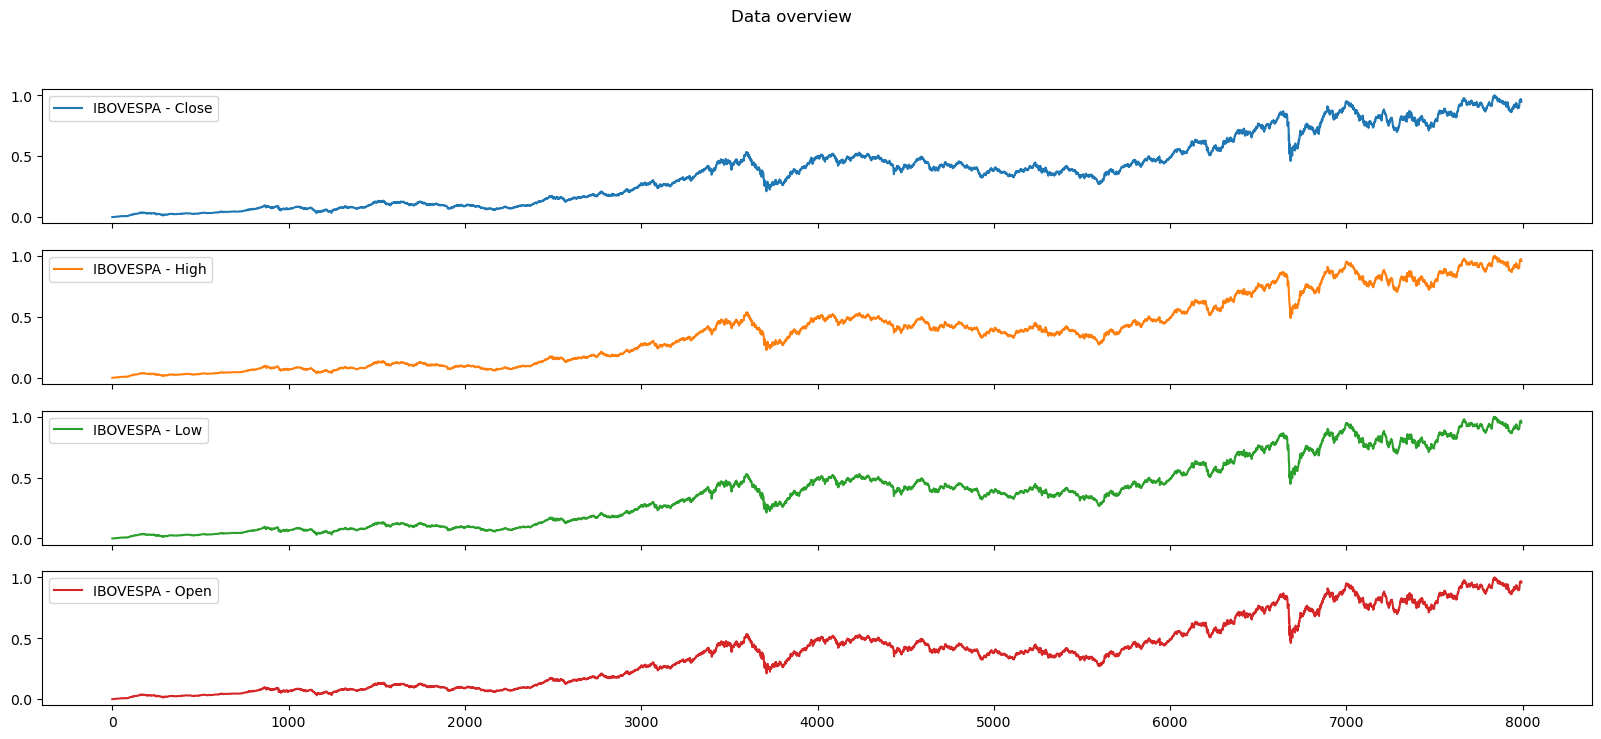

In [13]:
df_x_values.plot(subplots=True, figsize=(20, 2*len(df_x_values.columns)), title="Data overview") 

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

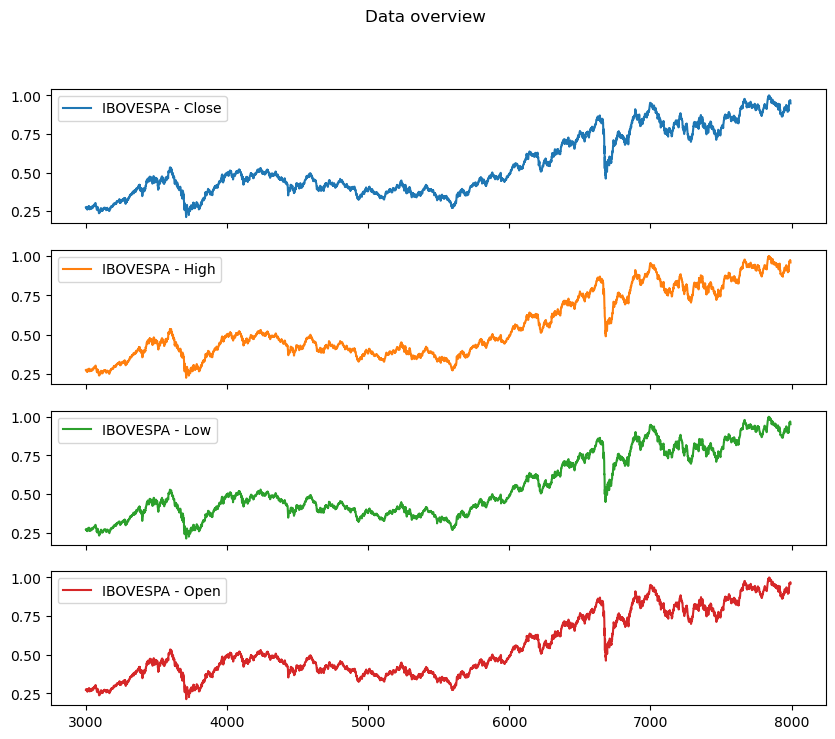

In [14]:
df_x_values[3000:].plot(subplots=True, figsize=(10, 2*len(df_x_values.columns)), title="Data overview") 

In [15]:
imported_df_cpy = imported_df.copy()
# remove the first column (index)
imported_df_cpy.reset_index(inplace=True)
# find date (index) of the 3050th row
print(imported_df_cpy.loc[3700, 'index'])
print(imported_df_cpy.loc[4860, 'index'])

2008-10-13
2013-03-27


Dividir os dados em treino e teste

In [16]:
valid_indexes = pd.read_csv('data/2 - processed/valid_indexes.csv', index_col=0)
valid_indexes.head()
# find the first valid date for each column
# the index is the column name and the value is the value in "First Valid Index" column
valid_indexes_dict = valid_indexes.to_dict()['First Valid Index']
valid_indexes_dict

{'IBOVESPA - Close': '1994-01-03',
 'IBOVESPA - High': '1994-01-03',
 'IBOVESPA - Low': '1994-01-03',
 'IBOVESPA - Open': '1994-01-03',
 'Dólar - Close': '2003-12-01',
 'Dólar - High': '2003-12-01',
 'Dólar - Low': '2003-12-01',
 'Dólar - Open': '2003-12-01',
 'Dow Jones - Close': '1994-01-03',
 'Dow Jones - High': '1994-01-03',
 'Dow Jones - Low': '1994-01-03',
 'Dow Jones - Open': '1994-01-03',
 'S&P 500 - Close': '1994-01-03',
 'S&P 500 - High': '1994-01-03',
 'S&P 500 - Low': '1994-01-03',
 'S&P 500 - Open': '1994-01-03',
 'Nasdaq - Close': '1994-01-03',
 'Nasdaq - High': '1994-01-03',
 'Nasdaq - Low': '1994-01-03',
 'Nasdaq - Open': '1994-01-03',
 'Shanghai SE - Close': '1997-07-02',
 'Shanghai SE - High': '1997-07-02',
 'Shanghai SE - Low': '1997-07-02',
 'Shanghai SE - Open': '1997-07-02',
 'Nikkei - Close': '1994-01-04',
 'Nikkei - High': '1994-01-04',
 'Nikkei - Low': '1994-01-04',
 'Nikkei - Open': '1994-01-04',
 'HanSeng Index - Close': '1994-01-03',
 'HanSeng Index - High':

In [17]:
if START_ON_FIRST_VALID_DATE:
    # get valid indexes 
    valid_indexes = pd.read_csv('data/2 - processed/valid_indexes.csv', index_col=0)
    valid_indexes_dict = valid_indexes.to_dict()['First Valid Index']
    valid_indexes_dict
    biggest_valid_index = min(valid_indexes_dict.values())
    for col in df_x_values.columns:
        # get the first valid index for each column
        first_valid_index = valid_indexes_dict[col]
        # check if the first valid index is greater than the biggest valid index
        if first_valid_index > biggest_valid_index:
            biggest_valid_index = first_valid_index
    # filter the dataframe to start on the first valid index, first finding the numeric index searching imported_df
    imported_df_cp = imported_df.copy()
    # reset the index
    imported_df_cp.reset_index(inplace=True)
    # find the first valid index
    first_valid_index = imported_df_cp[imported_df_cp['index'] == biggest_valid_index].index[0]
    print(f"First valid index: {first_valid_index}")

if START_DATE is not None:
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # find the index of the START_DATE
    start_index = imported_df_cp[imported_df_cp['index'] == START_DATE].index[0]

if END_DATE is not None:
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # find the index of the END_DATE
    end_index = imported_df_cp[imported_df_cp['index'] == END_DATE].index[0]

# crop the dataframe to start on the first valid index
if START_ON_FIRST_VALID_DATE and START_DATE is not None:
    if first_valid_index > start_index:
        # crop the dataframe to start on the first valid index
        df_x_values = df_x_values[first_valid_index:]
    else:
        # crop the dataframe to start on the START_DATE
        df_x_values = df_x_values[start_index:]
elif START_ON_FIRST_VALID_DATE:
    # crop the dataframe to start on the first valid index
    df_x_values = df_x_values[first_valid_index:]
elif START_DATE is not None:
    # crop the dataframe to start on the START_DATE
    df_x_values = df_x_values[start_index:]

# crop the dataframe to end on the END_DATE
if END_DATE is not None:
    # crop the dataframe to end on the END_DATE
    df_x_values = df_x_values[:end_index]
    # crop imported_df_cp to end on the END_DATE
    imported_df_cp = imported_df_cp[:end_index]

# calculate de size of training, validation and testing data
if TYPE_OF_UNIT == "percentual":
    train_size = int(len(df_x_values) * TRAINING_SIZE)
    validation_size = int(len(df_x_values) * VALIDATION_SIZE)
    test_size = int(len(df_x_values) * TESTING_SIZE)
elif TYPE_OF_UNIT == "days":
    train_size = TRAINING_SIZE
    validation_size = VALIDATION_SIZE
    test_size = TESTING_SIZE
elif TYPE_OF_UNIT == "weeks":
    train_size = TRAINING_SIZE * 7
    validation_size = VALIDATION_SIZE * 7
    test_size = TESTING_SIZE * 7
elif TYPE_OF_UNIT == "months":
    train_size = TRAINING_SIZE * 30
    validation_size = VALIDATION_SIZE * 30
    test_size = TESTING_SIZE * 30
elif TYPE_OF_UNIT == "customDays":
    # if iported_df_cp is not defined, define it
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # if TRAINING_SIZE is not in imported_df_cp, find the next closest date
    if TRAINING_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > TRAINING_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Training date not found. Closest date to {TRAINING_SIZE} is {closest_date}")
        # set TRAINING_SIZE to the closest date
        TRAINING_SIZE = closest_date
    # if VALIDATION_SIZE is not in imported_df_cp, find the next closest date
    if VALIDATION_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > VALIDATION_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Validation date not found. Closest date to {VALIDATION_SIZE} is {closest_date}")
        # set VALIDATION_SIZE to the closest date
        VALIDATION_SIZE = closest_date
    # if TESTING_SIZE is not in imported_df_cp, find the next closest date
    if TESTING_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > TESTING_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Testing date not found. Closest date to {TESTING_SIZE} is {closest_date}")
        # set TESTING_SIZE to the closest date
        TESTING_SIZE = closest_date
    
    # if VALIDATION_SIZE is not in imported_df_cp, throw error
    # get the index of TRAINING_SIZE date
    train_index = imported_df_cp[imported_df_cp['index'] == TRAINING_SIZE].index[0]
    # get the index of VALIDATION_SIZE date
    validation_index = imported_df_cp[imported_df_cp['index'] == VALIDATION_SIZE].index[0]
    # get the index of TESTING_SIZE date
    test_index = imported_df_cp[imported_df_cp['index'] == TESTING_SIZE].index[0] 
    # throw error if some of the indexes is not valid
    if train_index < 0 or validation_index < 0 or test_index < 0:
        raise ValueError("Some of the indexes are not valid.")
    # thow error if the indexes are not in the same order
    if train_index > validation_index or validation_index > test_index:
        raise ValueError("The indexes are not in the same order.")
    # calculate the size of the training, validation and testing data
    train_size = len(imported_df_cp[train_index:validation_index])
    validation_size = len(imported_df_cp[validation_index:test_index])
    test_size = len(imported_df_cp[test_index:])
else:
    raise ValueError("Invalid type_of_unit. Must be 'days', 'weeks', 'months' or 'percentual'.")

if START_ON_FIRST_VALID_DATE:
    # if train_size+validation_size+test_size is greater than the size of the dataframe, adjust train_size
    # to be the size of the dataframe minus validation_size and test_size
    if train_size + validation_size + test_size > len(df_x_values):
        # adjust train_size to be the size of the dataframe minus validation_size and test_size
        train_size = len(df_x_values) - validation_size - test_size
        print(f"Adjusted train size: {train_size}")
    # check if train_size is less than 0
    if train_size < 0:
        raise ValueError("Train size is less than 0. Please check the sizes of the data.")

# check if sum of sizes is less than the size of the dataframe
if train_size + validation_size + test_size > len(df_x_values):
    raise ValueError("Sum of train, validate and test sizes is greater than the size of the dataframe.")

# create the train, validation and test dataframes
train_df = df_x_values[-(train_size + test_size + validation_size):-(test_size + validation_size)]
val_df = df_x_values[-(test_size + validation_size):-test_size]
test_df = df_x_values[-(test_size):]

# check the size of the data
print(f"Training data size: {len(train_df)}")
print(f"Validating data size: {len(val_df)}")
print(f"Testing data size: {len(test_df)}")


First valid index: 0
Validation date not found. Closest date to 2023-10-01 is 2023-10-02
Training data size: 7603
Validating data size: 261
Testing data size: 129


array([<Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

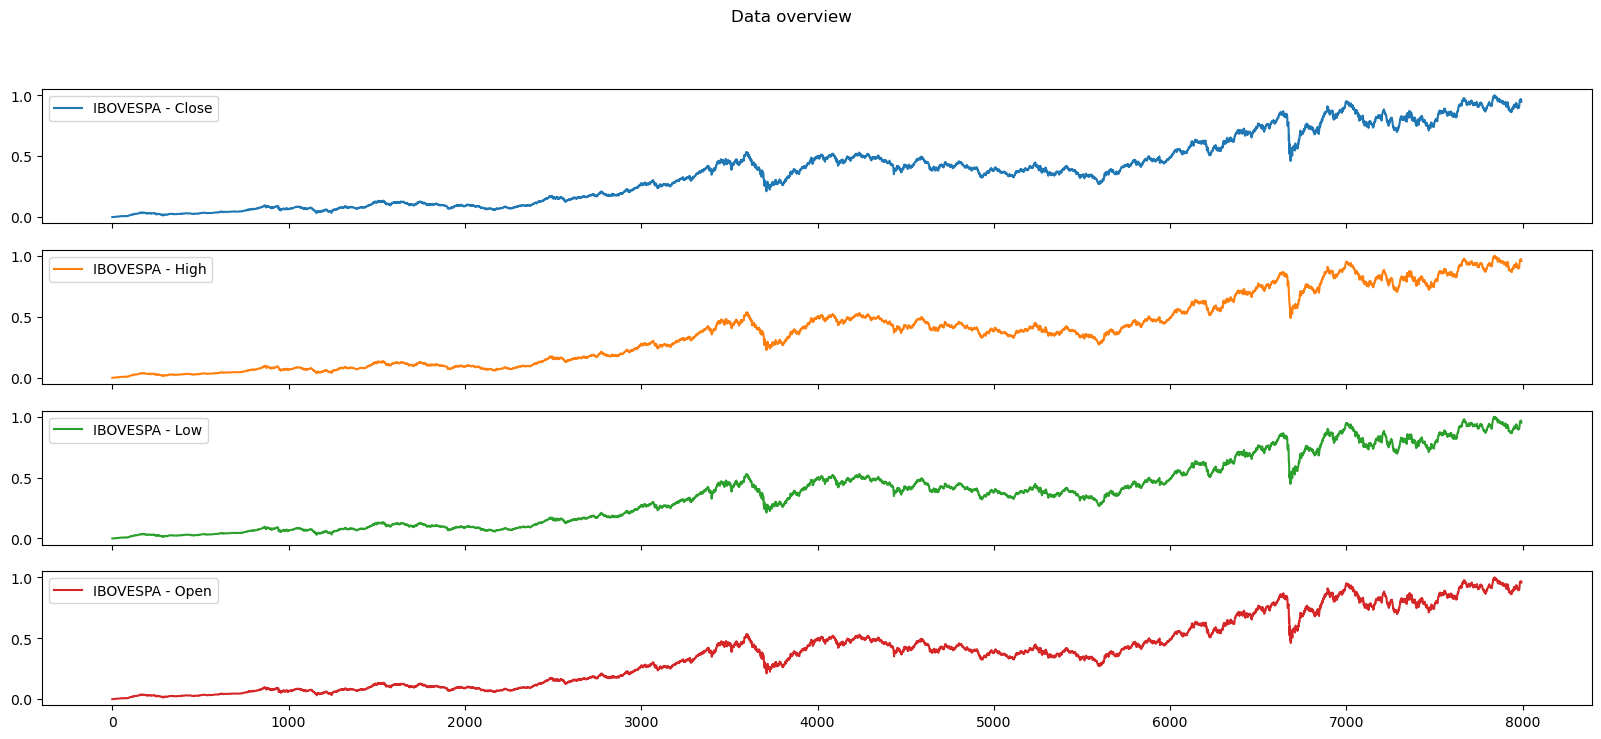

In [18]:
df_x_values.plot(subplots=True, figsize=(20, 2*len(df_x_values.columns)), title="Data overview") 

In [19]:
len(train_df), len(val_df), len(test_df), len(df_x_values)

(7603, 261, 129, 7993)

Criar a classe/função geradora das janelas

In [20]:
class WindowGenerator():
  def __init__(self, INPUT_WINDOW_SIZE, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.INPUT_WINDOW_SIZE = INPUT_WINDOW_SIZE
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = INPUT_WINDOW_SIZE + shift

    self.input_slice = slice(0, INPUT_WINDOW_SIZE)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])
  
  def split_window(self, features):
    inputs = features[:, self.input_slice, :]
    labels = features[:, self.labels_slice, :]
    if self.label_columns is not None:
      labels = tf.stack(
          [labels[:, :, self.column_indices[name]] for name in self.label_columns],
          axis=-1)

    # Slicing doesn't preserve static shape information, so set the shapes
    # manually. This way the `tf.data.Datasets` are easier to inspect.
    inputs.set_shape([None, self.INPUT_WINDOW_SIZE, None])
    labels.set_shape([None, self.label_width, None])

    return inputs, labels

  def plot(self, model=None, plot_col='IBOVESPA - Close', max_subplots=3):
    inputs, labels = self.example
    plt.figure(figsize=(12, 8))
    plot_col_index = self.column_indices[plot_col]
    max_n = min(max_subplots, len(inputs))
    for i in range(max_n):
      n = i#random.randint(0, len(inputs)-1)
      plt.subplot(max_n, 1, i+1)
      plt.ylabel(f'{plot_col} ({n}) [normed]')
      plt.plot(self.input_indices, inputs[n, :, plot_col_index],
              label='Inputs', marker='.', zorder=-10)

      if self.label_columns:
        label_col_index = self.label_columns_indices.get(plot_col, None)
      else:
        label_col_index = plot_col_index

      if label_col_index is None:
        continue

      plt.scatter(self.label_indices, labels[n, :, label_col_index],
                  edgecolors='k', label='Labels', c='#2ca02c', s=64)
      if model is not None:
        predictions = model(inputs)
        plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                    marker='X', edgecolors='k', label='Predictions',
                    c='#ff7f0e', s=64)

      if n == 0:
        plt.legend()

    plt.xlabel('Time [day]')

  def make_dataset(self, data):
    data = np.array(data, dtype=np.float32)
    ds = tf.keras.utils.timeseries_dataset_from_array(
        data=data,
        targets=None,
        sequence_length=self.total_window_size,
        sequence_stride=1,
        shuffle=False,
        # shuffle=True,
        seed=RANDOM_SEED,
        batch_size=BATCH_SIZE,)

    ds = ds.map(self.split_window)

    return ds

  @property
  def train(self):
    return self.make_dataset(self.train_df)

  @property
  def val(self):
    return self.make_dataset(self.val_df)

  @property
  def test(self):
    return self.make_dataset(self.test_df)
  
  @property
  def example(self):
    """Get and cache an example batch of `inputs, labels` for plotting."""
    result = getattr(self, '_example', None)
    if result is None:
      # No example batch was found, so get one from the `.train` dataset
      result = next(iter(self.test))
      # And cache it for next time
      self._example = result
    return result

Criar função de erro customizado, aumentando o peso de previsões na direção incorreta

In [21]:
import keras.backend as K
import tensorflow as tf

def custom_loss(y_true, y_pred):
    threshold = 0.5955062488  # Define the threshold

    # Calculate the error between the true and predicted values
    error = y_true - y_pred
    
    # Determine the direction (increase or decrease) for both true and predicted values
    true_direction = tf.cast(tf.greater(y_true, threshold), tf.float32)  # 1 if true value is above threshold (increase), 0 if below (decrease)
    pred_direction = tf.cast(tf.greater(y_pred, threshold), tf.float32)  # 1 if predicted value is above threshold (increase), 0 if below (decrease)
    
    # Check for mismatches: wrong direction between true and predicted
    direction_mismatch = tf.abs(true_direction - pred_direction)  # 1 if directions mismatch, 0 if they match
    
    # Calculate the weighted error: apply a higher penalty when directions mismatch
    loss = tf.square(error) * (1 + MISMATCH_PENALITY * direction_mismatch)  # 5x penalty for mismatch, adjust factor as needed
    
    # Return the mean of the loss over all samples
    return tf.reduce_mean(loss)


Total window size: 45
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
Label indices: [40 41 42 43 44]
Label column name(s): ['IBOVESPA - Close']

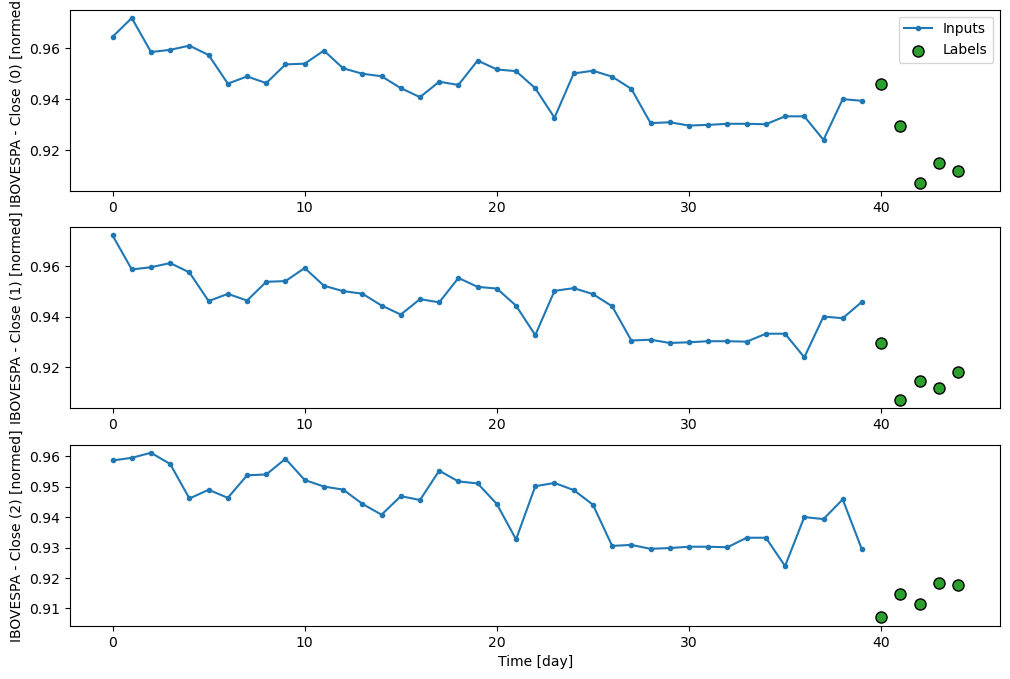

In [22]:
multi_window = WindowGenerator(INPUT_WINDOW_SIZE=INPUT_WINDOW_SIZE,
                               label_width=OUTPUT_WINDOW_SIZE,
                               shift=OUTPUT_WINDOW_SIZE, label_columns=[COLUMN_TO_PREDICT])

multi_window.plot(plot_col=COLUMN_TO_PREDICT)
multi_window

Criação da função de treino da rede

In [23]:
def compile_and_fit(model, window, PATIENCE=2, MAX_EPOCHS=150, LEARNING_RATE=0.00001):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=PATIENCE,
                                                    mode='min')
  
  # optimizer using learning rate schedule 
  lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=LEARNING_RATE,
    decay_steps=DECAY_STEPS,
    decay_rate=LEARNING_DECAY)

  # config optimizer
  optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
  
  # callback to print the learning rate and add it to the history
  class PrintLR(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
      lr = float(tf.keras.backend.get_value(self.model.optimizer.learning_rate))
      # print(f'Learning rate at epoch {epoch + 1}: {lr:.6f}')
      # add the learning rate to the history
      logs['lr'] = lr
  printlr = PrintLR()
  
  # config loss function
  if LOSS_FUNCTION == 'MAE':
    loss_function = tf.keras.losses.MeanAbsoluteError()
  elif LOSS_FUNCTION == 'MSE':
    loss_function = tf.keras.losses.MeanSquaredError()
  # elif LOSS_FUNCTION == 'CUSTOM':
  #   loss_function = custom_loss

  # model.compile(loss=tf.keras.losses.MeanAbsoluteError(),
  # model.compile(loss=tf.keras.losses.MeanSquaredError(),
  # model.compile(loss=custom_loss,
  model.compile(
                loss=loss_function,
                optimizer=optimizer,
                metrics=[
                  tf.keras.metrics.MeanAbsoluteError(),
                  tf.keras.metrics.MeanSquaredError(),
                  tf.keras.metrics.MeanAbsolutePercentageError(),
                  tf.keras.metrics.RootMeanSquaredError(),
                  # tf.keras.metrics.R2Score()
                  ]
              )

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[printlr, early_stopping])
  return history

Definir modelo da rede e realizar o treinamento

In [24]:
multi_window.train

<_MapDataset element_spec=(TensorSpec(shape=(None, 40, 4), dtype=tf.float32, name=None), TensorSpec(shape=(None, 5, 1), dtype=tf.float32, name=None))>

# Definir modelos

In [25]:
num_features = df_x_values.shape[1]

num_features

4

In [26]:
def get_model():
    if NUM_FEATURES is not None:
        num_features = NUM_FEATURES
    else:
        num_features = df_x_values.shape[1]
    
    if MODEL_TO_USE == 1:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(50, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model
    
    elif MODEL_TO_USE == 2:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(50, return_sequences=True), 
                    tf.keras.layers.LSTM(50, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model
    
    elif MODEL_TO_USE == 3:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(100, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model

Calculate metrics

In [27]:
# create dataframe for "hard" predictions
def create_df_repeat_prediction(data):        
    # predictions = data[COLUMN_TO_PREDICT].values[:-1]
    # labels = data[COLUMN_TO_PREDICT].values[1:]
    predictions, labels = None, None
    for part in iter(data):
        # print(part)
        if predictions is None:
            labels = part[1]
        else:
            labels = np.concatenate((labels, part[1]), axis=0)
    labels = labels[:, :, 0]
    # convert labels to 1D array
    # print(labels.shape)
    # print(labels)
    predictions = labels
    for i, label in enumerate(labels[:-1]):
        # if i == 3:
        #     break
        for j in range(len(label)):
            # replace values of predictions[i] with the first value of label
            predictions = tf.tensor_scatter_nd_update(
                predictions, 
                [[i, j]], 
                [label[0]]
            )
        # print(f"Label {i}: {label}")
        # print(f"Prediction {i}: {predictions[i]}")
    predictions = predictions[:-1]    
    labels = labels[1:]
    return {"predictions": predictions, "labels": labels}
    predictions_df = pd.DataFrame({"predictions": predictions, "labels": labels})
    predictions_df = predictions_df.dropna()
    return predictions_df

In [28]:
def make_repeat_predictions_metrics(data):
    predictions = create_df_repeat_prediction(data)
    mae = tf.keras.metrics.MeanAbsoluteError()
    mae.update_state(predictions["labels"], predictions["predictions"])
    mse = tf.keras.metrics.MeanSquaredError()
    mse.update_state(predictions["labels"], predictions["predictions"])
    mape = tf.keras.metrics.MeanAbsolutePercentageError()
    mape.update_state(predictions["labels"], predictions["predictions"])
    rmse = tf.keras.metrics.RootMeanSquaredError()
    rmse.update_state(predictions["labels"], predictions["predictions"])
    print(f"MAE: {mae.result()} - MSE: {mse.result()} - MAPE: {mape.result()} - RMSE: {rmse.result()}")
    return {
            "Loss": None,
            "MAE": float(mae.result()),
            "MSE": float(mse.result()),
            "MAPE": float(mape.result()),
            "RMSE": float(rmse.result()),
        }


In [29]:
def make_model_predictions_metrics(model, data):
    loss, mae, mse, mape, rmse = model.evaluate(data)
    print(f"Loss: {loss} - MAE: {mae} - MSE: {mse} - MAPE: {mape} - RMSE: {rmse}")
    return {
            "Loss": loss,
            "MAE": mae,
            "MSE": mse,
            "MAPE": mape,
            "RMSE": rmse,
        }

Treinar modelos

In [30]:
# record start time
training_start = time.time()

model = get_model()

history = compile_and_fit(model, multi_window, PATIENCE, MAX_EPOCHS, LEARNING_RATE)

# record end time
training_end = time.time()

Epoch 1/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 14:18 4s/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 100.0000 - mean_squared_error: 5.7411e-05 - root_mean_squared_error: 0.0076

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 74.4356 - mean_squared_error: 6.3841e-05 - root_mean_squared_error: 0.0078  

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 63.9948 - mean_squared_error: 7.2307e-05 - root_mean_squared_error: 0.0084

  7/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 56.5474 - mean_squared_error: 7.0906e-05 - root_mean_squared_error: 0.0083

  9/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 51.2330 - mean_squared_error: 6.7490e-05 - root_mean_squared_error: 0.0081

 11/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 47.2046 - mean_squared_error: 6.3995e-05 - root_mean_squared_error: 0.0079

 13/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 43.9940 - mean_squared_error: 6.0792e-05 - root_mean_squared_error: 0.0077

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 41.3993 - mean_squared_error: 5.8151e-05 - root_mean_squared_error: 0.0075

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 39.3027 - mean_squared_error: 5.6236e-05 - root_mean_squared_error: 0.0074

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 37.4687 - mean_squared_error: 5.4408e-05 - root_mean_squared_error: 0.0073

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 35.8229 - mean_squared_error: 5.2621e-05 - root_mean_squared_error: 0.0072

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 34.3766 - mean_squared_error: 5.1146e-05 - root_mean_squared_error: 0.0071

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 33.1230 - mean_squared_error: 5.0261e-05 - root_mean_squared_error: 0.0070

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 32.0191 - mean_squared_error: 5.0310e-05 - root_mean_squared_error: 0.0070

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 31.0563 - mean_squared_error: 5.1238e-05 - root_mean_squared_error: 0.0071

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 30.2098 - mean_squared_error: 5.2451e-05 - root_mean_squared_error: 0.0072

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 29.4616 - mean_squared_error: 5.4007e-05 - root_mean_squared_error: 0.0073

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 28.8654 - mean_squared_error: 5.7254e-05 - root_mean_squared_error: 0.0074

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 28.4312 - mean_squared_error: 6.1971e-05 - root_mean_squared_error: 0.0077

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 28.0447 - mean_squared_error: 6.6441e-05 - root_mean_squared_error: 0.0079

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 27.7482 - mean_squared_error: 7.2865e-05 - root_mean_squared_error: 0.0082

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 27.4832 - mean_squared_error: 7.9242e-05 - root_mean_squared_error: 0.0085

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 27.2126 - mean_squared_error: 8.4775e-05 - root_mean_squared_error: 0.0088

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 26.9355 - mean_squared_error: 8.9585e-05 - root_mean_squared_error: 0.0090

 49/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 26.6721 - mean_squared_error: 9.4382e-05 - root_mean_squared_error: 0.0092

 51/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 26.4137 - mean_squared_error: 9.8792e-05 - root_mean_squared_error: 0.0094

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 26.1711 - mean_squared_error: 1.0315e-04 - root_mean_squared_error: 0.0096

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 25.9310 - mean_squared_error: 1.0712e-04 - root_mean_squared_error: 0.0098

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 25.6893 - mean_squared_error: 1.1059e-04 - root_mean_squared_error: 0.0100

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 25.4520 - mean_squared_error: 1.1371e-04 - root_mean_squared_error: 0.0101

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 25.2216 - mean_squared_error: 1.1653e-04 - root_mean_squared_error: 0.0102

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 24.9951 - mean_squared_error: 1.1904e-04 - root_mean_squared_error: 0.0104

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 24.7800 - mean_squared_error: 1.2143e-04 - root_mean_squared_error: 0.0105

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 24.5980 - mean_squared_error: 1.2421e-04 - root_mean_squared_error: 0.0106

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 24.4313 - mean_squared_error: 1.2696e-04 - root_mean_squared_error: 0.0107

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 24.2658 - mean_squared_error: 1.2945e-04 - root_mean_squared_error: 0.0108

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 24.1158 - mean_squared_error: 1.3217e-04 - root_mean_squared_error: 0.0109

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 23.9871 - mean_squared_error: 1.3593e-04 - root_mean_squared_error: 0.0111

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 23.8821 - mean_squared_error: 1.4227e-04 - root_mean_squared_error: 0.0113

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 23.7882 - mean_squared_error: 1.4976e-04 - root_mean_squared_error: 0.0116

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 23.7118 - mean_squared_error: 1.5963e-04 - root_mean_squared_error: 0.0118

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 23.6346 - mean_squared_error: 1.6901e-04 - root_mean_squared_error: 0.0121

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 23.5606 - mean_squared_error: 1.7835e-04 - root_mean_squared_error: 0.0124

 87/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 23.4872 - mean_squared_error: 1.8755e-04 - root_mean_squared_error: 0.0127

 89/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 23.4114 - mean_squared_error: 1.9621e-04 - root_mean_squared_error: 0.0129

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 23.3323 - mean_squared_error: 2.0434e-04 - root_mean_squared_error: 0.0132

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 23.2515 - mean_squared_error: 2.1211e-04 - root_mean_squared_error: 0.0134

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 23.1686 - mean_squared_error: 2.1958e-04 - root_mean_squared_error: 0.0136

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 23.0881 - mean_squared_error: 2.2748e-04 - root_mean_squared_error: 0.0138

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 23.0060 - mean_squared_error: 2.3510e-04 - root_mean_squared_error: 0.0141

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 22.9279 - mean_squared_error: 2.4392e-04 - root_mean_squared_error: 0.0143

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 22.8542 - mean_squared_error: 2.5443e-04 - root_mean_squared_error: 0.0146

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 22.7848 - mean_squared_error: 2.6722e-04 - root_mean_squared_error: 0.0149

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 22.7143 - mean_squared_error: 2.7993e-04 - root_mean_squared_error: 0.0152

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 22.6451 - mean_squared_error: 2.9382e-04 - root_mean_squared_error: 0.0155

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 22.5762 - mean_squared_error: 3.0818e-04 - root_mean_squared_error: 0.0158

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 22.5067 - mean_squared_error: 3.2267e-04 - root_mean_squared_error: 0.0161

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 22.4400 - mean_squared_error: 3.3813e-04 - root_mean_squared_error: 0.0164

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 22.3828 - mean_squared_error: 3.5694e-04 - root_mean_squared_error: 0.0168

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 22.3275 - mean_squared_error: 3.7572e-04 - root_mean_squared_error: 0.0172

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 22.2738 - mean_squared_error: 3.9504e-04 - root_mean_squared_error: 0.0175

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 22.2251 - mean_squared_error: 4.1821e-04 - root_mean_squared_error: 0.0179

125/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 22.1829 - mean_squared_error: 4.4902e-04 - root_mean_squared_error: 0.0184

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 22.1458 - mean_squared_error: 4.8593e-04 - root_mean_squared_error: 0.0190

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 22.1111 - mean_squared_error: 5.2459e-04 - root_mean_squared_error: 0.0195

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 22.0768 - mean_squared_error: 5.6299e-04 - root_mean_squared_error: 0.0201

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 22.0408 - mean_squared_error: 6.0007e-04 - root_mean_squared_error: 0.0206

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 22.0052 - mean_squared_error: 6.3702e-04 - root_mean_squared_error: 0.0211

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 21.9711 - mean_squared_error: 6.7449e-04 - root_mean_squared_error: 0.0216

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 21.9396 - mean_squared_error: 7.1274e-04 - root_mean_squared_error: 0.0221

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 21.9074 - mean_squared_error: 7.4991e-04 - root_mean_squared_error: 0.0226

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 21.8746 - mean_squared_error: 7.8618e-04 - root_mean_squared_error: 0.0231

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 21.8408 - mean_squared_error: 8.2134e-04 - root_mean_squared_error: 0.0236

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 21.8054 - mean_squared_error: 8.5509e-04 - root_mean_squared_error: 0.0241

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 21.7683 - mean_squared_error: 8.8743e-04 - root_mean_squared_error: 0.0245

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 21.7298 - mean_squared_error: 9.1847e-04 - root_mean_squared_error: 0.0249

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 21.6919 - mean_squared_error: 9.4895e-04 - root_mean_squared_error: 0.0254

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 21.6559 - mean_squared_error: 9.7942e-04 - root_mean_squared_error: 0.0258

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 21.6196 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0262    

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 21.5833 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0266

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 21.5461 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0270

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 21.5093 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0273

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 21.4726 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0277

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 21.4348 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0280

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 21.3963 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0284

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 21.3572 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0287

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 21.3188 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0290

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 21.2824 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0293

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 21.2455 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0296

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 21.2082 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0299

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 21.1716 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0302

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 21.1360 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0305

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 21.1014 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0308

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 21.0672 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0311

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 21.0339 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0314

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 21.0015 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0317

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 20.9696 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0320

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 20.9371 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0323

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 20.9038 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0326

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 20.8698 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0328

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 20.8351 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0331

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 20.7996 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0334

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0230 - mean_absolute_error: 0.0230 - mean_absolute_percentage_error: 20.7634 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0336

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 20.7267 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0339

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0233 - mean_absolute_error: 0.0233 - mean_absolute_percentage_error: 20.6923 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0341

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 20.6594 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0344

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0237 - mean_absolute_error: 0.0237 - mean_absolute_percentage_error: 20.6267 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0347

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - mean_absolute_percentage_error: 20.5940 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0350

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0241 - mean_absolute_error: 0.0241 - mean_absolute_percentage_error: 20.5615 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0353

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0243 - mean_absolute_error: 0.0243 - mean_absolute_percentage_error: 20.5296 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0356

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0245 - mean_absolute_error: 0.0245 - mean_absolute_percentage_error: 20.4977 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0359

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0247 - mean_absolute_error: 0.0247 - mean_absolute_percentage_error: 20.4654 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0362

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0249 - mean_absolute_error: 0.0249 - mean_absolute_percentage_error: 20.4326 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0364

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0251 - mean_absolute_error: 0.0251 - mean_absolute_percentage_error: 20.3996 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0367

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0253 - mean_absolute_error: 0.0253 - mean_absolute_percentage_error: 20.3664 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0370

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0255 - mean_absolute_error: 0.0255 - mean_absolute_percentage_error: 20.3327 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0372

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0257 - mean_absolute_error: 0.0257 - mean_absolute_percentage_error: 20.2986 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0375

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0258 - mean_absolute_error: 0.0258 - mean_absolute_percentage_error: 20.2814 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0376

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0259 - mean_absolute_error: 0.0259 - mean_absolute_percentage_error: 20.2472 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0379

237/237 ━━━━━━━━━━━━━━━━━━━━ 11s 31ms/step - loss: 0.0261 - mean_absolute_error: 0.0261 - mean_absolute_percentage_error: 20.2135 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0381 - val_loss: 0.1459 - val_mean_absolute_error: 0.1459 - val_mean_absolute_percentage_error: 15.5295 - val_mean_squared_error: 0.0221 - val_root_mean_squared_error: 0.1486 - lr: 0.0098


Epoch 2/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 14s 60ms/step - loss: 0.7410 - mean_absolute_error: 0.7410 - mean_absolute_percentage_error: 9956.5820 - mean_squared_error: 0.5491 - root_mean_squared_error: 0.7410

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.7377 - mean_absolute_error: 0.7377 - mean_absolute_percentage_error: 8309.5391 - mean_squared_error: 0.5443 - root_mean_squared_error: 0.7378 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.7295 - mean_absolute_error: 0.7295 - mean_absolute_percentage_error: 7041.7241 - mean_squared_error: 0.5325 - root_mean_squared_error: 0.7296

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.7155 - mean_absolute_error: 0.7155 - mean_absolute_percentage_error: 6211.6118 - mean_squared_error: 0.5140 - root_mean_squared_error: 0.7166

  9/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.7155 - mean_absolute_error: 0.7155 - mean_absolute_percentage_error: 5744.6919 - mean_squared_error: 0.5233 - root_mean_squared_error: 0.7230

 11/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.7041 - mean_absolute_error: 0.7041 - mean_absolute_percentage_error: 5360.0649 - mean_squared_error: 0.5152 - root_mean_squared_error: 0.7173

 13/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.6887 - mean_absolute_error: 0.6887 - mean_absolute_percentage_error: 5034.5615 - mean_squared_error: 0.5031 - root_mean_squared_error: 0.7086

 15/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.6760 - mean_absolute_error: 0.6760 - mean_absolute_percentage_error: 4770.4580 - mean_squared_error: 0.4929 - root_mean_squared_error: 0.7012

 17/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.6597 - mean_absolute_error: 0.6597 - mean_absolute_percentage_error: 4530.3877 - mean_squared_error: 0.4794 - root_mean_squared_error: 0.6910

 19/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.6427 - mean_absolute_error: 0.6427 - mean_absolute_percentage_error: 4314.8931 - mean_squared_error: 0.4649 - root_mean_squared_error: 0.6798

 21/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.6253 - mean_absolute_error: 0.6253 - mean_absolute_percentage_error: 4119.6226 - mean_squared_error: 0.4501 - root_mean_squared_error: 0.6680

 23/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.6078 - mean_absolute_error: 0.6078 - mean_absolute_percentage_error: 3941.7314 - mean_squared_error: 0.4355 - root_mean_squared_error: 0.6562

 25/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.5909 - mean_absolute_error: 0.5909 - mean_absolute_percentage_error: 3779.5852 - mean_squared_error: 0.4215 - root_mean_squared_error: 0.6445

 27/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.5748 - mean_absolute_error: 0.5748 - mean_absolute_percentage_error: 3631.3843 - mean_squared_error: 0.4082 - root_mean_squared_error: 0.6331

 29/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.5594 - mean_absolute_error: 0.5594 - mean_absolute_percentage_error: 3495.3682 - mean_squared_error: 0.3955 - root_mean_squared_error: 0.6222

 31/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.5449 - mean_absolute_error: 0.5449 - mean_absolute_percentage_error: 3370.4907 - mean_squared_error: 0.3836 - root_mean_squared_error: 0.6117

 33/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.5313 - mean_absolute_error: 0.5313 - mean_absolute_percentage_error: 3255.3770 - mean_squared_error: 0.3725 - root_mean_squared_error: 0.6017

 35/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.5185 - mean_absolute_error: 0.5185 - mean_absolute_percentage_error: 3149.0342 - mean_squared_error: 0.3619 - root_mean_squared_error: 0.5921

 37/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.5065 - mean_absolute_error: 0.5065 - mean_absolute_percentage_error: 3050.6890 - mean_squared_error: 0.3521 - root_mean_squared_error: 0.5830

 39/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.4952 - mean_absolute_error: 0.4952 - mean_absolute_percentage_error: 2959.4751 - mean_squared_error: 0.3428 - root_mean_squared_error: 0.5743

 40/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.4898 - mean_absolute_error: 0.4898 - mean_absolute_percentage_error: 2916.2280 - mean_squared_error: 0.3383 - root_mean_squared_error: 0.5701

 42/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.4796 - mean_absolute_error: 0.4796 - mean_absolute_percentage_error: 2834.1821 - mean_squared_error: 0.3298 - root_mean_squared_error: 0.5620

 44/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.4701 - mean_absolute_error: 0.4701 - mean_absolute_percentage_error: 2757.4417 - mean_squared_error: 0.3219 - root_mean_squared_error: 0.5543

 46/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.4610 - mean_absolute_error: 0.4610 - mean_absolute_percentage_error: 2685.3379 - mean_squared_error: 0.3143 - root_mean_squared_error: 0.5469

 48/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.4524 - mean_absolute_error: 0.4524 - mean_absolute_percentage_error: 2617.4944 - mean_squared_error: 0.3071 - root_mean_squared_error: 0.5398

 50/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.4443 - mean_absolute_error: 0.4443 - mean_absolute_percentage_error: 2553.5166 - mean_squared_error: 0.3003 - root_mean_squared_error: 0.5331

 52/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.4366 - mean_absolute_error: 0.4366 - mean_absolute_percentage_error: 2493.0596 - mean_squared_error: 0.2939 - root_mean_squared_error: 0.5266

 54/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.4292 - mean_absolute_error: 0.4292 - mean_absolute_percentage_error: 2435.8176 - mean_squared_error: 0.2877 - root_mean_squared_error: 0.5203

 56/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.4221 - mean_absolute_error: 0.4221 - mean_absolute_percentage_error: 2381.5364 - mean_squared_error: 0.2819 - root_mean_squared_error: 0.5143

 58/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.4153 - mean_absolute_error: 0.4153 - mean_absolute_percentage_error: 2330.0029 - mean_squared_error: 0.2763 - root_mean_squared_error: 0.5085

 60/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.4089 - mean_absolute_error: 0.4089 - mean_absolute_percentage_error: 2281.0125 - mean_squared_error: 0.2709 - root_mean_squared_error: 0.5029

 62/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.4026 - mean_absolute_error: 0.4026 - mean_absolute_percentage_error: 2234.3452 - mean_squared_error: 0.2658 - root_mean_squared_error: 0.4974

 64/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.3967 - mean_absolute_error: 0.3967 - mean_absolute_percentage_error: 2189.8787 - mean_squared_error: 0.2609 - root_mean_squared_error: 0.4922

 66/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.3910 - mean_absolute_error: 0.3910 - mean_absolute_percentage_error: 2147.4380 - mean_squared_error: 0.2562 - root_mean_squared_error: 0.4872

 68/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.3854 - mean_absolute_error: 0.3854 - mean_absolute_percentage_error: 2106.8877 - mean_squared_error: 0.2517 - root_mean_squared_error: 0.4823

 70/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.3802 - mean_absolute_error: 0.3802 - mean_absolute_percentage_error: 2068.1282 - mean_squared_error: 0.2474 - root_mean_squared_error: 0.4776

 72/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.3751 - mean_absolute_error: 0.3751 - mean_absolute_percentage_error: 2031.0027 - mean_squared_error: 0.2433 - root_mean_squared_error: 0.4730

 73/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.3726 - mean_absolute_error: 0.3726 - mean_absolute_percentage_error: 2013.0150 - mean_squared_error: 0.2412 - root_mean_squared_error: 0.4708

 75/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.3678 - mean_absolute_error: 0.3678 - mean_absolute_percentage_error: 1978.1252 - mean_squared_error: 0.2373 - root_mean_squared_error: 0.4664

 77/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.3631 - mean_absolute_error: 0.3631 - mean_absolute_percentage_error: 1944.5929 - mean_squared_error: 0.2336 - root_mean_squared_error: 0.4622

 78/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.3608 - mean_absolute_error: 0.3608 - mean_absolute_percentage_error: 1928.3088 - mean_squared_error: 0.2317 - root_mean_squared_error: 0.4601

 80/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.3563 - mean_absolute_error: 0.3563 - mean_absolute_percentage_error: 1896.6615 - mean_squared_error: 0.2281 - root_mean_squared_error: 0.4561

 82/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.3520 - mean_absolute_error: 0.3520 - mean_absolute_percentage_error: 1866.1787 - mean_squared_error: 0.2247 - root_mean_squared_error: 0.4521

 84/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.3478 - mean_absolute_error: 0.3478 - mean_absolute_percentage_error: 1836.8019 - mean_squared_error: 0.2214 - root_mean_squared_error: 0.4483

 86/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.3438 - mean_absolute_error: 0.3438 - mean_absolute_percentage_error: 1808.4658 - mean_squared_error: 0.2181 - root_mean_squared_error: 0.4446

 88/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.3399 - mean_absolute_error: 0.3399 - mean_absolute_percentage_error: 1781.1161 - mean_squared_error: 0.2150 - root_mean_squared_error: 0.4409

 90/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.3361 - mean_absolute_error: 0.3361 - mean_absolute_percentage_error: 1754.6986 - mean_squared_error: 0.2120 - root_mean_squared_error: 0.4374

 92/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.3324 - mean_absolute_error: 0.3324 - mean_absolute_percentage_error: 1729.1615 - mean_squared_error: 0.2091 - root_mean_squared_error: 0.4340

 94/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.3288 - mean_absolute_error: 0.3288 - mean_absolute_percentage_error: 1704.4537 - mean_squared_error: 0.2063 - root_mean_squared_error: 0.4306

 96/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.3253 - mean_absolute_error: 0.3253 - mean_absolute_percentage_error: 1680.5345 - mean_squared_error: 0.2035 - root_mean_squared_error: 0.4273

 98/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.3219 - mean_absolute_error: 0.3219 - mean_absolute_percentage_error: 1657.3655 - mean_squared_error: 0.2009 - root_mean_squared_error: 0.4241

100/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.3186 - mean_absolute_error: 0.3186 - mean_absolute_percentage_error: 1634.9115 - mean_squared_error: 0.1983 - root_mean_squared_error: 0.4210

102/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.3154 - mean_absolute_error: 0.3154 - mean_absolute_percentage_error: 1613.1360 - mean_squared_error: 0.1958 - root_mean_squared_error: 0.4180

104/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.3123 - mean_absolute_error: 0.3123 - mean_absolute_percentage_error: 1592.0076 - mean_squared_error: 0.1934 - root_mean_squared_error: 0.4150

106/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.3092 - mean_absolute_error: 0.3092 - mean_absolute_percentage_error: 1571.4958 - mean_squared_error: 0.1910 - root_mean_squared_error: 0.4121

108/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.3062 - mean_absolute_error: 0.3062 - mean_absolute_percentage_error: 1551.5724 - mean_squared_error: 0.1887 - root_mean_squared_error: 0.4092

110/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.3033 - mean_absolute_error: 0.3033 - mean_absolute_percentage_error: 1532.2124 - mean_squared_error: 0.1864 - root_mean_squared_error: 0.4064

112/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.3005 - mean_absolute_error: 0.3005 - mean_absolute_percentage_error: 1513.3914 - mean_squared_error: 0.1843 - root_mean_squared_error: 0.4037

114/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.2977 - mean_absolute_error: 0.2977 - mean_absolute_percentage_error: 1495.0894 - mean_squared_error: 0.1821 - root_mean_squared_error: 0.4010

116/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.2951 - mean_absolute_error: 0.2951 - mean_absolute_percentage_error: 1477.2936 - mean_squared_error: 0.1801 - root_mean_squared_error: 0.3984

118/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.2925 - mean_absolute_error: 0.2925 - mean_absolute_percentage_error: 1459.9794 - mean_squared_error: 0.1781 - root_mean_squared_error: 0.3959

120/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.2900 - mean_absolute_error: 0.2900 - mean_absolute_percentage_error: 1443.1333 - mean_squared_error: 0.1761 - root_mean_squared_error: 0.3935

122/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.2876 - mean_absolute_error: 0.2876 - mean_absolute_percentage_error: 1426.7333 - mean_squared_error: 0.1743 - root_mean_squared_error: 0.3911

124/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.2853 - mean_absolute_error: 0.2853 - mean_absolute_percentage_error: 1410.7522 - mean_squared_error: 0.1724 - root_mean_squared_error: 0.3887

126/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.2831 - mean_absolute_error: 0.2831 - mean_absolute_percentage_error: 1395.1747 - mean_squared_error: 0.1707 - root_mean_squared_error: 0.3865

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.2820 - mean_absolute_error: 0.2820 - mean_absolute_percentage_error: 1387.5333 - mean_squared_error: 0.1698 - root_mean_squared_error: 0.3854

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.2799 - mean_absolute_error: 0.2799 - mean_absolute_percentage_error: 1372.5355 - mean_squared_error: 0.1681 - root_mean_squared_error: 0.3832

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.2778 - mean_absolute_error: 0.2778 - mean_absolute_percentage_error: 1357.9019 - mean_squared_error: 0.1664 - root_mean_squared_error: 0.3810

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.2758 - mean_absolute_error: 0.2758 - mean_absolute_percentage_error: 1343.6211 - mean_squared_error: 0.1648 - root_mean_squared_error: 0.3789

134/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.2748 - mean_absolute_error: 0.2748 - mean_absolute_percentage_error: 1336.6083 - mean_squared_error: 0.1640 - root_mean_squared_error: 0.3779

135/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.2738 - mean_absolute_error: 0.2738 - mean_absolute_percentage_error: 1329.6781 - mean_squared_error: 0.1632 - root_mean_squared_error: 0.3769

137/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.2719 - mean_absolute_error: 0.2719 - mean_absolute_percentage_error: 1316.0601 - mean_squared_error: 0.1617 - root_mean_squared_error: 0.3749

138/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.2710 - mean_absolute_error: 0.2710 - mean_absolute_percentage_error: 1309.3704 - mean_squared_error: 0.1609 - root_mean_squared_error: 0.3739

139/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.2701 - mean_absolute_error: 0.2701 - mean_absolute_percentage_error: 1302.7582 - mean_squared_error: 0.1601 - root_mean_squared_error: 0.3729

140/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.2691 - mean_absolute_error: 0.2691 - mean_absolute_percentage_error: 1296.2214 - mean_squared_error: 0.1594 - root_mean_squared_error: 0.3719

141/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.2682 - mean_absolute_error: 0.2682 - mean_absolute_percentage_error: 1289.7587 - mean_squared_error: 0.1587 - root_mean_squared_error: 0.3709

142/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.2673 - mean_absolute_error: 0.2673 - mean_absolute_percentage_error: 1283.3694 - mean_squared_error: 0.1579 - root_mean_squared_error: 0.3700

143/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.2665 - mean_absolute_error: 0.2665 - mean_absolute_percentage_error: 1277.0522 - mean_squared_error: 0.1572 - root_mean_squared_error: 0.3690

144/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.2656 - mean_absolute_error: 0.2656 - mean_absolute_percentage_error: 1270.8053 - mean_squared_error: 0.1565 - root_mean_squared_error: 0.3681

145/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.2647 - mean_absolute_error: 0.2647 - mean_absolute_percentage_error: 1264.6268 - mean_squared_error: 0.1558 - root_mean_squared_error: 0.3672

146/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.2639 - mean_absolute_error: 0.2639 - mean_absolute_percentage_error: 1258.5160 - mean_squared_error: 0.1551 - root_mean_squared_error: 0.3663

147/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.2630 - mean_absolute_error: 0.2630 - mean_absolute_percentage_error: 1252.4713 - mean_squared_error: 0.1544 - root_mean_squared_error: 0.3653

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2613 - mean_absolute_error: 0.2613 - mean_absolute_percentage_error: 1240.5762 - mean_squared_error: 0.1531 - root_mean_squared_error: 0.3635

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2597 - mean_absolute_error: 0.2597 - mean_absolute_percentage_error: 1228.9327 - mean_squared_error: 0.1517 - root_mean_squared_error: 0.3618

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2580 - mean_absolute_error: 0.2580 - mean_absolute_percentage_error: 1217.5334 - mean_squared_error: 0.1504 - root_mean_squared_error: 0.3600

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2564 - mean_absolute_error: 0.2564 - mean_absolute_percentage_error: 1206.3706 - mean_squared_error: 0.1491 - root_mean_squared_error: 0.3583

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2549 - mean_absolute_error: 0.2549 - mean_absolute_percentage_error: 1195.4377 - mean_squared_error: 0.1479 - root_mean_squared_error: 0.3566

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2533 - mean_absolute_error: 0.2533 - mean_absolute_percentage_error: 1184.7271 - mean_squared_error: 0.1467 - root_mean_squared_error: 0.3549

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2518 - mean_absolute_error: 0.2518 - mean_absolute_percentage_error: 1174.2306 - mean_squared_error: 0.1454 - root_mean_squared_error: 0.3533

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2503 - mean_absolute_error: 0.2503 - mean_absolute_percentage_error: 1163.9415 - mean_squared_error: 0.1443 - root_mean_squared_error: 0.3516

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2488 - mean_absolute_error: 0.2488 - mean_absolute_percentage_error: 1153.8545 - mean_squared_error: 0.1431 - root_mean_squared_error: 0.3501

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.2474 - mean_absolute_error: 0.2474 - mean_absolute_percentage_error: 1143.9640 - mean_squared_error: 0.1420 - root_mean_squared_error: 0.3485

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.2459 - mean_absolute_error: 0.2459 - mean_absolute_percentage_error: 1134.2633 - mean_squared_error: 0.1408 - root_mean_squared_error: 0.3469

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.2445 - mean_absolute_error: 0.2445 - mean_absolute_percentage_error: 1124.7465 - mean_squared_error: 0.1397 - root_mean_squared_error: 0.3454

173/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.2431 - mean_absolute_error: 0.2431 - mean_absolute_percentage_error: 1115.4087 - mean_squared_error: 0.1387 - root_mean_squared_error: 0.3439

175/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.2418 - mean_absolute_error: 0.2418 - mean_absolute_percentage_error: 1106.2445 - mean_squared_error: 0.1376 - root_mean_squared_error: 0.3424

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.2404 - mean_absolute_error: 0.2404 - mean_absolute_percentage_error: 1097.2516 - mean_squared_error: 0.1366 - root_mean_squared_error: 0.3409

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.2391 - mean_absolute_error: 0.2391 - mean_absolute_percentage_error: 1088.4246 - mean_squared_error: 0.1355 - root_mean_squared_error: 0.3395

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.2379 - mean_absolute_error: 0.2379 - mean_absolute_percentage_error: 1079.7567 - mean_squared_error: 0.1345 - root_mean_squared_error: 0.3381

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.2366 - mean_absolute_error: 0.2366 - mean_absolute_percentage_error: 1071.2445 - mean_squared_error: 0.1335 - root_mean_squared_error: 0.3367

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.2354 - mean_absolute_error: 0.2354 - mean_absolute_percentage_error: 1062.8833 - mean_squared_error: 0.1326 - root_mean_squared_error: 0.3353

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.2341 - mean_absolute_error: 0.2341 - mean_absolute_percentage_error: 1054.6677 - mean_squared_error: 0.1316 - root_mean_squared_error: 0.3340

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.2329 - mean_absolute_error: 0.2329 - mean_absolute_percentage_error: 1046.5931 - mean_squared_error: 0.1307 - root_mean_squared_error: 0.3326

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.2318 - mean_absolute_error: 0.2318 - mean_absolute_percentage_error: 1038.6561 - mean_squared_error: 0.1298 - root_mean_squared_error: 0.3313

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.2306 - mean_absolute_error: 0.2306 - mean_absolute_percentage_error: 1030.8533 - mean_squared_error: 0.1288 - root_mean_squared_error: 0.3300

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.2294 - mean_absolute_error: 0.2294 - mean_absolute_percentage_error: 1023.1814 - mean_squared_error: 0.1280 - root_mean_squared_error: 0.3287

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.2283 - mean_absolute_error: 0.2283 - mean_absolute_percentage_error: 1015.6367 - mean_squared_error: 0.1271 - root_mean_squared_error: 0.3274

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.2277 - mean_absolute_error: 0.2277 - mean_absolute_percentage_error: 1011.9108 - mean_squared_error: 0.1266 - root_mean_squared_error: 0.3268

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.2266 - mean_absolute_error: 0.2266 - mean_absolute_percentage_error: 1004.5508 - mean_squared_error: 0.1258 - root_mean_squared_error: 0.3255

202/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.2255 - mean_absolute_error: 0.2255 - mean_absolute_percentage_error: 997.3100 - mean_squared_error: 0.1249 - root_mean_squared_error: 0.3243 

204/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.2244 - mean_absolute_error: 0.2244 - mean_absolute_percentage_error: 990.1851 - mean_squared_error: 0.1241 - root_mean_squared_error: 0.3231

206/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.2233 - mean_absolute_error: 0.2233 - mean_absolute_percentage_error: 983.1732 - mean_squared_error: 0.1233 - root_mean_squared_error: 0.3219

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2223 - mean_absolute_error: 0.2223 - mean_absolute_percentage_error: 976.2725 - mean_squared_error: 0.1225 - root_mean_squared_error: 0.3207

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.2212 - mean_absolute_error: 0.2212 - mean_absolute_percentage_error: 969.4831 - mean_squared_error: 0.1217 - root_mean_squared_error: 0.3195

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.2202 - mean_absolute_error: 0.2202 - mean_absolute_percentage_error: 962.8000 - mean_squared_error: 0.1209 - root_mean_squared_error: 0.3184

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.2192 - mean_absolute_error: 0.2192 - mean_absolute_percentage_error: 956.2200 - mean_squared_error: 0.1201 - root_mean_squared_error: 0.3173

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.2183 - mean_absolute_error: 0.2183 - mean_absolute_percentage_error: 949.7402 - mean_squared_error: 0.1194 - root_mean_squared_error: 0.3162

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.2173 - mean_absolute_error: 0.2173 - mean_absolute_percentage_error: 943.3585 - mean_squared_error: 0.1187 - root_mean_squared_error: 0.3151

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.2164 - mean_absolute_error: 0.2164 - mean_absolute_percentage_error: 937.0726 - mean_squared_error: 0.1179 - root_mean_squared_error: 0.3140

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.2154 - mean_absolute_error: 0.2154 - mean_absolute_percentage_error: 930.8799 - mean_squared_error: 0.1172 - root_mean_squared_error: 0.3129

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.2145 - mean_absolute_error: 0.2145 - mean_absolute_percentage_error: 924.7786 - mean_squared_error: 0.1165 - root_mean_squared_error: 0.3118

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.2136 - mean_absolute_error: 0.2136 - mean_absolute_percentage_error: 918.7662 - mean_squared_error: 0.1158 - root_mean_squared_error: 0.3108

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.2127 - mean_absolute_error: 0.2127 - mean_absolute_percentage_error: 912.8410 - mean_squared_error: 0.1151 - root_mean_squared_error: 0.3098

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.2118 - mean_absolute_error: 0.2118 - mean_absolute_percentage_error: 907.0007 - mean_squared_error: 0.1144 - root_mean_squared_error: 0.3087

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.2109 - mean_absolute_error: 0.2109 - mean_absolute_percentage_error: 901.2433 - mean_squared_error: 0.1137 - root_mean_squared_error: 0.3077

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.2101 - mean_absolute_error: 0.2101 - mean_absolute_percentage_error: 895.5671 - mean_squared_error: 0.1131 - root_mean_squared_error: 0.3067

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.2088 - mean_absolute_error: 0.2088 - mean_absolute_percentage_error: 887.2050 - mean_squared_error: 0.1121 - root_mean_squared_error: 0.3052

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - loss: 0.2084 - mean_absolute_error: 0.2084 - mean_absolute_percentage_error: 884.4625 - mean_squared_error: 0.1118 - root_mean_squared_error: 0.3047 - val_loss: 0.1302 - val_mean_absolute_error: 0.1302 - val_mean_absolute_percentage_error: 13.8534 - val_mean_squared_error: 0.0178 - val_root_mean_squared_error: 0.1332 - lr: 0.0095


Epoch 3/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 11s 49ms/step - loss: 0.6310 - mean_absolute_error: 0.6310 - mean_absolute_percentage_error: 8477.5469 - mean_squared_error: 0.3982 - root_mean_squared_error: 0.6310

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.6161 - mean_absolute_error: 0.6161 - mean_absolute_percentage_error: 6991.6343 - mean_squared_error: 0.3801 - root_mean_squared_error: 0.6164 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.5954 - mean_absolute_error: 0.5954 - mean_absolute_percentage_error: 5870.5127 - mean_squared_error: 0.3568 - root_mean_squared_error: 0.5967

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.5664 - mean_absolute_error: 0.5664 - mean_absolute_percentage_error: 5110.9727 - mean_squared_error: 0.3298 - root_mean_squared_error: 0.5725

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.5334 - mean_absolute_error: 0.5334 - mean_absolute_percentage_error: 4563.4092 - mean_squared_error: 0.3031 - root_mean_squared_error: 0.5470

 11/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5034 - mean_absolute_error: 0.5034 - mean_absolute_percentage_error: 4145.2080 - mean_squared_error: 0.2803 - root_mean_squared_error: 0.5242

 13/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.4783 - mean_absolute_error: 0.4783 - mean_absolute_percentage_error: 3816.9048 - mean_squared_error: 0.2615 - root_mean_squared_error: 0.5046

 15/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.4551 - mean_absolute_error: 0.4551 - mean_absolute_percentage_error: 3544.1321 - mean_squared_error: 0.2449 - root_mean_squared_error: 0.4868

 17/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.4350 - mean_absolute_error: 0.4350 - mean_absolute_percentage_error: 3315.8845 - mean_squared_error: 0.2307 - root_mean_squared_error: 0.4709

 19/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.4169 - mean_absolute_error: 0.4169 - mean_absolute_percentage_error: 3120.2029 - mean_squared_error: 0.2182 - root_mean_squared_error: 0.4565

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.4008 - mean_absolute_error: 0.4008 - mean_absolute_percentage_error: 2950.4253 - mean_squared_error: 0.2072 - root_mean_squared_error: 0.4435

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.3861 - mean_absolute_error: 0.3861 - mean_absolute_percentage_error: 2801.0093 - mean_squared_error: 0.1974 - root_mean_squared_error: 0.4317

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.3730 - mean_absolute_error: 0.3730 - mean_absolute_percentage_error: 2668.5088 - mean_squared_error: 0.1887 - root_mean_squared_error: 0.4210

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.3612 - mean_absolute_error: 0.3612 - mean_absolute_percentage_error: 2550.0579 - mean_squared_error: 0.1809 - root_mean_squared_error: 0.4112

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.3504 - mean_absolute_error: 0.3504 - mean_absolute_percentage_error: 2443.1904 - mean_squared_error: 0.1738 - root_mean_squared_error: 0.4021

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.3404 - mean_absolute_error: 0.3404 - mean_absolute_percentage_error: 2346.2996 - mean_squared_error: 0.1673 - root_mean_squared_error: 0.3937

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.3310 - mean_absolute_error: 0.3310 - mean_absolute_percentage_error: 2257.8948 - mean_squared_error: 0.1614 - root_mean_squared_error: 0.3858

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.3223 - mean_absolute_error: 0.3223 - mean_absolute_percentage_error: 2176.8857 - mean_squared_error: 0.1559 - root_mean_squared_error: 0.3784

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.3142 - mean_absolute_error: 0.3142 - mean_absolute_percentage_error: 2102.4875 - mean_squared_error: 0.1509 - root_mean_squared_error: 0.3714

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.3066 - mean_absolute_error: 0.3066 - mean_absolute_percentage_error: 2033.8566 - mean_squared_error: 0.1462 - root_mean_squared_error: 0.3649

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.2995 - mean_absolute_error: 0.2995 - mean_absolute_percentage_error: 1970.3455 - mean_squared_error: 0.1418 - root_mean_squared_error: 0.3587

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.2928 - mean_absolute_error: 0.2928 - mean_absolute_percentage_error: 1911.3046 - mean_squared_error: 0.1377 - root_mean_squared_error: 0.3528

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.2866 - mean_absolute_error: 0.2866 - mean_absolute_percentage_error: 1856.2959 - mean_squared_error: 0.1339 - root_mean_squared_error: 0.3473

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.2808 - mean_absolute_error: 0.2808 - mean_absolute_percentage_error: 1804.8400 - mean_squared_error: 0.1304 - root_mean_squared_error: 0.3421

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.2753 - mean_absolute_error: 0.2753 - mean_absolute_percentage_error: 1756.5933 - mean_squared_error: 0.1270 - root_mean_squared_error: 0.3371

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.2701 - mean_absolute_error: 0.2701 - mean_absolute_percentage_error: 1711.2300 - mean_squared_error: 0.1239 - root_mean_squared_error: 0.3324

 53/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.2651 - mean_absolute_error: 0.2651 - mean_absolute_percentage_error: 1668.4906 - mean_squared_error: 0.1209 - root_mean_squared_error: 0.3278

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.2604 - mean_absolute_error: 0.2604 - mean_absolute_percentage_error: 1628.1501 - mean_squared_error: 0.1181 - root_mean_squared_error: 0.3235

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.2559 - mean_absolute_error: 0.2559 - mean_absolute_percentage_error: 1590.0280 - mean_squared_error: 0.1154 - root_mean_squared_error: 0.3194

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.2517 - mean_absolute_error: 0.2517 - mean_absolute_percentage_error: 1553.9038 - mean_squared_error: 0.1129 - root_mean_squared_error: 0.3154

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.2476 - mean_absolute_error: 0.2476 - mean_absolute_percentage_error: 1519.6350 - mean_squared_error: 0.1105 - root_mean_squared_error: 0.3116

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.2436 - mean_absolute_error: 0.2436 - mean_absolute_percentage_error: 1487.0553 - mean_squared_error: 0.1082 - root_mean_squared_error: 0.3079

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.2399 - mean_absolute_error: 0.2399 - mean_absolute_percentage_error: 1456.0511 - mean_squared_error: 0.1060 - root_mean_squared_error: 0.3044

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.2362 - mean_absolute_error: 0.2362 - mean_absolute_percentage_error: 1426.5087 - mean_squared_error: 0.1040 - root_mean_squared_error: 0.3010

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.2328 - mean_absolute_error: 0.2328 - mean_absolute_percentage_error: 1398.3322 - mean_squared_error: 0.1020 - root_mean_squared_error: 0.2977

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.2294 - mean_absolute_error: 0.2294 - mean_absolute_percentage_error: 1371.4131 - mean_squared_error: 0.1001 - root_mean_squared_error: 0.2945

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.2262 - mean_absolute_error: 0.2262 - mean_absolute_percentage_error: 1345.6636 - mean_squared_error: 0.0982 - root_mean_squared_error: 0.2915

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.2231 - mean_absolute_error: 0.2231 - mean_absolute_percentage_error: 1321.0035 - mean_squared_error: 0.0965 - root_mean_squared_error: 0.2885

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.2201 - mean_absolute_error: 0.2201 - mean_absolute_percentage_error: 1297.3547 - mean_squared_error: 0.0948 - root_mean_squared_error: 0.2857

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.2172 - mean_absolute_error: 0.2172 - mean_absolute_percentage_error: 1274.6584 - mean_squared_error: 0.0932 - root_mean_squared_error: 0.2829

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.2144 - mean_absolute_error: 0.2144 - mean_absolute_percentage_error: 1252.8584 - mean_squared_error: 0.0916 - root_mean_squared_error: 0.2802

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.2117 - mean_absolute_error: 0.2117 - mean_absolute_percentage_error: 1231.8940 - mean_squared_error: 0.0901 - root_mean_squared_error: 0.2776

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.2092 - mean_absolute_error: 0.2092 - mean_absolute_percentage_error: 1211.7224 - mean_squared_error: 0.0887 - root_mean_squared_error: 0.2751

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.2067 - mean_absolute_error: 0.2067 - mean_absolute_percentage_error: 1192.2902 - mean_squared_error: 0.0873 - root_mean_squared_error: 0.2726

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.2043 - mean_absolute_error: 0.2043 - mean_absolute_percentage_error: 1173.5577 - mean_squared_error: 0.0860 - root_mean_squared_error: 0.2703

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2019 - mean_absolute_error: 0.2019 - mean_absolute_percentage_error: 1155.4814 - mean_squared_error: 0.0847 - root_mean_squared_error: 0.2679

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.1997 - mean_absolute_error: 0.1997 - mean_absolute_percentage_error: 1138.0264 - mean_squared_error: 0.0834 - root_mean_squared_error: 0.2657

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.1975 - mean_absolute_error: 0.1975 - mean_absolute_percentage_error: 1121.1594 - mean_squared_error: 0.0822 - root_mean_squared_error: 0.2635

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.1953 - mean_absolute_error: 0.1953 - mean_absolute_percentage_error: 1104.8541 - mean_squared_error: 0.0811 - root_mean_squared_error: 0.2614

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.1933 - mean_absolute_error: 0.1933 - mean_absolute_percentage_error: 1089.0792 - mean_squared_error: 0.0800 - root_mean_squared_error: 0.2593

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.1913 - mean_absolute_error: 0.1913 - mean_absolute_percentage_error: 1073.8074 - mean_squared_error: 0.0789 - root_mean_squared_error: 0.2573

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.1894 - mean_absolute_error: 0.1894 - mean_absolute_percentage_error: 1059.0154 - mean_squared_error: 0.0778 - root_mean_squared_error: 0.2554

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.1875 - mean_absolute_error: 0.1875 - mean_absolute_percentage_error: 1044.6792 - mean_squared_error: 0.0768 - root_mean_squared_error: 0.2534

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.1857 - mean_absolute_error: 0.1857 - mean_absolute_percentage_error: 1030.7739 - mean_squared_error: 0.0758 - root_mean_squared_error: 0.2516

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.1839 - mean_absolute_error: 0.1839 - mean_absolute_percentage_error: 1017.2802 - mean_squared_error: 0.0748 - root_mean_squared_error: 0.2498

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.1822 - mean_absolute_error: 0.1822 - mean_absolute_percentage_error: 1004.1805 - mean_squared_error: 0.0739 - root_mean_squared_error: 0.2480

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.1805 - mean_absolute_error: 0.1805 - mean_absolute_percentage_error: 991.4562 - mean_squared_error: 0.0730 - root_mean_squared_error: 0.2463 

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.1789 - mean_absolute_error: 0.1789 - mean_absolute_percentage_error: 979.0964 - mean_squared_error: 0.0721 - root_mean_squared_error: 0.2446

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.1774 - mean_absolute_error: 0.1774 - mean_absolute_percentage_error: 967.0903 - mean_squared_error: 0.0713 - root_mean_squared_error: 0.2430

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.1759 - mean_absolute_error: 0.1759 - mean_absolute_percentage_error: 955.4142 - mean_squared_error: 0.0704 - root_mean_squared_error: 0.2414

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.1745 - mean_absolute_error: 0.1745 - mean_absolute_percentage_error: 944.0594 - mean_squared_error: 0.0696 - root_mean_squared_error: 0.2398

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.1731 - mean_absolute_error: 0.1731 - mean_absolute_percentage_error: 933.0153 - mean_squared_error: 0.0689 - root_mean_squared_error: 0.2384

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.1718 - mean_absolute_error: 0.1718 - mean_absolute_percentage_error: 922.2682 - mean_squared_error: 0.0681 - root_mean_squared_error: 0.2370

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.1706 - mean_absolute_error: 0.1706 - mean_absolute_percentage_error: 911.8038 - mean_squared_error: 0.0674 - root_mean_squared_error: 0.2356

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.1694 - mean_absolute_error: 0.1694 - mean_absolute_percentage_error: 901.6060 - mean_squared_error: 0.0667 - root_mean_squared_error: 0.2343

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.1682 - mean_absolute_error: 0.1682 - mean_absolute_percentage_error: 891.6612 - mean_squared_error: 0.0660 - root_mean_squared_error: 0.2330

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.1671 - mean_absolute_error: 0.1671 - mean_absolute_percentage_error: 881.9602 - mean_squared_error: 0.0654 - root_mean_squared_error: 0.2317

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.1660 - mean_absolute_error: 0.1660 - mean_absolute_percentage_error: 872.4960 - mean_squared_error: 0.0647 - root_mean_squared_error: 0.2305

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.1649 - mean_absolute_error: 0.1649 - mean_absolute_percentage_error: 863.2606 - mean_squared_error: 0.0641 - root_mean_squared_error: 0.2293

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.1639 - mean_absolute_error: 0.1639 - mean_absolute_percentage_error: 854.2468 - mean_squared_error: 0.0635 - root_mean_squared_error: 0.2281

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.1628 - mean_absolute_error: 0.1628 - mean_absolute_percentage_error: 845.4449 - mean_squared_error: 0.0629 - root_mean_squared_error: 0.2269

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.1619 - mean_absolute_error: 0.1619 - mean_absolute_percentage_error: 836.8471 - mean_squared_error: 0.0623 - root_mean_squared_error: 0.2258

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.1609 - mean_absolute_error: 0.1609 - mean_absolute_percentage_error: 828.4449 - mean_squared_error: 0.0617 - root_mean_squared_error: 0.2247

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.1599 - mean_absolute_error: 0.1599 - mean_absolute_percentage_error: 820.2307 - mean_squared_error: 0.0612 - root_mean_squared_error: 0.2236

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.1590 - mean_absolute_error: 0.1590 - mean_absolute_percentage_error: 812.1973 - mean_squared_error: 0.0606 - root_mean_squared_error: 0.2225

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.1581 - mean_absolute_error: 0.1581 - mean_absolute_percentage_error: 804.3392 - mean_squared_error: 0.0601 - root_mean_squared_error: 0.2215

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.1572 - mean_absolute_error: 0.1572 - mean_absolute_percentage_error: 796.6522 - mean_squared_error: 0.0596 - root_mean_squared_error: 0.2204

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.1563 - mean_absolute_error: 0.1563 - mean_absolute_percentage_error: 789.1310 - mean_squared_error: 0.0591 - root_mean_squared_error: 0.2194

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.1554 - mean_absolute_error: 0.1554 - mean_absolute_percentage_error: 781.7682 - mean_squared_error: 0.0586 - root_mean_squared_error: 0.2184

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.1546 - mean_absolute_error: 0.1546 - mean_absolute_percentage_error: 774.5582 - mean_squared_error: 0.0581 - root_mean_squared_error: 0.2174

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.1537 - mean_absolute_error: 0.1537 - mean_absolute_percentage_error: 767.4971 - mean_squared_error: 0.0576 - root_mean_squared_error: 0.2165

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.1529 - mean_absolute_error: 0.1529 - mean_absolute_percentage_error: 760.5809 - mean_squared_error: 0.0571 - root_mean_squared_error: 0.2155

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.1521 - mean_absolute_error: 0.1521 - mean_absolute_percentage_error: 753.8046 - mean_squared_error: 0.0567 - root_mean_squared_error: 0.2146

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.1513 - mean_absolute_error: 0.1513 - mean_absolute_percentage_error: 747.1646 - mean_squared_error: 0.0562 - root_mean_squared_error: 0.2136

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.1505 - mean_absolute_error: 0.1505 - mean_absolute_percentage_error: 740.6555 - mean_squared_error: 0.0558 - root_mean_squared_error: 0.2127

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.1498 - mean_absolute_error: 0.1498 - mean_absolute_percentage_error: 734.2737 - mean_squared_error: 0.0553 - root_mean_squared_error: 0.2118

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.1490 - mean_absolute_error: 0.1490 - mean_absolute_percentage_error: 728.0153 - mean_squared_error: 0.0549 - root_mean_squared_error: 0.2109

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.1483 - mean_absolute_error: 0.1483 - mean_absolute_percentage_error: 721.8767 - mean_squared_error: 0.0545 - root_mean_squared_error: 0.2101

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.1476 - mean_absolute_error: 0.1476 - mean_absolute_percentage_error: 715.8555 - mean_squared_error: 0.0541 - root_mean_squared_error: 0.2092

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.1469 - mean_absolute_error: 0.1469 - mean_absolute_percentage_error: 709.9492 - mean_squared_error: 0.0537 - root_mean_squared_error: 0.2084

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.1462 - mean_absolute_error: 0.1462 - mean_absolute_percentage_error: 704.1553 - mean_squared_error: 0.0533 - root_mean_squared_error: 0.2076

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.1456 - mean_absolute_error: 0.1456 - mean_absolute_percentage_error: 698.4698 - mean_squared_error: 0.0529 - root_mean_squared_error: 0.2068

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.1449 - mean_absolute_error: 0.1449 - mean_absolute_percentage_error: 692.8884 - mean_squared_error: 0.0525 - root_mean_squared_error: 0.2060

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.1443 - mean_absolute_error: 0.1443 - mean_absolute_percentage_error: 687.4073 - mean_squared_error: 0.0522 - root_mean_squared_error: 0.2053

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.1437 - mean_absolute_error: 0.1437 - mean_absolute_percentage_error: 682.0229 - mean_squared_error: 0.0518 - root_mean_squared_error: 0.2045

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.1431 - mean_absolute_error: 0.1431 - mean_absolute_percentage_error: 676.7323 - mean_squared_error: 0.0514 - root_mean_squared_error: 0.2038

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.1425 - mean_absolute_error: 0.1425 - mean_absolute_percentage_error: 671.5330 - mean_squared_error: 0.0511 - root_mean_squared_error: 0.2030

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.1419 - mean_absolute_error: 0.1419 - mean_absolute_percentage_error: 666.4239 - mean_squared_error: 0.0508 - root_mean_squared_error: 0.2023

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.1413 - mean_absolute_error: 0.1413 - mean_absolute_percentage_error: 661.4022 - mean_squared_error: 0.0504 - root_mean_squared_error: 0.2016

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.1408 - mean_absolute_error: 0.1408 - mean_absolute_percentage_error: 656.4648 - mean_squared_error: 0.0501 - root_mean_squared_error: 0.2009

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1402 - mean_absolute_error: 0.1402 - mean_absolute_percentage_error: 651.6095 - mean_squared_error: 0.0498 - root_mean_squared_error: 0.2002

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1397 - mean_absolute_error: 0.1397 - mean_absolute_percentage_error: 646.8342 - mean_squared_error: 0.0494 - root_mean_squared_error: 0.1995

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1391 - mean_absolute_error: 0.1391 - mean_absolute_percentage_error: 642.1368 - mean_squared_error: 0.0491 - root_mean_squared_error: 0.1989

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1386 - mean_absolute_error: 0.1386 - mean_absolute_percentage_error: 637.5155 - mean_squared_error: 0.0488 - root_mean_squared_error: 0.1982

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1381 - mean_absolute_error: 0.1381 - mean_absolute_percentage_error: 632.9707 - mean_squared_error: 0.0485 - root_mean_squared_error: 0.1975

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1376 - mean_absolute_error: 0.1376 - mean_absolute_percentage_error: 628.4999 - mean_squared_error: 0.0482 - root_mean_squared_error: 0.1969

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1371 - mean_absolute_error: 0.1371 - mean_absolute_percentage_error: 624.1003 - mean_squared_error: 0.0479 - root_mean_squared_error: 0.1963

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1366 - mean_absolute_error: 0.1366 - mean_absolute_percentage_error: 619.7695 - mean_squared_error: 0.0476 - root_mean_squared_error: 0.1957

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1362 - mean_absolute_error: 0.1362 - mean_absolute_percentage_error: 615.5053 - mean_squared_error: 0.0474 - root_mean_squared_error: 0.1951

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1357 - mean_absolute_error: 0.1357 - mean_absolute_percentage_error: 611.3068 - mean_squared_error: 0.0471 - root_mean_squared_error: 0.1945

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1353 - mean_absolute_error: 0.1353 - mean_absolute_percentage_error: 607.1719 - mean_squared_error: 0.0468 - root_mean_squared_error: 0.1940

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1348 - mean_absolute_error: 0.1348 - mean_absolute_percentage_error: 603.0995 - mean_squared_error: 0.0465 - root_mean_squared_error: 0.1934

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1344 - mean_absolute_error: 0.1344 - mean_absolute_percentage_error: 599.0880 - mean_squared_error: 0.0463 - root_mean_squared_error: 0.1928

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1339 - mean_absolute_error: 0.1339 - mean_absolute_percentage_error: 595.1359 - mean_squared_error: 0.0460 - root_mean_squared_error: 0.1922

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1335 - mean_absolute_error: 0.1335 - mean_absolute_percentage_error: 591.2418 - mean_squared_error: 0.0458 - root_mean_squared_error: 0.1917

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1331 - mean_absolute_error: 0.1331 - mean_absolute_percentage_error: 587.4042 - mean_squared_error: 0.0455 - root_mean_squared_error: 0.1911

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1327 - mean_absolute_error: 0.1327 - mean_absolute_percentage_error: 583.6219 - mean_squared_error: 0.0453 - root_mean_squared_error: 0.1906

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1320 - mean_absolute_error: 0.1320 - mean_absolute_percentage_error: 578.0496 - mean_squared_error: 0.0449 - root_mean_squared_error: 0.1898

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/step - loss: 0.1316 - mean_absolute_error: 0.1316 - mean_absolute_percentage_error: 574.4068 - mean_squared_error: 0.0446 - root_mean_squared_error: 0.1893 - val_loss: 0.1146 - val_mean_absolute_error: 0.1146 - val_mean_absolute_percentage_error: 12.1805 - val_mean_squared_error: 0.0140 - val_root_mean_squared_error: 0.1184 - lr: 0.0093


Epoch 4/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 51ms/step - loss: 0.8132 - mean_absolute_error: 0.8132 - mean_absolute_percentage_error: 10927.8604 - mean_squared_error: 0.6614 - root_mean_squared_error: 0.8132

  3/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.8150 - mean_absolute_error: 0.8150 - mean_absolute_percentage_error: 9158.1240 - mean_squared_error: 0.6643 - root_mean_squared_error: 0.8151  

  5/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.8126 - mean_absolute_error: 0.8126 - mean_absolute_percentage_error: 7786.6943 - mean_squared_error: 0.6604 - root_mean_squared_error: 0.8126

  7/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.8085 - mean_absolute_error: 0.8085 - mean_absolute_percentage_error: 6911.2979 - mean_squared_error: 0.6540 - root_mean_squared_error: 0.8087

  9/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.8032 - mean_absolute_error: 0.8032 - mean_absolute_percentage_error: 6356.5596 - mean_squared_error: 0.6457 - root_mean_squared_error: 0.8035

 11/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.7961 - mean_absolute_error: 0.7961 - mean_absolute_percentage_error: 5946.9434 - mean_squared_error: 0.6350 - root_mean_squared_error: 0.7966

 13/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.7871 - mean_absolute_error: 0.7871 - mean_absolute_percentage_error: 5614.1348 - mean_squared_error: 0.6219 - root_mean_squared_error: 0.7882

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.7764 - mean_absolute_error: 0.7764 - mean_absolute_percentage_error: 5332.9414 - mean_squared_error: 0.6072 - root_mean_squared_error: 0.7784

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.7641 - mean_absolute_error: 0.7641 - mean_absolute_percentage_error: 5085.4966 - mean_squared_error: 0.5911 - root_mean_squared_error: 0.7676

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.7504 - mean_absolute_error: 0.7504 - mean_absolute_percentage_error: 4862.5537 - mean_squared_error: 0.5742 - root_mean_squared_error: 0.7558

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.7352 - mean_absolute_error: 0.7352 - mean_absolute_percentage_error: 4658.7832 - mean_squared_error: 0.5569 - root_mean_squared_error: 0.7435

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.7188 - mean_absolute_error: 0.7188 - mean_absolute_percentage_error: 4470.8252 - mean_squared_error: 0.5397 - root_mean_squared_error: 0.7309

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.7017 - mean_absolute_error: 0.7017 - mean_absolute_percentage_error: 4297.0869 - mean_squared_error: 0.5229 - root_mean_squared_error: 0.7184

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.6851 - mean_absolute_error: 0.6851 - mean_absolute_percentage_error: 4137.0874 - mean_squared_error: 0.5068 - root_mean_squared_error: 0.7061

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.6692 - mean_absolute_error: 0.6692 - mean_absolute_percentage_error: 3989.7861 - mean_squared_error: 0.4916 - root_mean_squared_error: 0.6943

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.6541 - mean_absolute_error: 0.6541 - mean_absolute_percentage_error: 3853.9607 - mean_squared_error: 0.4772 - root_mean_squared_error: 0.6830

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.6398 - mean_absolute_error: 0.6398 - mean_absolute_percentage_error: 3728.2373 - mean_squared_error: 0.4637 - root_mean_squared_error: 0.6722

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.6259 - mean_absolute_error: 0.6259 - mean_absolute_percentage_error: 3611.4023 - mean_squared_error: 0.4509 - root_mean_squared_error: 0.6617

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6125 - mean_absolute_error: 0.6125 - mean_absolute_percentage_error: 3502.3596 - mean_squared_error: 0.4388 - root_mean_squared_error: 0.6517

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5996 - mean_absolute_error: 0.5996 - mean_absolute_percentage_error: 3400.4431 - mean_squared_error: 0.4273 - root_mean_squared_error: 0.6420

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5871 - mean_absolute_error: 0.5871 - mean_absolute_percentage_error: 3304.9434 - mean_squared_error: 0.4164 - root_mean_squared_error: 0.6327

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.5751 - mean_absolute_error: 0.5751 - mean_absolute_percentage_error: 3215.2615 - mean_squared_error: 0.4061 - root_mean_squared_error: 0.6238

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.5636 - mean_absolute_error: 0.5636 - mean_absolute_percentage_error: 3130.8508 - mean_squared_error: 0.3963 - root_mean_squared_error: 0.6153

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5525 - mean_absolute_error: 0.5525 - mean_absolute_percentage_error: 3051.2991 - mean_squared_error: 0.3870 - root_mean_squared_error: 0.6071

 49/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5420 - mean_absolute_error: 0.5420 - mean_absolute_percentage_error: 2976.1858 - mean_squared_error: 0.3782 - root_mean_squared_error: 0.5992

 51/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5318 - mean_absolute_error: 0.5318 - mean_absolute_percentage_error: 2905.1169 - mean_squared_error: 0.3698 - root_mean_squared_error: 0.5915

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.5221 - mean_absolute_error: 0.5221 - mean_absolute_percentage_error: 2837.7759 - mean_squared_error: 0.3618 - root_mean_squared_error: 0.5842

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.5127 - mean_absolute_error: 0.5127 - mean_absolute_percentage_error: 2773.8804 - mean_squared_error: 0.3542 - root_mean_squared_error: 0.5772

 58/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.4994 - mean_absolute_error: 0.4994 - mean_absolute_percentage_error: 2683.9333 - mean_squared_error: 0.3434 - root_mean_squared_error: 0.5670

 60/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.4909 - mean_absolute_error: 0.4909 - mean_absolute_percentage_error: 2627.5474 - mean_squared_error: 0.3366 - root_mean_squared_error: 0.5606

 62/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.4827 - mean_absolute_error: 0.4827 - mean_absolute_percentage_error: 2573.7908 - mean_squared_error: 0.3301 - root_mean_squared_error: 0.5544

 64/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.4749 - mean_absolute_error: 0.4749 - mean_absolute_percentage_error: 2522.4895 - mean_squared_error: 0.3239 - root_mean_squared_error: 0.5483

 66/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.4673 - mean_absolute_error: 0.4673 - mean_absolute_percentage_error: 2473.4507 - mean_squared_error: 0.3179 - root_mean_squared_error: 0.5425

 68/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.4600 - mean_absolute_error: 0.4600 - mean_absolute_percentage_error: 2426.5247 - mean_squared_error: 0.3122 - root_mean_squared_error: 0.5369

 70/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.4529 - mean_absolute_error: 0.4529 - mean_absolute_percentage_error: 2381.5637 - mean_squared_error: 0.3067 - root_mean_squared_error: 0.5314

 72/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.4461 - mean_absolute_error: 0.4461 - mean_absolute_percentage_error: 2338.4495 - mean_squared_error: 0.3014 - root_mean_squared_error: 0.5261

 74/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.4395 - mean_absolute_error: 0.4395 - mean_absolute_percentage_error: 2297.0676 - mean_squared_error: 0.2963 - root_mean_squared_error: 0.5210

 76/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.4331 - mean_absolute_error: 0.4331 - mean_absolute_percentage_error: 2257.3115 - mean_squared_error: 0.2914 - root_mean_squared_error: 0.5160

 78/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.4269 - mean_absolute_error: 0.4269 - mean_absolute_percentage_error: 2219.0808 - mean_squared_error: 0.2867 - root_mean_squared_error: 0.5112

 80/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.4210 - mean_absolute_error: 0.4210 - mean_absolute_percentage_error: 2182.2959 - mean_squared_error: 0.2821 - root_mean_squared_error: 0.5065

 82/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.4152 - mean_absolute_error: 0.4152 - mean_absolute_percentage_error: 2146.8779 - mean_squared_error: 0.2777 - root_mean_squared_error: 0.5019

 84/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.4096 - mean_absolute_error: 0.4096 - mean_absolute_percentage_error: 2112.7395 - mean_squared_error: 0.2735 - root_mean_squared_error: 0.4975

 86/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.4042 - mean_absolute_error: 0.4042 - mean_absolute_percentage_error: 2079.8049 - mean_squared_error: 0.2694 - root_mean_squared_error: 0.4932

 88/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.3990 - mean_absolute_error: 0.3990 - mean_absolute_percentage_error: 2048.0117 - mean_squared_error: 0.2654 - root_mean_squared_error: 0.4890

 90/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.3939 - mean_absolute_error: 0.3939 - mean_absolute_percentage_error: 2017.2991 - mean_squared_error: 0.2616 - root_mean_squared_error: 0.4849

 92/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.3890 - mean_absolute_error: 0.3890 - mean_absolute_percentage_error: 1987.6115 - mean_squared_error: 0.2579 - root_mean_squared_error: 0.4809

 94/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.3842 - mean_absolute_error: 0.3842 - mean_absolute_percentage_error: 1958.8967 - mean_squared_error: 0.2543 - root_mean_squared_error: 0.4770

 96/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.3796 - mean_absolute_error: 0.3796 - mean_absolute_percentage_error: 1931.1042 - mean_squared_error: 0.2508 - root_mean_squared_error: 0.4732

 98/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.3751 - mean_absolute_error: 0.3751 - mean_absolute_percentage_error: 1904.1924 - mean_squared_error: 0.2474 - root_mean_squared_error: 0.4695

100/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.3707 - mean_absolute_error: 0.3707 - mean_absolute_percentage_error: 1878.1162 - mean_squared_error: 0.2442 - root_mean_squared_error: 0.4659

102/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.3665 - mean_absolute_error: 0.3665 - mean_absolute_percentage_error: 1852.8320 - mean_squared_error: 0.2410 - root_mean_squared_error: 0.4624

104/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.3623 - mean_absolute_error: 0.3623 - mean_absolute_percentage_error: 1828.3058 - mean_squared_error: 0.2379 - root_mean_squared_error: 0.4590

106/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.3583 - mean_absolute_error: 0.3583 - mean_absolute_percentage_error: 1804.5049 - mean_squared_error: 0.2349 - root_mean_squared_error: 0.4556

108/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.3545 - mean_absolute_error: 0.3545 - mean_absolute_percentage_error: 1781.3975 - mean_squared_error: 0.2320 - root_mean_squared_error: 0.4524

110/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.3507 - mean_absolute_error: 0.3507 - mean_absolute_percentage_error: 1758.9493 - mean_squared_error: 0.2292 - root_mean_squared_error: 0.4492

112/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.3470 - mean_absolute_error: 0.3470 - mean_absolute_percentage_error: 1737.1306 - mean_squared_error: 0.2264 - root_mean_squared_error: 0.4460

114/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3435 - mean_absolute_error: 0.3435 - mean_absolute_percentage_error: 1715.9171 - mean_squared_error: 0.2237 - root_mean_squared_error: 0.4430

116/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3401 - mean_absolute_error: 0.3401 - mean_absolute_percentage_error: 1695.3018 - mean_squared_error: 0.2212 - root_mean_squared_error: 0.4400

118/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3368 - mean_absolute_error: 0.3368 - mean_absolute_percentage_error: 1675.2620 - mean_squared_error: 0.2187 - root_mean_squared_error: 0.4372

120/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3337 - mean_absolute_error: 0.3337 - mean_absolute_percentage_error: 1655.7644 - mean_squared_error: 0.2162 - root_mean_squared_error: 0.4344

122/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3306 - mean_absolute_error: 0.3306 - mean_absolute_percentage_error: 1636.7780 - mean_squared_error: 0.2139 - root_mean_squared_error: 0.4317

124/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3277 - mean_absolute_error: 0.3277 - mean_absolute_percentage_error: 1618.2761 - mean_squared_error: 0.2116 - root_mean_squared_error: 0.4290

126/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3248 - mean_absolute_error: 0.3248 - mean_absolute_percentage_error: 1600.2406 - mean_squared_error: 0.2093 - root_mean_squared_error: 0.4264

128/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3219 - mean_absolute_error: 0.3219 - mean_absolute_percentage_error: 1582.6536 - mean_squared_error: 0.2071 - root_mean_squared_error: 0.4238

130/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3192 - mean_absolute_error: 0.3192 - mean_absolute_percentage_error: 1565.4966 - mean_squared_error: 0.2050 - root_mean_squared_error: 0.4213

132/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3164 - mean_absolute_error: 0.3164 - mean_absolute_percentage_error: 1548.7535 - mean_squared_error: 0.2029 - root_mean_squared_error: 0.4188

134/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3138 - mean_absolute_error: 0.3138 - mean_absolute_percentage_error: 1532.4083 - mean_squared_error: 0.2008 - root_mean_squared_error: 0.4164

136/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3112 - mean_absolute_error: 0.3112 - mean_absolute_percentage_error: 1516.4475 - mean_squared_error: 0.1988 - root_mean_squared_error: 0.4140

138/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3087 - mean_absolute_error: 0.3087 - mean_absolute_percentage_error: 1500.8601 - mean_squared_error: 0.1969 - root_mean_squared_error: 0.4117

140/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3062 - mean_absolute_error: 0.3062 - mean_absolute_percentage_error: 1485.6344 - mean_squared_error: 0.1950 - root_mean_squared_error: 0.4094

142/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3038 - mean_absolute_error: 0.3038 - mean_absolute_percentage_error: 1470.7545 - mean_squared_error: 0.1931 - root_mean_squared_error: 0.4072

144/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3014 - mean_absolute_error: 0.3014 - mean_absolute_percentage_error: 1456.2058 - mean_squared_error: 0.1913 - root_mean_squared_error: 0.4050

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2991 - mean_absolute_error: 0.2991 - mean_absolute_percentage_error: 1441.9775 - mean_squared_error: 0.1895 - root_mean_squared_error: 0.4028

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2969 - mean_absolute_error: 0.2969 - mean_absolute_percentage_error: 1428.0586 - mean_squared_error: 0.1878 - root_mean_squared_error: 0.4007

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2946 - mean_absolute_error: 0.2946 - mean_absolute_percentage_error: 1414.4395 - mean_squared_error: 0.1860 - root_mean_squared_error: 0.3986

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2925 - mean_absolute_error: 0.2925 - mean_absolute_percentage_error: 1401.1093 - mean_squared_error: 0.1844 - root_mean_squared_error: 0.3965

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2903 - mean_absolute_error: 0.2903 - mean_absolute_percentage_error: 1388.0593 - mean_squared_error: 0.1827 - root_mean_squared_error: 0.3945

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2882 - mean_absolute_error: 0.2882 - mean_absolute_percentage_error: 1375.2797 - mean_squared_error: 0.1811 - root_mean_squared_error: 0.3925

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2861 - mean_absolute_error: 0.2861 - mean_absolute_percentage_error: 1362.7617 - mean_squared_error: 0.1795 - root_mean_squared_error: 0.3905

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2841 - mean_absolute_error: 0.2841 - mean_absolute_percentage_error: 1350.4974 - mean_squared_error: 0.1780 - root_mean_squared_error: 0.3886

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2821 - mean_absolute_error: 0.2821 - mean_absolute_percentage_error: 1338.4792 - mean_squared_error: 0.1765 - root_mean_squared_error: 0.3867

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2802 - mean_absolute_error: 0.2802 - mean_absolute_percentage_error: 1326.7003 - mean_squared_error: 0.1750 - root_mean_squared_error: 0.3848

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2782 - mean_absolute_error: 0.2782 - mean_absolute_percentage_error: 1315.1517 - mean_squared_error: 0.1735 - root_mean_squared_error: 0.3830

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2764 - mean_absolute_error: 0.2764 - mean_absolute_percentage_error: 1303.8264 - mean_squared_error: 0.1721 - root_mean_squared_error: 0.3812

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2745 - mean_absolute_error: 0.2745 - mean_absolute_percentage_error: 1292.7177 - mean_squared_error: 0.1707 - root_mean_squared_error: 0.3794

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2727 - mean_absolute_error: 0.2727 - mean_absolute_percentage_error: 1281.8203 - mean_squared_error: 0.1693 - root_mean_squared_error: 0.3776

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2709 - mean_absolute_error: 0.2709 - mean_absolute_percentage_error: 1271.1290 - mean_squared_error: 0.1679 - root_mean_squared_error: 0.3759

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2691 - mean_absolute_error: 0.2691 - mean_absolute_percentage_error: 1260.6372 - mean_squared_error: 0.1666 - root_mean_squared_error: 0.3742

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2674 - mean_absolute_error: 0.2674 - mean_absolute_percentage_error: 1250.3381 - mean_squared_error: 0.1653 - root_mean_squared_error: 0.3725

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2657 - mean_absolute_error: 0.2657 - mean_absolute_percentage_error: 1240.2277 - mean_squared_error: 0.1640 - root_mean_squared_error: 0.3708

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2640 - mean_absolute_error: 0.2640 - mean_absolute_percentage_error: 1230.3005 - mean_squared_error: 0.1628 - root_mean_squared_error: 0.3692

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2624 - mean_absolute_error: 0.2624 - mean_absolute_percentage_error: 1220.5515 - mean_squared_error: 0.1615 - root_mean_squared_error: 0.3676

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2608 - mean_absolute_error: 0.2608 - mean_absolute_percentage_error: 1210.9749 - mean_squared_error: 0.1603 - root_mean_squared_error: 0.3660

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2592 - mean_absolute_error: 0.2592 - mean_absolute_percentage_error: 1201.5656 - mean_squared_error: 0.1591 - root_mean_squared_error: 0.3644

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2577 - mean_absolute_error: 0.2577 - mean_absolute_percentage_error: 1192.3190 - mean_squared_error: 0.1579 - root_mean_squared_error: 0.3629

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2562 - mean_absolute_error: 0.2562 - mean_absolute_percentage_error: 1183.2310 - mean_squared_error: 0.1568 - root_mean_squared_error: 0.3614

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2547 - mean_absolute_error: 0.2547 - mean_absolute_percentage_error: 1174.2970 - mean_squared_error: 0.1556 - root_mean_squared_error: 0.3599

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2532 - mean_absolute_error: 0.2532 - mean_absolute_percentage_error: 1165.5138 - mean_squared_error: 0.1545 - root_mean_squared_error: 0.3584

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2517 - mean_absolute_error: 0.2517 - mean_absolute_percentage_error: 1156.8766 - mean_squared_error: 0.1534 - root_mean_squared_error: 0.3569

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2503 - mean_absolute_error: 0.2503 - mean_absolute_percentage_error: 1148.3815 - mean_squared_error: 0.1523 - root_mean_squared_error: 0.3555

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2489 - mean_absolute_error: 0.2489 - mean_absolute_percentage_error: 1140.0248 - mean_squared_error: 0.1513 - root_mean_squared_error: 0.3541

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2475 - mean_absolute_error: 0.2475 - mean_absolute_percentage_error: 1131.8030 - mean_squared_error: 0.1502 - root_mean_squared_error: 0.3527

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2462 - mean_absolute_error: 0.2462 - mean_absolute_percentage_error: 1123.7131 - mean_squared_error: 0.1492 - root_mean_squared_error: 0.3513

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2448 - mean_absolute_error: 0.2448 - mean_absolute_percentage_error: 1115.7526 - mean_squared_error: 0.1482 - root_mean_squared_error: 0.3499

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2435 - mean_absolute_error: 0.2435 - mean_absolute_percentage_error: 1107.9198 - mean_squared_error: 0.1472 - root_mean_squared_error: 0.3486

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2422 - mean_absolute_error: 0.2422 - mean_absolute_percentage_error: 1100.2098 - mean_squared_error: 0.1462 - root_mean_squared_error: 0.3472

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2410 - mean_absolute_error: 0.2410 - mean_absolute_percentage_error: 1092.6195 - mean_squared_error: 0.1452 - root_mean_squared_error: 0.3459

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2404 - mean_absolute_error: 0.2404 - mean_absolute_percentage_error: 1088.8682 - mean_squared_error: 0.1448 - root_mean_squared_error: 0.3453

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2397 - mean_absolute_error: 0.2397 - mean_absolute_percentage_error: 1085.1455 - mean_squared_error: 0.1443 - root_mean_squared_error: 0.3446

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2391 - mean_absolute_error: 0.2391 - mean_absolute_percentage_error: 1081.4512 - mean_squared_error: 0.1438 - root_mean_squared_error: 0.3440

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2385 - mean_absolute_error: 0.2385 - mean_absolute_percentage_error: 1077.7850 - mean_squared_error: 0.1434 - root_mean_squared_error: 0.3434

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2373 - mean_absolute_error: 0.2373 - mean_absolute_percentage_error: 1070.5355 - mean_squared_error: 0.1424 - root_mean_squared_error: 0.3421

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2361 - mean_absolute_error: 0.2361 - mean_absolute_percentage_error: 1063.3945 - mean_squared_error: 0.1415 - root_mean_squared_error: 0.3409

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2349 - mean_absolute_error: 0.2349 - mean_absolute_percentage_error: 1056.3596 - mean_squared_error: 0.1406 - root_mean_squared_error: 0.3396

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2338 - mean_absolute_error: 0.2338 - mean_absolute_percentage_error: 1049.4280 - mean_squared_error: 0.1397 - root_mean_squared_error: 0.3384

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2327 - mean_absolute_error: 0.2327 - mean_absolute_percentage_error: 1042.5978 - mean_squared_error: 0.1389 - root_mean_squared_error: 0.3372

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2315 - mean_absolute_error: 0.2315 - mean_absolute_percentage_error: 1035.8660 - mean_squared_error: 0.1380 - root_mean_squared_error: 0.3360

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2304 - mean_absolute_error: 0.2304 - mean_absolute_percentage_error: 1029.2305 - mean_squared_error: 0.1372 - root_mean_squared_error: 0.3349

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2293 - mean_absolute_error: 0.2293 - mean_absolute_percentage_error: 1022.6892 - mean_squared_error: 0.1363 - root_mean_squared_error: 0.3337

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2283 - mean_absolute_error: 0.2283 - mean_absolute_percentage_error: 1016.2405 - mean_squared_error: 0.1355 - root_mean_squared_error: 0.3326

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - loss: 0.2272 - mean_absolute_error: 0.2272 - mean_absolute_percentage_error: 1009.8939 - mean_squared_error: 0.1347 - root_mean_squared_error: 0.3314 - val_loss: 0.1738 - val_mean_absolute_error: 0.1738 - val_mean_absolute_percentage_error: 18.5164 - val_mean_squared_error: 0.0310 - val_root_mean_squared_error: 0.1761 - lr: 0.0090


Epoch 5/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 14s 63ms/step - loss: 0.7533 - mean_absolute_error: 0.7533 - mean_absolute_percentage_error: 10121.4541 - mean_squared_error: 0.5674 - root_mean_squared_error: 0.7533

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.7500 - mean_absolute_error: 0.7500 - mean_absolute_percentage_error: 8446.5137 - mean_squared_error: 0.5625 - root_mean_squared_error: 0.7500  

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.7442 - mean_absolute_error: 0.7442 - mean_absolute_percentage_error: 7166.0679 - mean_squared_error: 0.5541 - root_mean_squared_error: 0.7443

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.7385 - mean_absolute_error: 0.7385 - mean_absolute_percentage_error: 6350.9111 - mean_squared_error: 0.5458 - root_mean_squared_error: 0.7387

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.7329 - mean_absolute_error: 0.7329 - mean_absolute_percentage_error: 5836.3027 - mean_squared_error: 0.5377 - root_mean_squared_error: 0.7332

 11/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.7268 - mean_absolute_error: 0.7268 - mean_absolute_percentage_error: 5459.9185 - mean_squared_error: 0.5291 - root_mean_squared_error: 0.7272

 13/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.7199 - mean_absolute_error: 0.7199 - mean_absolute_percentage_error: 5157.7397 - mean_squared_error: 0.5197 - root_mean_squared_error: 0.7205

 15/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.7123 - mean_absolute_error: 0.7123 - mean_absolute_percentage_error: 4906.0591 - mean_squared_error: 0.5096 - root_mean_squared_error: 0.7133

 17/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.7040 - mean_absolute_error: 0.7040 - mean_absolute_percentage_error: 4687.4307 - mean_squared_error: 0.4990 - root_mean_squared_error: 0.7056

 19/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.6950 - mean_absolute_error: 0.6950 - mean_absolute_percentage_error: 4492.5918 - mean_squared_error: 0.4879 - root_mean_squared_error: 0.6974

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.6853 - mean_absolute_error: 0.6853 - mean_absolute_percentage_error: 4316.2246 - mean_squared_error: 0.4765 - root_mean_squared_error: 0.6887

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.6751 - mean_absolute_error: 0.6751 - mean_absolute_percentage_error: 4154.9141 - mean_squared_error: 0.4650 - root_mean_squared_error: 0.6798

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6643 - mean_absolute_error: 0.6643 - mean_absolute_percentage_error: 4005.6494 - mean_squared_error: 0.4534 - root_mean_squared_error: 0.6707

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6529 - mean_absolute_error: 0.6529 - mean_absolute_percentage_error: 3866.7085 - mean_squared_error: 0.4418 - root_mean_squared_error: 0.6614

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6410 - mean_absolute_error: 0.6410 - mean_absolute_percentage_error: 3737.1467 - mean_squared_error: 0.4305 - root_mean_squared_error: 0.6521

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6288 - mean_absolute_error: 0.6288 - mean_absolute_percentage_error: 3616.1121 - mean_squared_error: 0.4194 - root_mean_squared_error: 0.6429

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6165 - mean_absolute_error: 0.6165 - mean_absolute_percentage_error: 3502.9641 - mean_squared_error: 0.4087 - root_mean_squared_error: 0.6338

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6044 - mean_absolute_error: 0.6044 - mean_absolute_percentage_error: 3397.2585 - mean_squared_error: 0.3985 - root_mean_squared_error: 0.6250

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5926 - mean_absolute_error: 0.5926 - mean_absolute_percentage_error: 3298.4573 - mean_squared_error: 0.3887 - root_mean_squared_error: 0.6164

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5811 - mean_absolute_error: 0.5811 - mean_absolute_percentage_error: 3205.9524 - mean_squared_error: 0.3793 - root_mean_squared_error: 0.6080

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5701 - mean_absolute_error: 0.5701 - mean_absolute_percentage_error: 3119.1292 - mean_squared_error: 0.3704 - root_mean_squared_error: 0.6000

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5595 - mean_absolute_error: 0.5595 - mean_absolute_percentage_error: 3037.4338 - mean_squared_error: 0.3619 - root_mean_squared_error: 0.5922

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5492 - mean_absolute_error: 0.5492 - mean_absolute_percentage_error: 2960.3728 - mean_squared_error: 0.3537 - root_mean_squared_error: 0.5847

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5393 - mean_absolute_error: 0.5393 - mean_absolute_percentage_error: 2887.5410 - mean_squared_error: 0.3460 - root_mean_squared_error: 0.5774

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5296 - mean_absolute_error: 0.5296 - mean_absolute_percentage_error: 2818.5847 - mean_squared_error: 0.3385 - root_mean_squared_error: 0.5703

 51/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5204 - mean_absolute_error: 0.5204 - mean_absolute_percentage_error: 2753.2192 - mean_squared_error: 0.3314 - root_mean_squared_error: 0.5636

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5114 - mean_absolute_error: 0.5114 - mean_absolute_percentage_error: 2691.2058 - mean_squared_error: 0.3247 - root_mean_squared_error: 0.5570

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5028 - mean_absolute_error: 0.5028 - mean_absolute_percentage_error: 2632.2781 - mean_squared_error: 0.3182 - root_mean_squared_error: 0.5506

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4945 - mean_absolute_error: 0.4945 - mean_absolute_percentage_error: 2576.2061 - mean_squared_error: 0.3120 - root_mean_squared_error: 0.5445

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4865 - mean_absolute_error: 0.4865 - mean_absolute_percentage_error: 2522.7747 - mean_squared_error: 0.3060 - root_mean_squared_error: 0.5386

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4788 - mean_absolute_error: 0.4788 - mean_absolute_percentage_error: 2471.7847 - mean_squared_error: 0.3003 - root_mean_squared_error: 0.5328

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4714 - mean_absolute_error: 0.4714 - mean_absolute_percentage_error: 2423.0818 - mean_squared_error: 0.2948 - root_mean_squared_error: 0.5273

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4641 - mean_absolute_error: 0.4641 - mean_absolute_percentage_error: 2376.5139 - mean_squared_error: 0.2896 - root_mean_squared_error: 0.5219

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4572 - mean_absolute_error: 0.4572 - mean_absolute_percentage_error: 2331.9226 - mean_squared_error: 0.2845 - root_mean_squared_error: 0.5166

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4504 - mean_absolute_error: 0.4504 - mean_absolute_percentage_error: 2289.1743 - mean_squared_error: 0.2796 - root_mean_squared_error: 0.5115

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4438 - mean_absolute_error: 0.4438 - mean_absolute_percentage_error: 2248.1565 - mean_squared_error: 0.2750 - root_mean_squared_error: 0.5066

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4375 - mean_absolute_error: 0.4375 - mean_absolute_percentage_error: 2208.7615 - mean_squared_error: 0.2704 - root_mean_squared_error: 0.5018

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4313 - mean_absolute_error: 0.4313 - mean_absolute_percentage_error: 2170.8960 - mean_squared_error: 0.2661 - root_mean_squared_error: 0.4972

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4253 - mean_absolute_error: 0.4253 - mean_absolute_percentage_error: 2134.4758 - mean_squared_error: 0.2619 - root_mean_squared_error: 0.4927

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4196 - mean_absolute_error: 0.4196 - mean_absolute_percentage_error: 2099.4121 - mean_squared_error: 0.2578 - root_mean_squared_error: 0.4883

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4140 - mean_absolute_error: 0.4140 - mean_absolute_percentage_error: 2065.6309 - mean_squared_error: 0.2539 - root_mean_squared_error: 0.4840

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4085 - mean_absolute_error: 0.4085 - mean_absolute_percentage_error: 2033.0585 - mean_squared_error: 0.2501 - root_mean_squared_error: 0.4798

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4033 - mean_absolute_error: 0.4033 - mean_absolute_percentage_error: 2001.6245 - mean_squared_error: 0.2465 - root_mean_squared_error: 0.4758

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3981 - mean_absolute_error: 0.3981 - mean_absolute_percentage_error: 1971.2690 - mean_squared_error: 0.2429 - root_mean_squared_error: 0.4718

 89/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3932 - mean_absolute_error: 0.3932 - mean_absolute_percentage_error: 1941.9340 - mean_squared_error: 0.2395 - root_mean_squared_error: 0.4680

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3883 - mean_absolute_error: 0.3883 - mean_absolute_percentage_error: 1913.5696 - mean_squared_error: 0.2362 - root_mean_squared_error: 0.4642

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3836 - mean_absolute_error: 0.3836 - mean_absolute_percentage_error: 1886.1293 - mean_squared_error: 0.2330 - root_mean_squared_error: 0.4606

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3791 - mean_absolute_error: 0.3791 - mean_absolute_percentage_error: 1859.5679 - mean_squared_error: 0.2298 - root_mean_squared_error: 0.4570

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3747 - mean_absolute_error: 0.3747 - mean_absolute_percentage_error: 1833.8379 - mean_squared_error: 0.2268 - root_mean_squared_error: 0.4535

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3704 - mean_absolute_error: 0.3704 - mean_absolute_percentage_error: 1808.8993 - mean_squared_error: 0.2239 - root_mean_squared_error: 0.4501

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3662 - mean_absolute_error: 0.3662 - mean_absolute_percentage_error: 1784.7136 - mean_squared_error: 0.2210 - root_mean_squared_error: 0.4468

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3621 - mean_absolute_error: 0.3621 - mean_absolute_percentage_error: 1761.2466 - mean_squared_error: 0.2182 - root_mean_squared_error: 0.4435

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3581 - mean_absolute_error: 0.3581 - mean_absolute_percentage_error: 1738.4675 - mean_squared_error: 0.2155 - root_mean_squared_error: 0.4403

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3542 - mean_absolute_error: 0.3542 - mean_absolute_percentage_error: 1716.3455 - mean_squared_error: 0.2129 - root_mean_squared_error: 0.4372

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3505 - mean_absolute_error: 0.3505 - mean_absolute_percentage_error: 1694.8512 - mean_squared_error: 0.2104 - root_mean_squared_error: 0.4342

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3468 - mean_absolute_error: 0.3468 - mean_absolute_percentage_error: 1673.9551 - mean_squared_error: 0.2079 - root_mean_squared_error: 0.4312

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3433 - mean_absolute_error: 0.3433 - mean_absolute_percentage_error: 1653.6326 - mean_squared_error: 0.2055 - root_mean_squared_error: 0.4283

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3398 - mean_absolute_error: 0.3398 - mean_absolute_percentage_error: 1633.8708 - mean_squared_error: 0.2031 - root_mean_squared_error: 0.4255

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3365 - mean_absolute_error: 0.3365 - mean_absolute_percentage_error: 1614.6605 - mean_squared_error: 0.2009 - root_mean_squared_error: 0.4228

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3334 - mean_absolute_error: 0.3334 - mean_absolute_percentage_error: 1595.9734 - mean_squared_error: 0.1987 - root_mean_squared_error: 0.4201

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3303 - mean_absolute_error: 0.3303 - mean_absolute_percentage_error: 1577.7772 - mean_squared_error: 0.1965 - root_mean_squared_error: 0.4175

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3274 - mean_absolute_error: 0.3274 - mean_absolute_percentage_error: 1560.0461 - mean_squared_error: 0.1944 - root_mean_squared_error: 0.4150

125/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3244 - mean_absolute_error: 0.3244 - mean_absolute_percentage_error: 1542.7588 - mean_squared_error: 0.1924 - root_mean_squared_error: 0.4125

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3216 - mean_absolute_error: 0.3216 - mean_absolute_percentage_error: 1525.8992 - mean_squared_error: 0.1904 - root_mean_squared_error: 0.4100

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3188 - mean_absolute_error: 0.3188 - mean_absolute_percentage_error: 1509.4498 - mean_squared_error: 0.1885 - root_mean_squared_error: 0.4077

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3161 - mean_absolute_error: 0.3161 - mean_absolute_percentage_error: 1493.3958 - mean_squared_error: 0.1866 - root_mean_squared_error: 0.4053

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3134 - mean_absolute_error: 0.3134 - mean_absolute_percentage_error: 1477.7222 - mean_squared_error: 0.1847 - root_mean_squared_error: 0.4030

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3108 - mean_absolute_error: 0.3108 - mean_absolute_percentage_error: 1462.4143 - mean_squared_error: 0.1829 - root_mean_squared_error: 0.4007

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3083 - mean_absolute_error: 0.3083 - mean_absolute_percentage_error: 1447.4606 - mean_squared_error: 0.1811 - root_mean_squared_error: 0.3985

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3058 - mean_absolute_error: 0.3058 - mean_absolute_percentage_error: 1432.8516 - mean_squared_error: 0.1794 - root_mean_squared_error: 0.3963

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3034 - mean_absolute_error: 0.3034 - mean_absolute_percentage_error: 1418.5741 - mean_squared_error: 0.1777 - root_mean_squared_error: 0.3942

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3010 - mean_absolute_error: 0.3010 - mean_absolute_percentage_error: 1404.6134 - mean_squared_error: 0.1761 - root_mean_squared_error: 0.3920

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2986 - mean_absolute_error: 0.2986 - mean_absolute_percentage_error: 1390.9594 - mean_squared_error: 0.1744 - root_mean_squared_error: 0.3900

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2964 - mean_absolute_error: 0.2964 - mean_absolute_percentage_error: 1377.6010 - mean_squared_error: 0.1728 - root_mean_squared_error: 0.3879

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2941 - mean_absolute_error: 0.2941 - mean_absolute_percentage_error: 1364.5281 - mean_squared_error: 0.1713 - root_mean_squared_error: 0.3859

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2919 - mean_absolute_error: 0.2919 - mean_absolute_percentage_error: 1351.7317 - mean_squared_error: 0.1698 - root_mean_squared_error: 0.3839

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2897 - mean_absolute_error: 0.2897 - mean_absolute_percentage_error: 1339.2024 - mean_squared_error: 0.1683 - root_mean_squared_error: 0.3820

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2876 - mean_absolute_error: 0.2876 - mean_absolute_percentage_error: 1326.9326 - mean_squared_error: 0.1668 - root_mean_squared_error: 0.3801

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2855 - mean_absolute_error: 0.2855 - mean_absolute_percentage_error: 1314.9126 - mean_squared_error: 0.1654 - root_mean_squared_error: 0.3782

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2835 - mean_absolute_error: 0.2835 - mean_absolute_percentage_error: 1303.1354 - mean_squared_error: 0.1640 - root_mean_squared_error: 0.3764

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2814 - mean_absolute_error: 0.2814 - mean_absolute_percentage_error: 1291.5933 - mean_squared_error: 0.1626 - root_mean_squared_error: 0.3745

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2795 - mean_absolute_error: 0.2795 - mean_absolute_percentage_error: 1280.2802 - mean_squared_error: 0.1612 - root_mean_squared_error: 0.3727

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2775 - mean_absolute_error: 0.2775 - mean_absolute_percentage_error: 1269.1885 - mean_squared_error: 0.1599 - root_mean_squared_error: 0.3710

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2756 - mean_absolute_error: 0.2756 - mean_absolute_percentage_error: 1258.3104 - mean_squared_error: 0.1586 - root_mean_squared_error: 0.3692

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2737 - mean_absolute_error: 0.2737 - mean_absolute_percentage_error: 1247.6398 - mean_squared_error: 0.1573 - root_mean_squared_error: 0.3675

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2719 - mean_absolute_error: 0.2719 - mean_absolute_percentage_error: 1237.1709 - mean_squared_error: 0.1560 - root_mean_squared_error: 0.3658

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2701 - mean_absolute_error: 0.2701 - mean_absolute_percentage_error: 1226.8992 - mean_squared_error: 0.1548 - root_mean_squared_error: 0.3642

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2683 - mean_absolute_error: 0.2683 - mean_absolute_percentage_error: 1216.8201 - mean_squared_error: 0.1536 - root_mean_squared_error: 0.3625

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2666 - mean_absolute_error: 0.2666 - mean_absolute_percentage_error: 1206.9253 - mean_squared_error: 0.1524 - root_mean_squared_error: 0.3609

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2649 - mean_absolute_error: 0.2649 - mean_absolute_percentage_error: 1197.2102 - mean_squared_error: 0.1512 - root_mean_squared_error: 0.3593

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2632 - mean_absolute_error: 0.2632 - mean_absolute_percentage_error: 1187.6709 - mean_squared_error: 0.1501 - root_mean_squared_error: 0.3577

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2615 - mean_absolute_error: 0.2615 - mean_absolute_percentage_error: 1178.3025 - mean_squared_error: 0.1489 - root_mean_squared_error: 0.3562

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2599 - mean_absolute_error: 0.2599 - mean_absolute_percentage_error: 1169.1002 - mean_squared_error: 0.1478 - root_mean_squared_error: 0.3547

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2583 - mean_absolute_error: 0.2583 - mean_absolute_percentage_error: 1160.0588 - mean_squared_error: 0.1467 - root_mean_squared_error: 0.3532

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2568 - mean_absolute_error: 0.2568 - mean_absolute_percentage_error: 1151.1746 - mean_squared_error: 0.1457 - root_mean_squared_error: 0.3517

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2553 - mean_absolute_error: 0.2553 - mean_absolute_percentage_error: 1142.4427 - mean_squared_error: 0.1446 - root_mean_squared_error: 0.3502

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2538 - mean_absolute_error: 0.2538 - mean_absolute_percentage_error: 1133.8593 - mean_squared_error: 0.1436 - root_mean_squared_error: 0.3488

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2523 - mean_absolute_error: 0.2523 - mean_absolute_percentage_error: 1125.4194 - mean_squared_error: 0.1426 - root_mean_squared_error: 0.3474

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2508 - mean_absolute_error: 0.2508 - mean_absolute_percentage_error: 1117.1191 - mean_squared_error: 0.1416 - root_mean_squared_error: 0.3460

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2494 - mean_absolute_error: 0.2494 - mean_absolute_percentage_error: 1108.9551 - mean_squared_error: 0.1406 - root_mean_squared_error: 0.3446

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2480 - mean_absolute_error: 0.2480 - mean_absolute_percentage_error: 1100.9238 - mean_squared_error: 0.1396 - root_mean_squared_error: 0.3432

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2466 - mean_absolute_error: 0.2466 - mean_absolute_percentage_error: 1093.0220 - mean_squared_error: 0.1387 - root_mean_squared_error: 0.3419

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2453 - mean_absolute_error: 0.2453 - mean_absolute_percentage_error: 1085.2461 - mean_squared_error: 0.1377 - root_mean_squared_error: 0.3405

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2439 - mean_absolute_error: 0.2439 - mean_absolute_percentage_error: 1077.5933 - mean_squared_error: 0.1368 - root_mean_squared_error: 0.3392

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2426 - mean_absolute_error: 0.2426 - mean_absolute_percentage_error: 1070.0631 - mean_squared_error: 0.1359 - root_mean_squared_error: 0.3379

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2413 - mean_absolute_error: 0.2413 - mean_absolute_percentage_error: 1062.6519 - mean_squared_error: 0.1350 - root_mean_squared_error: 0.3367

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2401 - mean_absolute_error: 0.2401 - mean_absolute_percentage_error: 1055.3558 - mean_squared_error: 0.1341 - root_mean_squared_error: 0.3354

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2388 - mean_absolute_error: 0.2388 - mean_absolute_percentage_error: 1048.1715 - mean_squared_error: 0.1332 - root_mean_squared_error: 0.3342

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2376 - mean_absolute_error: 0.2376 - mean_absolute_percentage_error: 1041.0956 - mean_squared_error: 0.1324 - root_mean_squared_error: 0.3330

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2364 - mean_absolute_error: 0.2364 - mean_absolute_percentage_error: 1034.1261 - mean_squared_error: 0.1316 - root_mean_squared_error: 0.3318

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2352 - mean_absolute_error: 0.2352 - mean_absolute_percentage_error: 1027.2603 - mean_squared_error: 0.1307 - root_mean_squared_error: 0.3306

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2340 - mean_absolute_error: 0.2340 - mean_absolute_percentage_error: 1020.4963 - mean_squared_error: 0.1299 - root_mean_squared_error: 0.3294

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2329 - mean_absolute_error: 0.2329 - mean_absolute_percentage_error: 1013.8315 - mean_squared_error: 0.1291 - root_mean_squared_error: 0.3282

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2318 - mean_absolute_error: 0.2318 - mean_absolute_percentage_error: 1007.2637 - mean_squared_error: 0.1283 - root_mean_squared_error: 0.3271

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2306 - mean_absolute_error: 0.2306 - mean_absolute_percentage_error: 1000.7904 - mean_squared_error: 0.1275 - root_mean_squared_error: 0.3260

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2295 - mean_absolute_error: 0.2295 - mean_absolute_percentage_error: 994.4095 - mean_squared_error: 0.1268 - root_mean_squared_error: 0.3248 

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2284 - mean_absolute_error: 0.2284 - mean_absolute_percentage_error: 988.1188 - mean_squared_error: 0.1260 - root_mean_squared_error: 0.3237

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2274 - mean_absolute_error: 0.2274 - mean_absolute_percentage_error: 981.9167 - mean_squared_error: 0.1253 - root_mean_squared_error: 0.3226

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - loss: 0.2258 - mean_absolute_error: 0.2258 - mean_absolute_percentage_error: 972.7872 - mean_squared_error: 0.1242 - root_mean_squared_error: 0.3210 - val_loss: 0.1618 - val_mean_absolute_error: 0.1618 - val_mean_absolute_percentage_error: 17.2287 - val_mean_squared_error: 0.0270 - val_root_mean_squared_error: 0.1643 - lr: 0.0088


Epoch 6/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 52ms/step - loss: 0.7652 - mean_absolute_error: 0.7652 - mean_absolute_percentage_error: 10281.0586 - mean_squared_error: 0.5855 - root_mean_squared_error: 0.7652

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.7627 - mean_absolute_error: 0.7627 - mean_absolute_percentage_error: 8585.6719 - mean_squared_error: 0.5817 - root_mean_squared_error: 0.7627  

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.7578 - mean_absolute_error: 0.7578 - mean_absolute_percentage_error: 7287.9155 - mean_squared_error: 0.5744 - root_mean_squared_error: 0.7579

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.7530 - mean_absolute_error: 0.7530 - mean_absolute_percentage_error: 6462.8037 - mean_squared_error: 0.5673 - root_mean_squared_error: 0.7531

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.7483 - mean_absolute_error: 0.7483 - mean_absolute_percentage_error: 5944.1504 - mean_squared_error: 0.5604 - root_mean_squared_error: 0.7485

 11/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.7431 - mean_absolute_error: 0.7431 - mean_absolute_percentage_error: 5566.0566 - mean_squared_error: 0.5529 - root_mean_squared_error: 0.7434

 13/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.7372 - mean_absolute_error: 0.7372 - mean_absolute_percentage_error: 5263.1401 - mean_squared_error: 0.5445 - root_mean_squared_error: 0.7377

 15/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.7306 - mean_absolute_error: 0.7306 - mean_absolute_percentage_error: 5011.4204 - mean_squared_error: 0.5355 - root_mean_squared_error: 0.7313

 17/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.7233 - mean_absolute_error: 0.7233 - mean_absolute_percentage_error: 4793.0317 - mean_squared_error: 0.5257 - root_mean_squared_error: 0.7245

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7153 - mean_absolute_error: 0.7153 - mean_absolute_percentage_error: 4598.5098 - mean_squared_error: 0.5155 - root_mean_squared_error: 0.7171

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7067 - mean_absolute_error: 0.7067 - mean_absolute_percentage_error: 4422.4678 - mean_squared_error: 0.5048 - root_mean_squared_error: 0.7093

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6975 - mean_absolute_error: 0.6975 - mean_absolute_percentage_error: 4261.4595 - mean_squared_error: 0.4938 - root_mean_squared_error: 0.7011

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6878 - mean_absolute_error: 0.6878 - mean_absolute_percentage_error: 4112.3408 - mean_squared_error: 0.4827 - root_mean_squared_error: 0.6927

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6774 - mean_absolute_error: 0.6774 - mean_absolute_percentage_error: 3973.3606 - mean_squared_error: 0.4715 - root_mean_squared_error: 0.6840

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6666 - mean_absolute_error: 0.6666 - mean_absolute_percentage_error: 3843.6772 - mean_squared_error: 0.4604 - root_mean_squared_error: 0.6752

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6554 - mean_absolute_error: 0.6554 - mean_absolute_percentage_error: 3722.5425 - mean_squared_error: 0.4494 - root_mean_squared_error: 0.6664

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6439 - mean_absolute_error: 0.6439 - mean_absolute_percentage_error: 3608.9507 - mean_squared_error: 0.4387 - root_mean_squared_error: 0.6577

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6322 - mean_absolute_error: 0.6322 - mean_absolute_percentage_error: 3502.2903 - mean_squared_error: 0.4283 - root_mean_squared_error: 0.6491

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6206 - mean_absolute_error: 0.6206 - mean_absolute_percentage_error: 3402.1899 - mean_squared_error: 0.4183 - root_mean_squared_error: 0.6406

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6092 - mean_absolute_error: 0.6092 - mean_absolute_percentage_error: 3308.2510 - mean_squared_error: 0.4086 - root_mean_squared_error: 0.6324

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5982 - mean_absolute_error: 0.5982 - mean_absolute_percentage_error: 3219.9724 - mean_squared_error: 0.3994 - root_mean_squared_error: 0.6244

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5876 - mean_absolute_error: 0.5876 - mean_absolute_percentage_error: 3136.8608 - mean_squared_error: 0.3906 - root_mean_squared_error: 0.6166

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5773 - mean_absolute_error: 0.5773 - mean_absolute_percentage_error: 3058.4497 - mean_squared_error: 0.3821 - root_mean_squared_error: 0.6091

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5674 - mean_absolute_error: 0.5674 - mean_absolute_percentage_error: 2984.3279 - mean_squared_error: 0.3740 - root_mean_squared_error: 0.6018

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5578 - mean_absolute_error: 0.5578 - mean_absolute_percentage_error: 2914.1079 - mean_squared_error: 0.3663 - root_mean_squared_error: 0.5948

 51/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5484 - mean_absolute_error: 0.5484 - mean_absolute_percentage_error: 2847.4548 - mean_squared_error: 0.3588 - root_mean_squared_error: 0.5879

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5394 - mean_absolute_error: 0.5394 - mean_absolute_percentage_error: 2784.1284 - mean_squared_error: 0.3517 - root_mean_squared_error: 0.5813

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5307 - mean_absolute_error: 0.5307 - mean_absolute_percentage_error: 2723.9004 - mean_squared_error: 0.3449 - root_mean_squared_error: 0.5749

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5222 - mean_absolute_error: 0.5222 - mean_absolute_percentage_error: 2666.5664 - mean_squared_error: 0.3383 - root_mean_squared_error: 0.5687

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5141 - mean_absolute_error: 0.5141 - mean_absolute_percentage_error: 2611.9336 - mean_squared_error: 0.3321 - root_mean_squared_error: 0.5627

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5063 - mean_absolute_error: 0.5063 - mean_absolute_percentage_error: 2559.8000 - mean_squared_error: 0.3260 - root_mean_squared_error: 0.5569

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4986 - mean_absolute_error: 0.4986 - mean_absolute_percentage_error: 2509.9561 - mean_squared_error: 0.3202 - root_mean_squared_error: 0.5512

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4913 - mean_absolute_error: 0.4913 - mean_absolute_percentage_error: 2462.2432 - mean_squared_error: 0.3147 - root_mean_squared_error: 0.5457

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4841 - mean_absolute_error: 0.4841 - mean_absolute_percentage_error: 2416.5242 - mean_squared_error: 0.3093 - root_mean_squared_error: 0.5404

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4771 - mean_absolute_error: 0.4771 - mean_absolute_percentage_error: 2372.6865 - mean_squared_error: 0.3041 - root_mean_squared_error: 0.5352

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4704 - mean_absolute_error: 0.4704 - mean_absolute_percentage_error: 2330.6245 - mean_squared_error: 0.2991 - root_mean_squared_error: 0.5302

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4639 - mean_absolute_error: 0.4639 - mean_absolute_percentage_error: 2290.2341 - mean_squared_error: 0.2943 - root_mean_squared_error: 0.5253

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4576 - mean_absolute_error: 0.4576 - mean_absolute_percentage_error: 2251.4153 - mean_squared_error: 0.2897 - root_mean_squared_error: 0.5205

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4515 - mean_absolute_error: 0.4515 - mean_absolute_percentage_error: 2214.0767 - mean_squared_error: 0.2852 - root_mean_squared_error: 0.5159

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4456 - mean_absolute_error: 0.4456 - mean_absolute_percentage_error: 2178.1270 - mean_squared_error: 0.2809 - root_mean_squared_error: 0.5114

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4399 - mean_absolute_error: 0.4399 - mean_absolute_percentage_error: 2143.4751 - mean_squared_error: 0.2767 - root_mean_squared_error: 0.5070

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4343 - mean_absolute_error: 0.4343 - mean_absolute_percentage_error: 2110.0469 - mean_squared_error: 0.2727 - root_mean_squared_error: 0.5028

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4289 - mean_absolute_error: 0.4289 - mean_absolute_percentage_error: 2077.7749 - mean_squared_error: 0.2687 - root_mean_squared_error: 0.4986

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4237 - mean_absolute_error: 0.4237 - mean_absolute_percentage_error: 2046.5983 - mean_squared_error: 0.2650 - root_mean_squared_error: 0.4945

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.4185 - mean_absolute_error: 0.4185 - mean_absolute_percentage_error: 2016.4615 - mean_squared_error: 0.2613 - root_mean_squared_error: 0.4906

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.4136 - mean_absolute_error: 0.4136 - mean_absolute_percentage_error: 1987.3103 - mean_squared_error: 0.2577 - root_mean_squared_error: 0.4867

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.4087 - mean_absolute_error: 0.4087 - mean_absolute_percentage_error: 1959.0979 - mean_squared_error: 0.2543 - root_mean_squared_error: 0.4830

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.4040 - mean_absolute_error: 0.4040 - mean_absolute_percentage_error: 1931.7815 - mean_squared_error: 0.2509 - root_mean_squared_error: 0.4793

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3995 - mean_absolute_error: 0.3995 - mean_absolute_percentage_error: 1905.3140 - mean_squared_error: 0.2477 - root_mean_squared_error: 0.4757

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3950 - mean_absolute_error: 0.3950 - mean_absolute_percentage_error: 1879.6533 - mean_squared_error: 0.2445 - root_mean_squared_error: 0.4722

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3907 - mean_absolute_error: 0.3907 - mean_absolute_percentage_error: 1854.7629 - mean_squared_error: 0.2415 - root_mean_squared_error: 0.4688

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3865 - mean_absolute_error: 0.3865 - mean_absolute_percentage_error: 1830.6072 - mean_squared_error: 0.2385 - root_mean_squared_error: 0.4655

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3824 - mean_absolute_error: 0.3824 - mean_absolute_percentage_error: 1807.1544 - mean_squared_error: 0.2356 - root_mean_squared_error: 0.4622

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3784 - mean_absolute_error: 0.3784 - mean_absolute_percentage_error: 1784.3730 - mean_squared_error: 0.2328 - root_mean_squared_error: 0.4590

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3746 - mean_absolute_error: 0.3746 - mean_absolute_percentage_error: 1762.2334 - mean_squared_error: 0.2300 - root_mean_squared_error: 0.4559

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3708 - mean_absolute_error: 0.3708 - mean_absolute_percentage_error: 1740.7051 - mean_squared_error: 0.2273 - root_mean_squared_error: 0.4528

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3671 - mean_absolute_error: 0.3671 - mean_absolute_percentage_error: 1719.7631 - mean_squared_error: 0.2247 - root_mean_squared_error: 0.4498

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3636 - mean_absolute_error: 0.3636 - mean_absolute_percentage_error: 1699.3929 - mean_squared_error: 0.2222 - root_mean_squared_error: 0.4469

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3601 - mean_absolute_error: 0.3601 - mean_absolute_percentage_error: 1679.5839 - mean_squared_error: 0.2198 - root_mean_squared_error: 0.4441

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3568 - mean_absolute_error: 0.3568 - mean_absolute_percentage_error: 1660.3069 - mean_squared_error: 0.2174 - root_mean_squared_error: 0.4413

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3536 - mean_absolute_error: 0.3536 - mean_absolute_percentage_error: 1641.5298 - mean_squared_error: 0.2151 - root_mean_squared_error: 0.4386

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3505 - mean_absolute_error: 0.3505 - mean_absolute_percentage_error: 1623.2272 - mean_squared_error: 0.2128 - root_mean_squared_error: 0.4360

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3475 - mean_absolute_error: 0.3475 - mean_absolute_percentage_error: 1605.3809 - mean_squared_error: 0.2106 - root_mean_squared_error: 0.4334

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3445 - mean_absolute_error: 0.3445 - mean_absolute_percentage_error: 1587.9744 - mean_squared_error: 0.2085 - root_mean_squared_error: 0.4308

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3416 - mean_absolute_error: 0.3416 - mean_absolute_percentage_error: 1570.9888 - mean_squared_error: 0.2064 - root_mean_squared_error: 0.4283

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3387 - mean_absolute_error: 0.3387 - mean_absolute_percentage_error: 1554.4075 - mean_squared_error: 0.2043 - root_mean_squared_error: 0.4259

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3359 - mean_absolute_error: 0.3359 - mean_absolute_percentage_error: 1538.2152 - mean_squared_error: 0.2023 - root_mean_squared_error: 0.4235

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3332 - mean_absolute_error: 0.3332 - mean_absolute_percentage_error: 1522.3984 - mean_squared_error: 0.2003 - root_mean_squared_error: 0.4211

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3305 - mean_absolute_error: 0.3305 - mean_absolute_percentage_error: 1506.9446 - mean_squared_error: 0.1984 - root_mean_squared_error: 0.4188

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3279 - mean_absolute_error: 0.3279 - mean_absolute_percentage_error: 1491.8431 - mean_squared_error: 0.1965 - root_mean_squared_error: 0.4165

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3253 - mean_absolute_error: 0.3253 - mean_absolute_percentage_error: 1477.0800 - mean_squared_error: 0.1947 - root_mean_squared_error: 0.4142

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3228 - mean_absolute_error: 0.3228 - mean_absolute_percentage_error: 1462.6431 - mean_squared_error: 0.1929 - root_mean_squared_error: 0.4120

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3203 - mean_absolute_error: 0.3203 - mean_absolute_percentage_error: 1448.5210 - mean_squared_error: 0.1911 - root_mean_squared_error: 0.4099

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3179 - mean_absolute_error: 0.3179 - mean_absolute_percentage_error: 1434.7029 - mean_squared_error: 0.1894 - root_mean_squared_error: 0.4077

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3155 - mean_absolute_error: 0.3155 - mean_absolute_percentage_error: 1421.1786 - mean_squared_error: 0.1877 - root_mean_squared_error: 0.4056

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3131 - mean_absolute_error: 0.3131 - mean_absolute_percentage_error: 1407.9382 - mean_squared_error: 0.1860 - root_mean_squared_error: 0.4036

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3108 - mean_absolute_error: 0.3108 - mean_absolute_percentage_error: 1394.9739 - mean_squared_error: 0.1844 - root_mean_squared_error: 0.4015

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3086 - mean_absolute_error: 0.3086 - mean_absolute_percentage_error: 1382.2777 - mean_squared_error: 0.1828 - root_mean_squared_error: 0.3995

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3064 - mean_absolute_error: 0.3064 - mean_absolute_percentage_error: 1369.8398 - mean_squared_error: 0.1812 - root_mean_squared_error: 0.3976

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3042 - mean_absolute_error: 0.3042 - mean_absolute_percentage_error: 1357.6527 - mean_squared_error: 0.1797 - root_mean_squared_error: 0.3956

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3021 - mean_absolute_error: 0.3021 - mean_absolute_percentage_error: 1345.7073 - mean_squared_error: 0.1782 - root_mean_squared_error: 0.3937

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3000 - mean_absolute_error: 0.3000 - mean_absolute_percentage_error: 1333.9967 - mean_squared_error: 0.1767 - root_mean_squared_error: 0.3919

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2980 - mean_absolute_error: 0.2980 - mean_absolute_percentage_error: 1322.5135 - mean_squared_error: 0.1753 - root_mean_squared_error: 0.3900

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2959 - mean_absolute_error: 0.2959 - mean_absolute_percentage_error: 1311.2506 - mean_squared_error: 0.1739 - root_mean_squared_error: 0.3882

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2939 - mean_absolute_error: 0.2939 - mean_absolute_percentage_error: 1300.2014 - mean_squared_error: 0.1725 - root_mean_squared_error: 0.3864

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2920 - mean_absolute_error: 0.2920 - mean_absolute_percentage_error: 1289.3596 - mean_squared_error: 0.1711 - root_mean_squared_error: 0.3846

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2901 - mean_absolute_error: 0.2901 - mean_absolute_percentage_error: 1278.7202 - mean_squared_error: 0.1697 - root_mean_squared_error: 0.3829

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2882 - mean_absolute_error: 0.2882 - mean_absolute_percentage_error: 1268.2781 - mean_squared_error: 0.1684 - root_mean_squared_error: 0.3812

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2863 - mean_absolute_error: 0.2863 - mean_absolute_percentage_error: 1258.0264 - mean_squared_error: 0.1671 - root_mean_squared_error: 0.3795

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2845 - mean_absolute_error: 0.2845 - mean_absolute_percentage_error: 1247.9604 - mean_squared_error: 0.1659 - root_mean_squared_error: 0.3778

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2827 - mean_absolute_error: 0.2827 - mean_absolute_percentage_error: 1238.0760 - mean_squared_error: 0.1646 - root_mean_squared_error: 0.3762

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2810 - mean_absolute_error: 0.2810 - mean_absolute_percentage_error: 1228.3684 - mean_squared_error: 0.1634 - root_mean_squared_error: 0.3745

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2793 - mean_absolute_error: 0.2793 - mean_absolute_percentage_error: 1218.8323 - mean_squared_error: 0.1622 - root_mean_squared_error: 0.3729

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2776 - mean_absolute_error: 0.2776 - mean_absolute_percentage_error: 1209.4626 - mean_squared_error: 0.1610 - root_mean_squared_error: 0.3714

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2759 - mean_absolute_error: 0.2759 - mean_absolute_percentage_error: 1200.2555 - mean_squared_error: 0.1598 - root_mean_squared_error: 0.3698

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2743 - mean_absolute_error: 0.2743 - mean_absolute_percentage_error: 1191.2062 - mean_squared_error: 0.1587 - root_mean_squared_error: 0.3683

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2728 - mean_absolute_error: 0.2728 - mean_absolute_percentage_error: 1182.3104 - mean_squared_error: 0.1575 - root_mean_squared_error: 0.3668

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2712 - mean_absolute_error: 0.2712 - mean_absolute_percentage_error: 1173.5627 - mean_squared_error: 0.1564 - root_mean_squared_error: 0.3653

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2697 - mean_absolute_error: 0.2697 - mean_absolute_percentage_error: 1164.9590 - mean_squared_error: 0.1553 - root_mean_squared_error: 0.3639

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2682 - mean_absolute_error: 0.2682 - mean_absolute_percentage_error: 1156.4960 - mean_squared_error: 0.1543 - root_mean_squared_error: 0.3624

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2667 - mean_absolute_error: 0.2667 - mean_absolute_percentage_error: 1148.1697 - mean_squared_error: 0.1532 - root_mean_squared_error: 0.3610

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2652 - mean_absolute_error: 0.2652 - mean_absolute_percentage_error: 1139.9767 - mean_squared_error: 0.1522 - root_mean_squared_error: 0.3596

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2638 - mean_absolute_error: 0.2638 - mean_absolute_percentage_error: 1131.9136 - mean_squared_error: 0.1512 - root_mean_squared_error: 0.3582

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2623 - mean_absolute_error: 0.2623 - mean_absolute_percentage_error: 1123.9772 - mean_squared_error: 0.1501 - root_mean_squared_error: 0.3568

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2610 - mean_absolute_error: 0.2610 - mean_absolute_percentage_error: 1116.1674 - mean_squared_error: 0.1492 - root_mean_squared_error: 0.3555

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2596 - mean_absolute_error: 0.2596 - mean_absolute_percentage_error: 1108.4806 - mean_squared_error: 0.1482 - root_mean_squared_error: 0.3542

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2583 - mean_absolute_error: 0.2583 - mean_absolute_percentage_error: 1100.9128 - mean_squared_error: 0.1472 - root_mean_squared_error: 0.3529

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2570 - mean_absolute_error: 0.2570 - mean_absolute_percentage_error: 1093.4603 - mean_squared_error: 0.1463 - root_mean_squared_error: 0.3516

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2557 - mean_absolute_error: 0.2557 - mean_absolute_percentage_error: 1086.1199 - mean_squared_error: 0.1454 - root_mean_squared_error: 0.3503

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2544 - mean_absolute_error: 0.2544 - mean_absolute_percentage_error: 1078.8893 - mean_squared_error: 0.1444 - root_mean_squared_error: 0.3491

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2531 - mean_absolute_error: 0.2531 - mean_absolute_percentage_error: 1071.7657 - mean_squared_error: 0.1435 - root_mean_squared_error: 0.3478

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2519 - mean_absolute_error: 0.2519 - mean_absolute_percentage_error: 1064.7473 - mean_squared_error: 0.1427 - root_mean_squared_error: 0.3466

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2507 - mean_absolute_error: 0.2507 - mean_absolute_percentage_error: 1057.8311 - mean_squared_error: 0.1418 - root_mean_squared_error: 0.3454

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2494 - mean_absolute_error: 0.2494 - mean_absolute_percentage_error: 1051.0149 - mean_squared_error: 0.1409 - root_mean_squared_error: 0.3442

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2483 - mean_absolute_error: 0.2483 - mean_absolute_percentage_error: 1044.2965 - mean_squared_error: 0.1401 - root_mean_squared_error: 0.3430

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2471 - mean_absolute_error: 0.2471 - mean_absolute_percentage_error: 1037.6736 - mean_squared_error: 0.1392 - root_mean_squared_error: 0.3418

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2459 - mean_absolute_error: 0.2459 - mean_absolute_percentage_error: 1031.1439 - mean_squared_error: 0.1384 - root_mean_squared_error: 0.3407

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2442 - mean_absolute_error: 0.2442 - mean_absolute_percentage_error: 1021.5204 - mean_squared_error: 0.1372 - root_mean_squared_error: 0.3390

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - loss: 0.2431 - mean_absolute_error: 0.2431 - mean_absolute_percentage_error: 1015.2280 - mean_squared_error: 0.1364 - root_mean_squared_error: 0.3379 - val_loss: 0.1481 - val_mean_absolute_error: 0.1481 - val_mean_absolute_percentage_error: 15.7663 - val_mean_squared_error: 0.0228 - val_root_mean_squared_error: 0.1509 - lr: 0.0086


Epoch 7/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 54ms/step - loss: 0.7790 - mean_absolute_error: 0.7790 - mean_absolute_percentage_error: 10466.2393 - mean_squared_error: 0.6068 - root_mean_squared_error: 0.7790

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.7774 - mean_absolute_error: 0.7774 - mean_absolute_percentage_error: 8746.8232 - mean_squared_error: 0.6044 - root_mean_squared_error: 0.7774  

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.7732 - mean_absolute_error: 0.7732 - mean_absolute_percentage_error: 7428.0640 - mean_squared_error: 0.5980 - root_mean_squared_error: 0.7733

  7/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.7689 - mean_absolute_error: 0.7689 - mean_absolute_percentage_error: 6589.7900 - mean_squared_error: 0.5915 - root_mean_squared_error: 0.7690

  9/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.7647 - mean_absolute_error: 0.7647 - mean_absolute_percentage_error: 6063.5566 - mean_squared_error: 0.5851 - root_mean_squared_error: 0.7648

 11/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.7597 - mean_absolute_error: 0.7597 - mean_absolute_percentage_error: 5680.0420 - mean_squared_error: 0.5778 - root_mean_squared_error: 0.7600

 13/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.7540 - mean_absolute_error: 0.7540 - mean_absolute_percentage_error: 5372.6318 - mean_squared_error: 0.5695 - root_mean_squared_error: 0.7545

 15/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.7474 - mean_absolute_error: 0.7474 - mean_absolute_percentage_error: 5117.0034 - mean_squared_error: 0.5604 - root_mean_squared_error: 0.7482

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7401 - mean_absolute_error: 0.7401 - mean_absolute_percentage_error: 4895.0146 - mean_squared_error: 0.5504 - root_mean_squared_error: 0.7413

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7321 - mean_absolute_error: 0.7321 - mean_absolute_percentage_error: 4697.0913 - mean_squared_error: 0.5398 - root_mean_squared_error: 0.7339

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7233 - mean_absolute_error: 0.7233 - mean_absolute_percentage_error: 4517.8013 - mean_squared_error: 0.5288 - root_mean_squared_error: 0.7260

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7139 - mean_absolute_error: 0.7139 - mean_absolute_percentage_error: 4353.6802 - mean_squared_error: 0.5173 - root_mean_squared_error: 0.7177

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7039 - mean_absolute_error: 0.7039 - mean_absolute_percentage_error: 4201.5708 - mean_squared_error: 0.5057 - root_mean_squared_error: 0.7091

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6933 - mean_absolute_error: 0.6933 - mean_absolute_percentage_error: 4059.7231 - mean_squared_error: 0.4940 - root_mean_squared_error: 0.7002

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6821 - mean_absolute_error: 0.6821 - mean_absolute_percentage_error: 3927.2910 - mean_squared_error: 0.4823 - root_mean_squared_error: 0.6912

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6705 - mean_absolute_error: 0.6705 - mean_absolute_percentage_error: 3803.5134 - mean_squared_error: 0.4708 - root_mean_squared_error: 0.6822

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6586 - mean_absolute_error: 0.6586 - mean_absolute_percentage_error: 3687.3994 - mean_squared_error: 0.4595 - root_mean_squared_error: 0.6732

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6466 - mean_absolute_error: 0.6466 - mean_absolute_percentage_error: 3578.4194 - mean_squared_error: 0.4486 - root_mean_squared_error: 0.6643

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6347 - mean_absolute_error: 0.6347 - mean_absolute_percentage_error: 3476.1960 - mean_squared_error: 0.4381 - root_mean_squared_error: 0.6557

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6230 - mean_absolute_error: 0.6230 - mean_absolute_percentage_error: 3380.2876 - mean_squared_error: 0.4280 - root_mean_squared_error: 0.6472

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6117 - mean_absolute_error: 0.6117 - mean_absolute_percentage_error: 3290.1587 - mean_squared_error: 0.4184 - root_mean_squared_error: 0.6391

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6008 - mean_absolute_error: 0.6008 - mean_absolute_percentage_error: 3205.2961 - mean_squared_error: 0.4091 - root_mean_squared_error: 0.6311

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5903 - mean_absolute_error: 0.5903 - mean_absolute_percentage_error: 3125.2197 - mean_squared_error: 0.4002 - root_mean_squared_error: 0.6234

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5801 - mean_absolute_error: 0.5801 - mean_absolute_percentage_error: 3049.5090 - mean_squared_error: 0.3918 - root_mean_squared_error: 0.6160

 49/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5702 - mean_absolute_error: 0.5702 - mean_absolute_percentage_error: 2977.7676 - mean_squared_error: 0.3836 - root_mean_squared_error: 0.6087

 51/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5606 - mean_absolute_error: 0.5606 - mean_absolute_percentage_error: 2909.6658 - mean_squared_error: 0.3759 - root_mean_squared_error: 0.6017

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5513 - mean_absolute_error: 0.5513 - mean_absolute_percentage_error: 2844.9736 - mean_squared_error: 0.3684 - root_mean_squared_error: 0.5950

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5424 - mean_absolute_error: 0.5424 - mean_absolute_percentage_error: 2783.4507 - mean_squared_error: 0.3612 - root_mean_squared_error: 0.5884

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5337 - mean_absolute_error: 0.5337 - mean_absolute_percentage_error: 2724.8835 - mean_squared_error: 0.3544 - root_mean_squared_error: 0.5820

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5254 - mean_absolute_error: 0.5254 - mean_absolute_percentage_error: 2669.0708 - mean_squared_error: 0.3478 - root_mean_squared_error: 0.5759

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5174 - mean_absolute_error: 0.5174 - mean_absolute_percentage_error: 2615.8027 - mean_squared_error: 0.3415 - root_mean_squared_error: 0.5699

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5096 - mean_absolute_error: 0.5096 - mean_absolute_percentage_error: 2564.8704 - mean_squared_error: 0.3354 - root_mean_squared_error: 0.5641

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5020 - mean_absolute_error: 0.5020 - mean_absolute_percentage_error: 2516.1194 - mean_squared_error: 0.3295 - root_mean_squared_error: 0.5585

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4946 - mean_absolute_error: 0.4946 - mean_absolute_percentage_error: 2469.4062 - mean_squared_error: 0.3239 - root_mean_squared_error: 0.5530

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4875 - mean_absolute_error: 0.4875 - mean_absolute_percentage_error: 2424.6064 - mean_squared_error: 0.3185 - root_mean_squared_error: 0.5477

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4806 - mean_absolute_error: 0.4806 - mean_absolute_percentage_error: 2381.6011 - mean_squared_error: 0.3133 - root_mean_squared_error: 0.5425

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4739 - mean_absolute_error: 0.4739 - mean_absolute_percentage_error: 2340.2783 - mean_squared_error: 0.3082 - root_mean_squared_error: 0.5375

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.4673 - mean_absolute_error: 0.4673 - mean_absolute_percentage_error: 2300.5391 - mean_squared_error: 0.3034 - root_mean_squared_error: 0.5326

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.4610 - mean_absolute_error: 0.4610 - mean_absolute_percentage_error: 2262.2966 - mean_squared_error: 0.2987 - root_mean_squared_error: 0.5279

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4548 - mean_absolute_error: 0.4548 - mean_absolute_percentage_error: 2225.4622 - mean_squared_error: 0.2941 - root_mean_squared_error: 0.5233

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4489 - mean_absolute_error: 0.4489 - mean_absolute_percentage_error: 2189.9641 - mean_squared_error: 0.2897 - root_mean_squared_error: 0.5188

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4431 - mean_absolute_error: 0.4431 - mean_absolute_percentage_error: 2155.7249 - mean_squared_error: 0.2855 - root_mean_squared_error: 0.5144

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4375 - mean_absolute_error: 0.4375 - mean_absolute_percentage_error: 2122.6714 - mean_squared_error: 0.2814 - root_mean_squared_error: 0.5102

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4320 - mean_absolute_error: 0.4320 - mean_absolute_percentage_error: 2090.7424 - mean_squared_error: 0.2774 - root_mean_squared_error: 0.5060

 89/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4267 - mean_absolute_error: 0.4267 - mean_absolute_percentage_error: 2059.8777 - mean_squared_error: 0.2736 - root_mean_squared_error: 0.5019

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4215 - mean_absolute_error: 0.4215 - mean_absolute_percentage_error: 2030.0254 - mean_squared_error: 0.2698 - root_mean_squared_error: 0.4980

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4165 - mean_absolute_error: 0.4165 - mean_absolute_percentage_error: 2001.1368 - mean_squared_error: 0.2662 - root_mean_squared_error: 0.4941

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4117 - mean_absolute_error: 0.4117 - mean_absolute_percentage_error: 1973.1652 - mean_squared_error: 0.2627 - root_mean_squared_error: 0.4904

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4069 - mean_absolute_error: 0.4069 - mean_absolute_percentage_error: 1946.0627 - mean_squared_error: 0.2593 - root_mean_squared_error: 0.4867

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4023 - mean_absolute_error: 0.4023 - mean_absolute_percentage_error: 1919.7883 - mean_squared_error: 0.2560 - root_mean_squared_error: 0.4831

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3978 - mean_absolute_error: 0.3978 - mean_absolute_percentage_error: 1894.3018 - mean_squared_error: 0.2528 - root_mean_squared_error: 0.4796

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3934 - mean_absolute_error: 0.3934 - mean_absolute_percentage_error: 1869.5674 - mean_squared_error: 0.2496 - root_mean_squared_error: 0.4761

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3891 - mean_absolute_error: 0.3891 - mean_absolute_percentage_error: 1845.5536 - mean_squared_error: 0.2466 - root_mean_squared_error: 0.4728

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3850 - mean_absolute_error: 0.3850 - mean_absolute_percentage_error: 1822.2283 - mean_squared_error: 0.2436 - root_mean_squared_error: 0.4695

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3810 - mean_absolute_error: 0.3810 - mean_absolute_percentage_error: 1799.5612 - mean_squared_error: 0.2408 - root_mean_squared_error: 0.4663

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3770 - mean_absolute_error: 0.3770 - mean_absolute_percentage_error: 1777.5212 - mean_squared_error: 0.2379 - root_mean_squared_error: 0.4632

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3732 - mean_absolute_error: 0.3732 - mean_absolute_percentage_error: 1756.0826 - mean_squared_error: 0.2352 - root_mean_squared_error: 0.4601

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3695 - mean_absolute_error: 0.3695 - mean_absolute_percentage_error: 1735.2310 - mean_squared_error: 0.2326 - root_mean_squared_error: 0.4571

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3660 - mean_absolute_error: 0.3660 - mean_absolute_percentage_error: 1714.9562 - mean_squared_error: 0.2300 - root_mean_squared_error: 0.4542

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3625 - mean_absolute_error: 0.3625 - mean_absolute_percentage_error: 1695.2296 - mean_squared_error: 0.2275 - root_mean_squared_error: 0.4513

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3592 - mean_absolute_error: 0.3592 - mean_absolute_percentage_error: 1676.0184 - mean_squared_error: 0.2251 - root_mean_squared_error: 0.4486

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3560 - mean_absolute_error: 0.3560 - mean_absolute_percentage_error: 1657.2959 - mean_squared_error: 0.2227 - root_mean_squared_error: 0.4459

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3529 - mean_absolute_error: 0.3529 - mean_absolute_percentage_error: 1639.0388 - mean_squared_error: 0.2204 - root_mean_squared_error: 0.4432

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3498 - mean_absolute_error: 0.3498 - mean_absolute_percentage_error: 1621.2302 - mean_squared_error: 0.2182 - root_mean_squared_error: 0.4406

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3468 - mean_absolute_error: 0.3468 - mean_absolute_percentage_error: 1603.8523 - mean_squared_error: 0.2160 - root_mean_squared_error: 0.4381

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3438 - mean_absolute_error: 0.3438 - mean_absolute_percentage_error: 1586.8893 - mean_squared_error: 0.2138 - root_mean_squared_error: 0.4356

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3410 - mean_absolute_error: 0.3410 - mean_absolute_percentage_error: 1570.3263 - mean_squared_error: 0.2117 - root_mean_squared_error: 0.4331

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3381 - mean_absolute_error: 0.3381 - mean_absolute_percentage_error: 1554.1476 - mean_squared_error: 0.2096 - root_mean_squared_error: 0.4307

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3353 - mean_absolute_error: 0.3353 - mean_absolute_percentage_error: 1538.3411 - mean_squared_error: 0.2076 - root_mean_squared_error: 0.4283

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3326 - mean_absolute_error: 0.3326 - mean_absolute_percentage_error: 1522.8966 - mean_squared_error: 0.2057 - root_mean_squared_error: 0.4260

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3300 - mean_absolute_error: 0.3300 - mean_absolute_percentage_error: 1507.8005 - mean_squared_error: 0.2037 - root_mean_squared_error: 0.4237

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3274 - mean_absolute_error: 0.3274 - mean_absolute_percentage_error: 1493.0378 - mean_squared_error: 0.2018 - root_mean_squared_error: 0.4214

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3249 - mean_absolute_error: 0.3249 - mean_absolute_percentage_error: 1478.5977 - mean_squared_error: 0.2000 - root_mean_squared_error: 0.4192

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3224 - mean_absolute_error: 0.3224 - mean_absolute_percentage_error: 1464.4688 - mean_squared_error: 0.1982 - root_mean_squared_error: 0.4170

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3199 - mean_absolute_error: 0.3199 - mean_absolute_percentage_error: 1450.6403 - mean_squared_error: 0.1964 - root_mean_squared_error: 0.4149

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3175 - mean_absolute_error: 0.3175 - mean_absolute_percentage_error: 1437.1029 - mean_squared_error: 0.1947 - root_mean_squared_error: 0.4128

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3152 - mean_absolute_error: 0.3152 - mean_absolute_percentage_error: 1423.8468 - mean_squared_error: 0.1930 - root_mean_squared_error: 0.4107

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3128 - mean_absolute_error: 0.3128 - mean_absolute_percentage_error: 1410.8639 - mean_squared_error: 0.1913 - root_mean_squared_error: 0.4087

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3106 - mean_absolute_error: 0.3106 - mean_absolute_percentage_error: 1398.1443 - mean_squared_error: 0.1897 - root_mean_squared_error: 0.4066

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3083 - mean_absolute_error: 0.3083 - mean_absolute_percentage_error: 1385.6803 - mean_squared_error: 0.1881 - root_mean_squared_error: 0.4047

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3061 - mean_absolute_error: 0.3061 - mean_absolute_percentage_error: 1373.4640 - mean_squared_error: 0.1865 - root_mean_squared_error: 0.4027

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3040 - mean_absolute_error: 0.3040 - mean_absolute_percentage_error: 1361.4890 - mean_squared_error: 0.1850 - root_mean_squared_error: 0.4008

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3019 - mean_absolute_error: 0.3019 - mean_absolute_percentage_error: 1349.7473 - mean_squared_error: 0.1834 - root_mean_squared_error: 0.3989

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2998 - mean_absolute_error: 0.2998 - mean_absolute_percentage_error: 1338.2308 - mean_squared_error: 0.1820 - root_mean_squared_error: 0.3970

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2977 - mean_absolute_error: 0.2977 - mean_absolute_percentage_error: 1326.9331 - mean_squared_error: 0.1805 - root_mean_squared_error: 0.3952

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2957 - mean_absolute_error: 0.2957 - mean_absolute_percentage_error: 1315.8480 - mean_squared_error: 0.1791 - root_mean_squared_error: 0.3934

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2937 - mean_absolute_error: 0.2937 - mean_absolute_percentage_error: 1304.9707 - mean_squared_error: 0.1776 - root_mean_squared_error: 0.3916

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2918 - mean_absolute_error: 0.2918 - mean_absolute_percentage_error: 1294.2963 - mean_squared_error: 0.1763 - root_mean_squared_error: 0.3898

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2899 - mean_absolute_error: 0.2899 - mean_absolute_percentage_error: 1283.8164 - mean_squared_error: 0.1749 - root_mean_squared_error: 0.3881

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2880 - mean_absolute_error: 0.2880 - mean_absolute_percentage_error: 1273.5259 - mean_squared_error: 0.1736 - root_mean_squared_error: 0.3864

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2862 - mean_absolute_error: 0.2862 - mean_absolute_percentage_error: 1263.4208 - mean_squared_error: 0.1723 - root_mean_squared_error: 0.3847

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2844 - mean_absolute_error: 0.2844 - mean_absolute_percentage_error: 1253.4960 - mean_squared_error: 0.1710 - root_mean_squared_error: 0.3831

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2826 - mean_absolute_error: 0.2826 - mean_absolute_percentage_error: 1243.7463 - mean_squared_error: 0.1697 - root_mean_squared_error: 0.3814

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2809 - mean_absolute_error: 0.2809 - mean_absolute_percentage_error: 1234.1666 - mean_squared_error: 0.1685 - root_mean_squared_error: 0.3798

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2792 - mean_absolute_error: 0.2792 - mean_absolute_percentage_error: 1224.7527 - mean_squared_error: 0.1672 - root_mean_squared_error: 0.3782

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2775 - mean_absolute_error: 0.2775 - mean_absolute_percentage_error: 1215.4998 - mean_squared_error: 0.1660 - root_mean_squared_error: 0.3767

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2759 - mean_absolute_error: 0.2759 - mean_absolute_percentage_error: 1206.4036 - mean_squared_error: 0.1648 - root_mean_squared_error: 0.3751

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2743 - mean_absolute_error: 0.2743 - mean_absolute_percentage_error: 1197.4589 - mean_squared_error: 0.1637 - root_mean_squared_error: 0.3736

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2727 - mean_absolute_error: 0.2727 - mean_absolute_percentage_error: 1188.6616 - mean_squared_error: 0.1625 - root_mean_squared_error: 0.3721

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2711 - mean_absolute_error: 0.2711 - mean_absolute_percentage_error: 1180.0083 - mean_squared_error: 0.1614 - root_mean_squared_error: 0.3706

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2696 - mean_absolute_error: 0.2696 - mean_absolute_percentage_error: 1171.4952 - mean_squared_error: 0.1603 - root_mean_squared_error: 0.3692

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2680 - mean_absolute_error: 0.2680 - mean_absolute_percentage_error: 1163.1189 - mean_squared_error: 0.1592 - root_mean_squared_error: 0.3677

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2665 - mean_absolute_error: 0.2665 - mean_absolute_percentage_error: 1154.8756 - mean_squared_error: 0.1581 - root_mean_squared_error: 0.3663

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2651 - mean_absolute_error: 0.2651 - mean_absolute_percentage_error: 1146.7625 - mean_squared_error: 0.1571 - root_mean_squared_error: 0.3649

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2636 - mean_absolute_error: 0.2636 - mean_absolute_percentage_error: 1138.7786 - mean_squared_error: 0.1560 - root_mean_squared_error: 0.3635

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2622 - mean_absolute_error: 0.2622 - mean_absolute_percentage_error: 1130.9204 - mean_squared_error: 0.1550 - root_mean_squared_error: 0.3621

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2608 - mean_absolute_error: 0.2608 - mean_absolute_percentage_error: 1123.1840 - mean_squared_error: 0.1540 - root_mean_squared_error: 0.3608

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2595 - mean_absolute_error: 0.2595 - mean_absolute_percentage_error: 1115.5654 - mean_squared_error: 0.1530 - root_mean_squared_error: 0.3595

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2581 - mean_absolute_error: 0.2581 - mean_absolute_percentage_error: 1108.0616 - mean_squared_error: 0.1521 - root_mean_squared_error: 0.3582

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2568 - mean_absolute_error: 0.2568 - mean_absolute_percentage_error: 1100.6703 - mean_squared_error: 0.1511 - root_mean_squared_error: 0.3569

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2555 - mean_absolute_error: 0.2555 - mean_absolute_percentage_error: 1093.3885 - mean_squared_error: 0.1501 - root_mean_squared_error: 0.3556

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2542 - mean_absolute_error: 0.2542 - mean_absolute_percentage_error: 1086.2145 - mean_squared_error: 0.1492 - root_mean_squared_error: 0.3543

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2530 - mean_absolute_error: 0.2530 - mean_absolute_percentage_error: 1079.1451 - mean_squared_error: 0.1483 - root_mean_squared_error: 0.3531

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2517 - mean_absolute_error: 0.2517 - mean_absolute_percentage_error: 1072.1785 - mean_squared_error: 0.1474 - root_mean_squared_error: 0.3518

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2505 - mean_absolute_error: 0.2505 - mean_absolute_percentage_error: 1065.3118 - mean_squared_error: 0.1465 - root_mean_squared_error: 0.3506

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2493 - mean_absolute_error: 0.2493 - mean_absolute_percentage_error: 1058.5427 - mean_squared_error: 0.1456 - root_mean_squared_error: 0.3494

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2481 - mean_absolute_error: 0.2481 - mean_absolute_percentage_error: 1051.8691 - mean_squared_error: 0.1447 - root_mean_squared_error: 0.3482

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2463 - mean_absolute_error: 0.2463 - mean_absolute_percentage_error: 1042.0339 - mean_squared_error: 0.1435 - root_mean_squared_error: 0.3465

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/step - loss: 0.2451 - mean_absolute_error: 0.2451 - mean_absolute_percentage_error: 1035.6033 - mean_squared_error: 0.1426 - root_mean_squared_error: 0.3453 - val_loss: 0.1668 - val_mean_absolute_error: 0.1668 - val_mean_absolute_percentage_error: 17.7635 - val_mean_squared_error: 0.0286 - val_root_mean_squared_error: 0.1692 - lr: 0.0084


Epoch 8/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 52ms/step - loss: 0.7603 - mean_absolute_error: 0.7603 - mean_absolute_percentage_error: 10216.0586 - mean_squared_error: 0.5781 - root_mean_squared_error: 0.7603

  3/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.7575 - mean_absolute_error: 0.7575 - mean_absolute_percentage_error: 8528.3408 - mean_squared_error: 0.5738 - root_mean_squared_error: 0.7575  

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.7523 - mean_absolute_error: 0.7523 - mean_absolute_percentage_error: 7237.9077 - mean_squared_error: 0.5661 - root_mean_squared_error: 0.7524

  7/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.7474 - mean_absolute_error: 0.7474 - mean_absolute_percentage_error: 6417.6118 - mean_squared_error: 0.5588 - root_mean_squared_error: 0.7475

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.7426 - mean_absolute_error: 0.7426 - mean_absolute_percentage_error: 5902.1084 - mean_squared_error: 0.5519 - root_mean_squared_error: 0.7428

 11/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.7375 - mean_absolute_error: 0.7375 - mean_absolute_percentage_error: 5526.5864 - mean_squared_error: 0.5445 - root_mean_squared_error: 0.7378

 13/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.7317 - mean_absolute_error: 0.7317 - mean_absolute_percentage_error: 5226.0249 - mean_squared_error: 0.5364 - root_mean_squared_error: 0.7322

 15/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.7253 - mean_absolute_error: 0.7253 - mean_absolute_percentage_error: 4976.5669 - mean_squared_error: 0.5277 - root_mean_squared_error: 0.7260

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7183 - mean_absolute_error: 0.7183 - mean_absolute_percentage_error: 4760.3857 - mean_squared_error: 0.5184 - root_mean_squared_error: 0.7194

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7106 - mean_absolute_error: 0.7106 - mean_absolute_percentage_error: 4568.0186 - mean_squared_error: 0.5085 - root_mean_squared_error: 0.7123

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7024 - mean_absolute_error: 0.7024 - mean_absolute_percentage_error: 4394.0781 - mean_squared_error: 0.4984 - root_mean_squared_error: 0.7048

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6937 - mean_absolute_error: 0.6937 - mean_absolute_percentage_error: 4235.1128 - mean_squared_error: 0.4879 - root_mean_squared_error: 0.6970

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6845 - mean_absolute_error: 0.6845 - mean_absolute_percentage_error: 4087.9375 - mean_squared_error: 0.4773 - root_mean_squared_error: 0.6889

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6747 - mean_absolute_error: 0.6747 - mean_absolute_percentage_error: 3950.7837 - mean_squared_error: 0.4666 - root_mean_squared_error: 0.6806

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6644 - mean_absolute_error: 0.6644 - mean_absolute_percentage_error: 3822.8435 - mean_squared_error: 0.4559 - root_mean_squared_error: 0.6722

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6539 - mean_absolute_error: 0.6539 - mean_absolute_percentage_error: 3703.4116 - mean_squared_error: 0.4453 - root_mean_squared_error: 0.6637

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6430 - mean_absolute_error: 0.6430 - mean_absolute_percentage_error: 3591.4680 - mean_squared_error: 0.4350 - root_mean_squared_error: 0.6552

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6320 - mean_absolute_error: 0.6320 - mean_absolute_percentage_error: 3486.3206 - mean_squared_error: 0.4249 - root_mean_squared_error: 0.6469

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6208 - mean_absolute_error: 0.6208 - mean_absolute_percentage_error: 3387.4370 - mean_squared_error: 0.4152 - root_mean_squared_error: 0.6386

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6098 - mean_absolute_error: 0.6098 - mean_absolute_percentage_error: 3294.5269 - mean_squared_error: 0.4058 - root_mean_squared_error: 0.6306

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5991 - mean_absolute_error: 0.5991 - mean_absolute_percentage_error: 3207.1846 - mean_squared_error: 0.3968 - root_mean_squared_error: 0.6228

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5888 - mean_absolute_error: 0.5888 - mean_absolute_percentage_error: 3124.9683 - mean_squared_error: 0.3882 - root_mean_squared_error: 0.6152

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5788 - mean_absolute_error: 0.5788 - mean_absolute_percentage_error: 3047.4351 - mean_squared_error: 0.3799 - root_mean_squared_error: 0.6078

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5693 - mean_absolute_error: 0.5693 - mean_absolute_percentage_error: 2974.1677 - mean_squared_error: 0.3720 - root_mean_squared_error: 0.6007

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5601 - mean_absolute_error: 0.5601 - mean_absolute_percentage_error: 2904.7935 - mean_squared_error: 0.3645 - root_mean_squared_error: 0.5939

 51/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5512 - mean_absolute_error: 0.5512 - mean_absolute_percentage_error: 2838.9763 - mean_squared_error: 0.3572 - root_mean_squared_error: 0.5872

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5426 - mean_absolute_error: 0.5426 - mean_absolute_percentage_error: 2776.4014 - mean_squared_error: 0.3503 - root_mean_squared_error: 0.5807

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5341 - mean_absolute_error: 0.5341 - mean_absolute_percentage_error: 2716.8186 - mean_squared_error: 0.3436 - root_mean_squared_error: 0.5744

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5259 - mean_absolute_error: 0.5259 - mean_absolute_percentage_error: 2660.0520 - mean_squared_error: 0.3372 - root_mean_squared_error: 0.5683

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5181 - mean_absolute_error: 0.5181 - mean_absolute_percentage_error: 2605.9443 - mean_squared_error: 0.3310 - root_mean_squared_error: 0.5624

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5104 - mean_absolute_error: 0.5104 - mean_absolute_percentage_error: 2554.3186 - mean_squared_error: 0.3251 - root_mean_squared_error: 0.5567

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5031 - mean_absolute_error: 0.5031 - mean_absolute_percentage_error: 2504.9756 - mean_squared_error: 0.3194 - root_mean_squared_error: 0.5511

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4959 - mean_absolute_error: 0.4959 - mean_absolute_percentage_error: 2457.7595 - mean_squared_error: 0.3139 - root_mean_squared_error: 0.5457

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4890 - mean_absolute_error: 0.4890 - mean_absolute_percentage_error: 2412.5293 - mean_squared_error: 0.3086 - root_mean_squared_error: 0.5405

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4822 - mean_absolute_error: 0.4822 - mean_absolute_percentage_error: 2369.1465 - mean_squared_error: 0.3035 - root_mean_squared_error: 0.5354

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4757 - mean_absolute_error: 0.4757 - mean_absolute_percentage_error: 2327.5103 - mean_squared_error: 0.2986 - root_mean_squared_error: 0.5304

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4693 - mean_absolute_error: 0.4693 - mean_absolute_percentage_error: 2287.5273 - mean_squared_error: 0.2939 - root_mean_squared_error: 0.5256

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4632 - mean_absolute_error: 0.4632 - mean_absolute_percentage_error: 2249.1001 - mean_squared_error: 0.2893 - root_mean_squared_error: 0.5209

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4573 - mean_absolute_error: 0.4573 - mean_absolute_percentage_error: 2212.1362 - mean_squared_error: 0.2849 - root_mean_squared_error: 0.5164

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4516 - mean_absolute_error: 0.4516 - mean_absolute_percentage_error: 2176.5435 - mean_squared_error: 0.2806 - root_mean_squared_error: 0.5120

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4461 - mean_absolute_error: 0.4461 - mean_absolute_percentage_error: 2142.2297 - mean_squared_error: 0.2765 - root_mean_squared_error: 0.5076

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4407 - mean_absolute_error: 0.4407 - mean_absolute_percentage_error: 2109.1179 - mean_squared_error: 0.2725 - root_mean_squared_error: 0.5034

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4354 - mean_absolute_error: 0.4354 - mean_absolute_percentage_error: 2077.1401 - mean_squared_error: 0.2686 - root_mean_squared_error: 0.4993

 87/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4303 - mean_absolute_error: 0.4303 - mean_absolute_percentage_error: 2046.2390 - mean_squared_error: 0.2649 - root_mean_squared_error: 0.4953

 89/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4253 - mean_absolute_error: 0.4253 - mean_absolute_percentage_error: 2016.3649 - mean_squared_error: 0.2613 - root_mean_squared_error: 0.4914

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4205 - mean_absolute_error: 0.4205 - mean_absolute_percentage_error: 1987.4608 - mean_squared_error: 0.2578 - root_mean_squared_error: 0.4876

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4157 - mean_absolute_error: 0.4157 - mean_absolute_percentage_error: 1959.4789 - mean_squared_error: 0.2544 - root_mean_squared_error: 0.4839

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4111 - mean_absolute_error: 0.4111 - mean_absolute_percentage_error: 1932.3782 - mean_squared_error: 0.2510 - root_mean_squared_error: 0.4803

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4067 - mean_absolute_error: 0.4067 - mean_absolute_percentage_error: 1906.1127 - mean_squared_error: 0.2478 - root_mean_squared_error: 0.4767

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4023 - mean_absolute_error: 0.4023 - mean_absolute_percentage_error: 1880.6409 - mean_squared_error: 0.2447 - root_mean_squared_error: 0.4733

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3981 - mean_absolute_error: 0.3981 - mean_absolute_percentage_error: 1855.9272 - mean_squared_error: 0.2417 - root_mean_squared_error: 0.4699

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3939 - mean_absolute_error: 0.3939 - mean_absolute_percentage_error: 1831.9360 - mean_squared_error: 0.2387 - root_mean_squared_error: 0.4666

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3898 - mean_absolute_error: 0.3898 - mean_absolute_percentage_error: 1808.6362 - mean_squared_error: 0.2358 - root_mean_squared_error: 0.4633

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3859 - mean_absolute_error: 0.3859 - mean_absolute_percentage_error: 1785.9965 - mean_squared_error: 0.2330 - root_mean_squared_error: 0.4602

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3820 - mean_absolute_error: 0.3820 - mean_absolute_percentage_error: 1763.9882 - mean_squared_error: 0.2303 - root_mean_squared_error: 0.4571

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3783 - mean_absolute_error: 0.3783 - mean_absolute_percentage_error: 1742.5828 - mean_squared_error: 0.2277 - root_mean_squared_error: 0.4540

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3746 - mean_absolute_error: 0.3746 - mean_absolute_percentage_error: 1721.7562 - mean_squared_error: 0.2251 - root_mean_squared_error: 0.4510

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3710 - mean_absolute_error: 0.3710 - mean_absolute_percentage_error: 1701.4954 - mean_squared_error: 0.2226 - root_mean_squared_error: 0.4481

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3676 - mean_absolute_error: 0.3676 - mean_absolute_percentage_error: 1681.7904 - mean_squared_error: 0.2201 - root_mean_squared_error: 0.4453

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3643 - mean_absolute_error: 0.3643 - mean_absolute_percentage_error: 1662.6130 - mean_squared_error: 0.2178 - root_mean_squared_error: 0.4426

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3612 - mean_absolute_error: 0.3612 - mean_absolute_percentage_error: 1643.9315 - mean_squared_error: 0.2155 - root_mean_squared_error: 0.4399

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3580 - mean_absolute_error: 0.3580 - mean_absolute_percentage_error: 1625.7201 - mean_squared_error: 0.2132 - root_mean_squared_error: 0.4373

125/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3550 - mean_absolute_error: 0.3550 - mean_absolute_percentage_error: 1607.9586 - mean_squared_error: 0.2111 - root_mean_squared_error: 0.4347

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3520 - mean_absolute_error: 0.3520 - mean_absolute_percentage_error: 1590.6312 - mean_squared_error: 0.2089 - root_mean_squared_error: 0.4322

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3491 - mean_absolute_error: 0.3491 - mean_absolute_percentage_error: 1573.7203 - mean_squared_error: 0.2068 - root_mean_squared_error: 0.4297

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3462 - mean_absolute_error: 0.3462 - mean_absolute_percentage_error: 1557.2108 - mean_squared_error: 0.2048 - root_mean_squared_error: 0.4273

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3434 - mean_absolute_error: 0.3434 - mean_absolute_percentage_error: 1541.0881 - mean_squared_error: 0.2028 - root_mean_squared_error: 0.4249

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3407 - mean_absolute_error: 0.3407 - mean_absolute_percentage_error: 1525.3369 - mean_squared_error: 0.2008 - root_mean_squared_error: 0.4225

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3380 - mean_absolute_error: 0.3380 - mean_absolute_percentage_error: 1509.9453 - mean_squared_error: 0.1989 - root_mean_squared_error: 0.4202

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3354 - mean_absolute_error: 0.3354 - mean_absolute_percentage_error: 1494.9042 - mean_squared_error: 0.1970 - root_mean_squared_error: 0.4179

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3328 - mean_absolute_error: 0.3328 - mean_absolute_percentage_error: 1480.2007 - mean_squared_error: 0.1952 - root_mean_squared_error: 0.4157

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3303 - mean_absolute_error: 0.3303 - mean_absolute_percentage_error: 1465.8201 - mean_squared_error: 0.1934 - root_mean_squared_error: 0.4135

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3278 - mean_absolute_error: 0.3278 - mean_absolute_percentage_error: 1451.7521 - mean_squared_error: 0.1917 - root_mean_squared_error: 0.4114

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3254 - mean_absolute_error: 0.3254 - mean_absolute_percentage_error: 1437.9857 - mean_squared_error: 0.1900 - root_mean_squared_error: 0.4093

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3230 - mean_absolute_error: 0.3230 - mean_absolute_percentage_error: 1424.5099 - mean_squared_error: 0.1883 - root_mean_squared_error: 0.4072

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3207 - mean_absolute_error: 0.3207 - mean_absolute_percentage_error: 1411.3159 - mean_squared_error: 0.1866 - root_mean_squared_error: 0.4051

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3184 - mean_absolute_error: 0.3184 - mean_absolute_percentage_error: 1398.3942 - mean_squared_error: 0.1850 - root_mean_squared_error: 0.4031

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3161 - mean_absolute_error: 0.3161 - mean_absolute_percentage_error: 1385.7367 - mean_squared_error: 0.1834 - root_mean_squared_error: 0.4011

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3139 - mean_absolute_error: 0.3139 - mean_absolute_percentage_error: 1373.3342 - mean_squared_error: 0.1819 - root_mean_squared_error: 0.3992

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3117 - mean_absolute_error: 0.3117 - mean_absolute_percentage_error: 1361.1792 - mean_squared_error: 0.1803 - root_mean_squared_error: 0.3972

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3096 - mean_absolute_error: 0.3096 - mean_absolute_percentage_error: 1349.2642 - mean_squared_error: 0.1788 - root_mean_squared_error: 0.3954

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3074 - mean_absolute_error: 0.3074 - mean_absolute_percentage_error: 1337.5826 - mean_squared_error: 0.1774 - root_mean_squared_error: 0.3935

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3054 - mean_absolute_error: 0.3054 - mean_absolute_percentage_error: 1326.1270 - mean_squared_error: 0.1759 - root_mean_squared_error: 0.3916

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3033 - mean_absolute_error: 0.3033 - mean_absolute_percentage_error: 1314.8900 - mean_squared_error: 0.1745 - root_mean_squared_error: 0.3898

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3013 - mean_absolute_error: 0.3013 - mean_absolute_percentage_error: 1303.8651 - mean_squared_error: 0.1731 - root_mean_squared_error: 0.3880

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2993 - mean_absolute_error: 0.2993 - mean_absolute_percentage_error: 1293.0465 - mean_squared_error: 0.1718 - root_mean_squared_error: 0.3863

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2974 - mean_absolute_error: 0.2974 - mean_absolute_percentage_error: 1282.4292 - mean_squared_error: 0.1704 - root_mean_squared_error: 0.3845

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2955 - mean_absolute_error: 0.2955 - mean_absolute_percentage_error: 1272.0084 - mean_squared_error: 0.1691 - root_mean_squared_error: 0.3828

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2936 - mean_absolute_error: 0.2936 - mean_absolute_percentage_error: 1261.7766 - mean_squared_error: 0.1678 - root_mean_squared_error: 0.3811

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2918 - mean_absolute_error: 0.2918 - mean_absolute_percentage_error: 1251.7289 - mean_squared_error: 0.1665 - root_mean_squared_error: 0.3795

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2899 - mean_absolute_error: 0.2899 - mean_absolute_percentage_error: 1241.8613 - mean_squared_error: 0.1653 - root_mean_squared_error: 0.3778

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2882 - mean_absolute_error: 0.2882 - mean_absolute_percentage_error: 1232.1689 - mean_squared_error: 0.1641 - root_mean_squared_error: 0.3762

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2864 - mean_absolute_error: 0.2864 - mean_absolute_percentage_error: 1222.6467 - mean_squared_error: 0.1628 - root_mean_squared_error: 0.3746

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2847 - mean_absolute_error: 0.2847 - mean_absolute_percentage_error: 1213.2896 - mean_squared_error: 0.1617 - root_mean_squared_error: 0.3731

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2830 - mean_absolute_error: 0.2830 - mean_absolute_percentage_error: 1204.0935 - mean_squared_error: 0.1605 - root_mean_squared_error: 0.3715

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2814 - mean_absolute_error: 0.2814 - mean_absolute_percentage_error: 1195.0538 - mean_squared_error: 0.1594 - root_mean_squared_error: 0.3700

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2798 - mean_absolute_error: 0.2798 - mean_absolute_percentage_error: 1186.1667 - mean_squared_error: 0.1582 - root_mean_squared_error: 0.3685

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2782 - mean_absolute_error: 0.2782 - mean_absolute_percentage_error: 1177.4268 - mean_squared_error: 0.1571 - root_mean_squared_error: 0.3670

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2766 - mean_absolute_error: 0.2766 - mean_absolute_percentage_error: 1168.8302 - mean_squared_error: 0.1560 - root_mean_squared_error: 0.3656

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2751 - mean_absolute_error: 0.2751 - mean_absolute_percentage_error: 1160.3735 - mean_squared_error: 0.1550 - root_mean_squared_error: 0.3641

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2735 - mean_absolute_error: 0.2735 - mean_absolute_percentage_error: 1152.0535 - mean_squared_error: 0.1539 - root_mean_squared_error: 0.3627

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2720 - mean_absolute_error: 0.2720 - mean_absolute_percentage_error: 1143.8662 - mean_squared_error: 0.1529 - root_mean_squared_error: 0.3613

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2706 - mean_absolute_error: 0.2706 - mean_absolute_percentage_error: 1135.8085 - mean_squared_error: 0.1518 - root_mean_squared_error: 0.3599

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2691 - mean_absolute_error: 0.2691 - mean_absolute_percentage_error: 1127.8772 - mean_squared_error: 0.1508 - root_mean_squared_error: 0.3585

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2677 - mean_absolute_error: 0.2677 - mean_absolute_percentage_error: 1120.0719 - mean_squared_error: 0.1498 - root_mean_squared_error: 0.3572

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2663 - mean_absolute_error: 0.2663 - mean_absolute_percentage_error: 1112.3887 - mean_squared_error: 0.1489 - root_mean_squared_error: 0.3558

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2649 - mean_absolute_error: 0.2649 - mean_absolute_percentage_error: 1104.8240 - mean_squared_error: 0.1479 - root_mean_squared_error: 0.3545

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2636 - mean_absolute_error: 0.2636 - mean_absolute_percentage_error: 1097.3740 - mean_squared_error: 0.1470 - root_mean_squared_error: 0.3532

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2622 - mean_absolute_error: 0.2622 - mean_absolute_percentage_error: 1090.0356 - mean_squared_error: 0.1460 - root_mean_squared_error: 0.3520

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2609 - mean_absolute_error: 0.2609 - mean_absolute_percentage_error: 1082.8068 - mean_squared_error: 0.1451 - root_mean_squared_error: 0.3507

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2596 - mean_absolute_error: 0.2596 - mean_absolute_percentage_error: 1075.6846 - mean_squared_error: 0.1442 - root_mean_squared_error: 0.3494

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2584 - mean_absolute_error: 0.2584 - mean_absolute_percentage_error: 1068.6671 - mean_squared_error: 0.1433 - root_mean_squared_error: 0.3482

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2571 - mean_absolute_error: 0.2571 - mean_absolute_percentage_error: 1061.7518 - mean_squared_error: 0.1424 - root_mean_squared_error: 0.3470

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2559 - mean_absolute_error: 0.2559 - mean_absolute_percentage_error: 1054.9364 - mean_squared_error: 0.1416 - root_mean_squared_error: 0.3458

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2546 - mean_absolute_error: 0.2546 - mean_absolute_percentage_error: 1048.2185 - mean_squared_error: 0.1407 - root_mean_squared_error: 0.3446

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2534 - mean_absolute_error: 0.2534 - mean_absolute_percentage_error: 1041.5956 - mean_squared_error: 0.1399 - root_mean_squared_error: 0.3434

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2522 - mean_absolute_error: 0.2522 - mean_absolute_percentage_error: 1035.0657 - mean_squared_error: 0.1391 - root_mean_squared_error: 0.3423

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2511 - mean_absolute_error: 0.2511 - mean_absolute_percentage_error: 1028.6271 - mean_squared_error: 0.1382 - root_mean_squared_error: 0.3411

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.2493 - mean_absolute_error: 0.2493 - mean_absolute_percentage_error: 1019.1485 - mean_squared_error: 0.1370 - root_mean_squared_error: 0.3394 - val_loss: 0.1713 - val_mean_absolute_error: 0.1713 - val_mean_absolute_percentage_error: 18.2532 - val_mean_squared_error: 0.0302 - val_root_mean_squared_error: 0.1737 - lr: 0.0082


Epoch 9/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 54ms/step - loss: 0.7558 - mean_absolute_error: 0.7558 - mean_absolute_percentage_error: 10155.1914 - mean_squared_error: 0.5712 - root_mean_squared_error: 0.7558

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.7523 - mean_absolute_error: 0.7523 - mean_absolute_percentage_error: 8473.3086 - mean_squared_error: 0.5661 - root_mean_squared_error: 0.7524  

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.7468 - mean_absolute_error: 0.7468 - mean_absolute_percentage_error: 7189.1880 - mean_squared_error: 0.5578 - root_mean_squared_error: 0.7468

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.7415 - mean_absolute_error: 0.7415 - mean_absolute_percentage_error: 6372.9409 - mean_squared_error: 0.5501 - root_mean_squared_error: 0.7416

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.7366 - mean_absolute_error: 0.7366 - mean_absolute_percentage_error: 5859.8286 - mean_squared_error: 0.5430 - root_mean_squared_error: 0.7368

 11/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.7314 - mean_absolute_error: 0.7314 - mean_absolute_percentage_error: 5486.2100 - mean_squared_error: 0.5356 - root_mean_squared_error: 0.7317

 13/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.7256 - mean_absolute_error: 0.7256 - mean_absolute_percentage_error: 5187.4351 - mean_squared_error: 0.5276 - root_mean_squared_error: 0.7261

 15/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.7193 - mean_absolute_error: 0.7193 - mean_absolute_percentage_error: 4939.7383 - mean_squared_error: 0.5190 - root_mean_squared_error: 0.7200

 17/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.7125 - mean_absolute_error: 0.7125 - mean_absolute_percentage_error: 4725.3325 - mean_squared_error: 0.5099 - root_mean_squared_error: 0.7135

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7051 - mean_absolute_error: 0.7051 - mean_absolute_percentage_error: 4534.7476 - mean_squared_error: 0.5005 - root_mean_squared_error: 0.7066

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6972 - mean_absolute_error: 0.6972 - mean_absolute_percentage_error: 4362.5864 - mean_squared_error: 0.4907 - root_mean_squared_error: 0.6994

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6888 - mean_absolute_error: 0.6888 - mean_absolute_percentage_error: 4205.3838 - mean_squared_error: 0.4807 - root_mean_squared_error: 0.6918

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6800 - mean_absolute_error: 0.6800 - mean_absolute_percentage_error: 4059.9150 - mean_squared_error: 0.4705 - root_mean_squared_error: 0.6840

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6706 - mean_absolute_error: 0.6706 - mean_absolute_percentage_error: 3924.3904 - mean_squared_error: 0.4602 - root_mean_squared_error: 0.6760

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6609 - mean_absolute_error: 0.6609 - mean_absolute_percentage_error: 3798.0242 - mean_squared_error: 0.4499 - root_mean_squared_error: 0.6679

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6509 - mean_absolute_error: 0.6509 - mean_absolute_percentage_error: 3680.1423 - mean_squared_error: 0.4397 - root_mean_squared_error: 0.6597

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6406 - mean_absolute_error: 0.6406 - mean_absolute_percentage_error: 3569.7109 - mean_squared_error: 0.4298 - root_mean_squared_error: 0.6515

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6301 - mean_absolute_error: 0.6301 - mean_absolute_percentage_error: 3466.0710 - mean_squared_error: 0.4201 - root_mean_squared_error: 0.6434

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6195 - mean_absolute_error: 0.6195 - mean_absolute_percentage_error: 3368.6321 - mean_squared_error: 0.4106 - root_mean_squared_error: 0.6354

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6088 - mean_absolute_error: 0.6088 - mean_absolute_percentage_error: 3276.8574 - mean_squared_error: 0.4015 - root_mean_squared_error: 0.6276

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5984 - mean_absolute_error: 0.5984 - mean_absolute_percentage_error: 3190.4685 - mean_squared_error: 0.3927 - root_mean_squared_error: 0.6199

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5884 - mean_absolute_error: 0.5884 - mean_absolute_percentage_error: 3109.0820 - mean_squared_error: 0.3843 - root_mean_squared_error: 0.6125

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5786 - mean_absolute_error: 0.5786 - mean_absolute_percentage_error: 3032.2954 - mean_squared_error: 0.3762 - root_mean_squared_error: 0.6052

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5693 - mean_absolute_error: 0.5693 - mean_absolute_percentage_error: 2959.7156 - mean_squared_error: 0.3685 - root_mean_squared_error: 0.5983

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5603 - mean_absolute_error: 0.5603 - mean_absolute_percentage_error: 2890.9873 - mean_squared_error: 0.3611 - root_mean_squared_error: 0.5915

 51/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5515 - mean_absolute_error: 0.5515 - mean_absolute_percentage_error: 2825.7856 - mean_squared_error: 0.3540 - root_mean_squared_error: 0.5849

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5431 - mean_absolute_error: 0.5431 - mean_absolute_percentage_error: 2763.8057 - mean_squared_error: 0.3472 - root_mean_squared_error: 0.5786

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5348 - mean_absolute_error: 0.5348 - mean_absolute_percentage_error: 2704.7825 - mean_squared_error: 0.3406 - root_mean_squared_error: 0.5724

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5268 - mean_absolute_error: 0.5268 - mean_absolute_percentage_error: 2648.5081 - mean_squared_error: 0.3343 - root_mean_squared_error: 0.5664

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5190 - mean_absolute_error: 0.5190 - mean_absolute_percentage_error: 2594.8379 - mean_squared_error: 0.3283 - root_mean_squared_error: 0.5606

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5115 - mean_absolute_error: 0.5115 - mean_absolute_percentage_error: 2543.6074 - mean_squared_error: 0.3224 - root_mean_squared_error: 0.5549

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5042 - mean_absolute_error: 0.5042 - mean_absolute_percentage_error: 2494.6292 - mean_squared_error: 0.3168 - root_mean_squared_error: 0.5494

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4971 - mean_absolute_error: 0.4971 - mean_absolute_percentage_error: 2447.7559 - mean_squared_error: 0.3114 - root_mean_squared_error: 0.5441

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4902 - mean_absolute_error: 0.4902 - mean_absolute_percentage_error: 2402.8540 - mean_squared_error: 0.3062 - root_mean_squared_error: 0.5389

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4835 - mean_absolute_error: 0.4835 - mean_absolute_percentage_error: 2359.7725 - mean_squared_error: 0.3012 - root_mean_squared_error: 0.5338

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4770 - mean_absolute_error: 0.4770 - mean_absolute_percentage_error: 2318.4131 - mean_squared_error: 0.2964 - root_mean_squared_error: 0.5289

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4707 - mean_absolute_error: 0.4707 - mean_absolute_percentage_error: 2278.6885 - mean_squared_error: 0.2917 - root_mean_squared_error: 0.5242

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4646 - mean_absolute_error: 0.4646 - mean_absolute_percentage_error: 2240.5049 - mean_squared_error: 0.2872 - root_mean_squared_error: 0.5195

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4588 - mean_absolute_error: 0.4588 - mean_absolute_percentage_error: 2203.7729 - mean_squared_error: 0.2828 - root_mean_squared_error: 0.5150

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4531 - mean_absolute_error: 0.4531 - mean_absolute_percentage_error: 2168.4021 - mean_squared_error: 0.2786 - root_mean_squared_error: 0.5106

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4476 - mean_absolute_error: 0.4476 - mean_absolute_percentage_error: 2134.3035 - mean_squared_error: 0.2746 - root_mean_squared_error: 0.5064

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4422 - mean_absolute_error: 0.4422 - mean_absolute_percentage_error: 2101.3997 - mean_squared_error: 0.2706 - root_mean_squared_error: 0.5022

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4370 - mean_absolute_error: 0.4370 - mean_absolute_percentage_error: 2069.6211 - mean_squared_error: 0.2668 - root_mean_squared_error: 0.4981

 87/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.4319 - mean_absolute_error: 0.4319 - mean_absolute_percentage_error: 2038.9084 - mean_squared_error: 0.2631 - root_mean_squared_error: 0.4942

 89/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.4270 - mean_absolute_error: 0.4270 - mean_absolute_percentage_error: 2009.2147 - mean_squared_error: 0.2595 - root_mean_squared_error: 0.4903

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4221 - mean_absolute_error: 0.4221 - mean_absolute_percentage_error: 1980.4843 - mean_squared_error: 0.2561 - root_mean_squared_error: 0.4865

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4174 - mean_absolute_error: 0.4174 - mean_absolute_percentage_error: 1952.6666 - mean_squared_error: 0.2527 - root_mean_squared_error: 0.4828

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4128 - mean_absolute_error: 0.4128 - mean_absolute_percentage_error: 1925.7207 - mean_squared_error: 0.2494 - root_mean_squared_error: 0.4792

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4084 - mean_absolute_error: 0.4084 - mean_absolute_percentage_error: 1899.6017 - mean_squared_error: 0.2462 - root_mean_squared_error: 0.4757

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4040 - mean_absolute_error: 0.4040 - mean_absolute_percentage_error: 1874.2694 - mean_squared_error: 0.2432 - root_mean_squared_error: 0.4723

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3998 - mean_absolute_error: 0.3998 - mean_absolute_percentage_error: 1849.6895 - mean_squared_error: 0.2401 - root_mean_squared_error: 0.4689

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3956 - mean_absolute_error: 0.3956 - mean_absolute_percentage_error: 1825.8269 - mean_squared_error: 0.2372 - root_mean_squared_error: 0.4656

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3916 - mean_absolute_error: 0.3916 - mean_absolute_percentage_error: 1802.6514 - mean_squared_error: 0.2344 - root_mean_squared_error: 0.4624

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3876 - mean_absolute_error: 0.3876 - mean_absolute_percentage_error: 1780.1320 - mean_squared_error: 0.2316 - root_mean_squared_error: 0.4593

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3838 - mean_absolute_error: 0.3838 - mean_absolute_percentage_error: 1758.2402 - mean_squared_error: 0.2289 - root_mean_squared_error: 0.4562

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3800 - mean_absolute_error: 0.3800 - mean_absolute_percentage_error: 1736.9471 - mean_squared_error: 0.2263 - root_mean_squared_error: 0.4532

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3763 - mean_absolute_error: 0.3763 - mean_absolute_percentage_error: 1716.2288 - mean_squared_error: 0.2237 - root_mean_squared_error: 0.4502

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3728 - mean_absolute_error: 0.3728 - mean_absolute_percentage_error: 1696.0721 - mean_squared_error: 0.2213 - root_mean_squared_error: 0.4473

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3694 - mean_absolute_error: 0.3694 - mean_absolute_percentage_error: 1676.4683 - mean_squared_error: 0.2189 - root_mean_squared_error: 0.4445

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3661 - mean_absolute_error: 0.3661 - mean_absolute_percentage_error: 1657.3894 - mean_squared_error: 0.2165 - root_mean_squared_error: 0.4418

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3629 - mean_absolute_error: 0.3629 - mean_absolute_percentage_error: 1638.8042 - mean_squared_error: 0.2143 - root_mean_squared_error: 0.4392

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3598 - mean_absolute_error: 0.3598 - mean_absolute_percentage_error: 1620.6871 - mean_squared_error: 0.2120 - root_mean_squared_error: 0.4366

126/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3553 - mean_absolute_error: 0.3553 - mean_absolute_percentage_error: 1594.3429 - mean_squared_error: 0.2088 - root_mean_squared_error: 0.4327

128/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3524 - mean_absolute_error: 0.3524 - mean_absolute_percentage_error: 1577.3103 - mean_squared_error: 0.2067 - root_mean_squared_error: 0.4303

130/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3495 - mean_absolute_error: 0.3495 - mean_absolute_percentage_error: 1560.6829 - mean_squared_error: 0.2047 - root_mean_squared_error: 0.4278

132/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3466 - mean_absolute_error: 0.3466 - mean_absolute_percentage_error: 1544.4468 - mean_squared_error: 0.2027 - root_mean_squared_error: 0.4254

134/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3439 - mean_absolute_error: 0.3439 - mean_absolute_percentage_error: 1528.5872 - mean_squared_error: 0.2007 - root_mean_squared_error: 0.4231

136/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3411 - mean_absolute_error: 0.3411 - mean_absolute_percentage_error: 1513.0900 - mean_squared_error: 0.1988 - root_mean_squared_error: 0.4208

138/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3385 - mean_absolute_error: 0.3385 - mean_absolute_percentage_error: 1497.9453 - mean_squared_error: 0.1969 - root_mean_squared_error: 0.4185

140/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3359 - mean_absolute_error: 0.3359 - mean_absolute_percentage_error: 1483.1428 - mean_squared_error: 0.1951 - root_mean_squared_error: 0.4162

142/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3333 - mean_absolute_error: 0.3333 - mean_absolute_percentage_error: 1468.6680 - mean_squared_error: 0.1933 - root_mean_squared_error: 0.4141

144/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3308 - mean_absolute_error: 0.3308 - mean_absolute_percentage_error: 1454.5079 - mean_squared_error: 0.1916 - root_mean_squared_error: 0.4119

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3284 - mean_absolute_error: 0.3284 - mean_absolute_percentage_error: 1440.6536 - mean_squared_error: 0.1898 - root_mean_squared_error: 0.4098

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3259 - mean_absolute_error: 0.3259 - mean_absolute_percentage_error: 1427.0929 - mean_squared_error: 0.1882 - root_mean_squared_error: 0.4077

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3236 - mean_absolute_error: 0.3236 - mean_absolute_percentage_error: 1413.8169 - mean_squared_error: 0.1865 - root_mean_squared_error: 0.4056

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3212 - mean_absolute_error: 0.3212 - mean_absolute_percentage_error: 1400.8160 - mean_squared_error: 0.1849 - root_mean_squared_error: 0.4036

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3189 - mean_absolute_error: 0.3189 - mean_absolute_percentage_error: 1388.0824 - mean_squared_error: 0.1833 - root_mean_squared_error: 0.4016

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3167 - mean_absolute_error: 0.3167 - mean_absolute_percentage_error: 1375.6066 - mean_squared_error: 0.1817 - root_mean_squared_error: 0.3997

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3145 - mean_absolute_error: 0.3145 - mean_absolute_percentage_error: 1363.3806 - mean_squared_error: 0.1802 - root_mean_squared_error: 0.3977

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3123 - mean_absolute_error: 0.3123 - mean_absolute_percentage_error: 1351.3972 - mean_squared_error: 0.1787 - root_mean_squared_error: 0.3958

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3101 - mean_absolute_error: 0.3101 - mean_absolute_percentage_error: 1339.6490 - mean_squared_error: 0.1772 - root_mean_squared_error: 0.3940

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3080 - mean_absolute_error: 0.3080 - mean_absolute_percentage_error: 1328.1300 - mean_squared_error: 0.1758 - root_mean_squared_error: 0.3921

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3060 - mean_absolute_error: 0.3060 - mean_absolute_percentage_error: 1316.8315 - mean_squared_error: 0.1744 - root_mean_squared_error: 0.3903

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3039 - mean_absolute_error: 0.3039 - mean_absolute_percentage_error: 1305.7473 - mean_squared_error: 0.1730 - root_mean_squared_error: 0.3885

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3019 - mean_absolute_error: 0.3019 - mean_absolute_percentage_error: 1294.8708 - mean_squared_error: 0.1716 - root_mean_squared_error: 0.3867

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3000 - mean_absolute_error: 0.3000 - mean_absolute_percentage_error: 1284.1973 - mean_squared_error: 0.1703 - root_mean_squared_error: 0.3850

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2980 - mean_absolute_error: 0.2980 - mean_absolute_percentage_error: 1273.7219 - mean_squared_error: 0.1690 - root_mean_squared_error: 0.3833

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2961 - mean_absolute_error: 0.2961 - mean_absolute_percentage_error: 1263.4384 - mean_squared_error: 0.1677 - root_mean_squared_error: 0.3816

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2942 - mean_absolute_error: 0.2942 - mean_absolute_percentage_error: 1253.3398 - mean_squared_error: 0.1664 - root_mean_squared_error: 0.3799

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2924 - mean_absolute_error: 0.2924 - mean_absolute_percentage_error: 1243.4225 - mean_squared_error: 0.1651 - root_mean_squared_error: 0.3783

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2906 - mean_absolute_error: 0.2906 - mean_absolute_percentage_error: 1233.6818 - mean_squared_error: 0.1639 - root_mean_squared_error: 0.3767

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2888 - mean_absolute_error: 0.2888 - mean_absolute_percentage_error: 1224.1130 - mean_squared_error: 0.1627 - root_mean_squared_error: 0.3751

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2871 - mean_absolute_error: 0.2871 - mean_absolute_percentage_error: 1214.7111 - mean_squared_error: 0.1615 - root_mean_squared_error: 0.3735

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2854 - mean_absolute_error: 0.2854 - mean_absolute_percentage_error: 1205.4714 - mean_squared_error: 0.1604 - root_mean_squared_error: 0.3719

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2837 - mean_absolute_error: 0.2837 - mean_absolute_percentage_error: 1196.3899 - mean_squared_error: 0.1592 - root_mean_squared_error: 0.3704

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2821 - mean_absolute_error: 0.2821 - mean_absolute_percentage_error: 1187.4624 - mean_squared_error: 0.1581 - root_mean_squared_error: 0.3689

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2805 - mean_absolute_error: 0.2805 - mean_absolute_percentage_error: 1178.6842 - mean_squared_error: 0.1570 - root_mean_squared_error: 0.3674

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2789 - mean_absolute_error: 0.2789 - mean_absolute_percentage_error: 1170.0503 - mean_squared_error: 0.1559 - root_mean_squared_error: 0.3660

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2773 - mean_absolute_error: 0.2773 - mean_absolute_percentage_error: 1161.5574 - mean_squared_error: 0.1548 - root_mean_squared_error: 0.3645

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2758 - mean_absolute_error: 0.2758 - mean_absolute_percentage_error: 1153.2023 - mean_squared_error: 0.1538 - root_mean_squared_error: 0.3631

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2743 - mean_absolute_error: 0.2743 - mean_absolute_percentage_error: 1144.9812 - mean_squared_error: 0.1527 - root_mean_squared_error: 0.3617

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2720 - mean_absolute_error: 0.2720 - mean_absolute_percentage_error: 1132.8934 - mean_squared_error: 0.1512 - root_mean_squared_error: 0.3596

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2706 - mean_absolute_error: 0.2706 - mean_absolute_percentage_error: 1124.9929 - mean_squared_error: 0.1502 - root_mean_squared_error: 0.3582

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2691 - mean_absolute_error: 0.2691 - mean_absolute_percentage_error: 1117.2177 - mean_squared_error: 0.1492 - root_mean_squared_error: 0.3569

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2678 - mean_absolute_error: 0.2678 - mean_absolute_percentage_error: 1109.5640 - mean_squared_error: 0.1482 - root_mean_squared_error: 0.3556

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2664 - mean_absolute_error: 0.2664 - mean_absolute_percentage_error: 1102.0281 - mean_squared_error: 0.1473 - root_mean_squared_error: 0.3543

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2650 - mean_absolute_error: 0.2650 - mean_absolute_percentage_error: 1094.6064 - mean_squared_error: 0.1464 - root_mean_squared_error: 0.3530

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2637 - mean_absolute_error: 0.2637 - mean_absolute_percentage_error: 1087.2958 - mean_squared_error: 0.1454 - root_mean_squared_error: 0.3517

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2624 - mean_absolute_error: 0.2624 - mean_absolute_percentage_error: 1080.0941 - mean_squared_error: 0.1445 - root_mean_squared_error: 0.3505

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2611 - mean_absolute_error: 0.2611 - mean_absolute_percentage_error: 1072.9985 - mean_squared_error: 0.1436 - root_mean_squared_error: 0.3492

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2598 - mean_absolute_error: 0.2598 - mean_absolute_percentage_error: 1066.0074 - mean_squared_error: 0.1427 - root_mean_squared_error: 0.3480

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2585 - mean_absolute_error: 0.2585 - mean_absolute_percentage_error: 1059.1178 - mean_squared_error: 0.1419 - root_mean_squared_error: 0.3468

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2573 - mean_absolute_error: 0.2573 - mean_absolute_percentage_error: 1052.3278 - mean_squared_error: 0.1410 - root_mean_squared_error: 0.3456

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2561 - mean_absolute_error: 0.2561 - mean_absolute_percentage_error: 1045.6346 - mean_squared_error: 0.1402 - root_mean_squared_error: 0.3444

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2549 - mean_absolute_error: 0.2549 - mean_absolute_percentage_error: 1039.0363 - mean_squared_error: 0.1393 - root_mean_squared_error: 0.3432

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2537 - mean_absolute_error: 0.2537 - mean_absolute_percentage_error: 1032.5303 - mean_squared_error: 0.1385 - root_mean_squared_error: 0.3421

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2519 - mean_absolute_error: 0.2519 - mean_absolute_percentage_error: 1022.9413 - mean_squared_error: 0.1373 - root_mean_squared_error: 0.3404

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.2508 - mean_absolute_error: 0.2508 - mean_absolute_percentage_error: 1016.6713 - mean_squared_error: 0.1365 - root_mean_squared_error: 0.3392 - val_loss: 0.1717 - val_mean_absolute_error: 0.1717 - val_mean_absolute_percentage_error: 18.2906 - val_mean_squared_error: 0.0303 - val_root_mean_squared_error: 0.1740 - lr: 0.0080


Epoch 10/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 52ms/step - loss: 0.7555 - mean_absolute_error: 0.7555 - mean_absolute_percentage_error: 10150.9424 - mean_squared_error: 0.5708 - root_mean_squared_error: 0.7555

  3/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.7518 - mean_absolute_error: 0.7518 - mean_absolute_percentage_error: 8467.8096 - mean_squared_error: 0.5652 - root_mean_squared_error: 0.7518  

  5/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.7460 - mean_absolute_error: 0.7460 - mean_absolute_percentage_error: 7183.6924 - mean_squared_error: 0.5567 - root_mean_squared_error: 0.7461

  7/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.7406 - mean_absolute_error: 0.7406 - mean_absolute_percentage_error: 6367.5586 - mean_squared_error: 0.5489 - root_mean_squared_error: 0.7408

  9/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.7357 - mean_absolute_error: 0.7357 - mean_absolute_percentage_error: 5854.6074 - mean_squared_error: 0.5417 - root_mean_squared_error: 0.7359

 11/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.7305 - mean_absolute_error: 0.7305 - mean_absolute_percentage_error: 5481.2939 - mean_squared_error: 0.5343 - root_mean_squared_error: 0.7308

 13/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.7248 - mean_absolute_error: 0.7248 - mean_absolute_percentage_error: 5182.9609 - mean_squared_error: 0.5264 - root_mean_squared_error: 0.7253

 15/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.7186 - mean_absolute_error: 0.7186 - mean_absolute_percentage_error: 4935.8345 - mean_squared_error: 0.5180 - root_mean_squared_error: 0.7193

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7119 - mean_absolute_error: 0.7119 - mean_absolute_percentage_error: 4722.0854 - mean_squared_error: 0.5091 - root_mean_squared_error: 0.7130

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7048 - mean_absolute_error: 0.7048 - mean_absolute_percentage_error: 4532.2085 - mean_squared_error: 0.4999 - root_mean_squared_error: 0.7062

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6971 - mean_absolute_error: 0.6971 - mean_absolute_percentage_error: 4360.7866 - mean_squared_error: 0.4903 - root_mean_squared_error: 0.6992

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6890 - mean_absolute_error: 0.6890 - mean_absolute_percentage_error: 4204.3384 - mean_squared_error: 0.4806 - root_mean_squared_error: 0.6919

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6805 - mean_absolute_error: 0.6805 - mean_absolute_percentage_error: 4059.6008 - mean_squared_error: 0.4707 - root_mean_squared_error: 0.6843

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6715 - mean_absolute_error: 0.6715 - mean_absolute_percentage_error: 3924.7666 - mean_squared_error: 0.4606 - root_mean_squared_error: 0.6765

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6621 - mean_absolute_error: 0.6621 - mean_absolute_percentage_error: 3799.0688 - mean_squared_error: 0.4506 - root_mean_squared_error: 0.6685

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6524 - mean_absolute_error: 0.6524 - mean_absolute_percentage_error: 3681.8594 - mean_squared_error: 0.4407 - root_mean_squared_error: 0.6606

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6425 - mean_absolute_error: 0.6425 - mean_absolute_percentage_error: 3572.0925 - mean_squared_error: 0.4309 - root_mean_squared_error: 0.6526

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6324 - mean_absolute_error: 0.6324 - mean_absolute_percentage_error: 3469.1343 - mean_squared_error: 0.4214 - root_mean_squared_error: 0.6446

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6222 - mean_absolute_error: 0.6222 - mean_absolute_percentage_error: 3372.4319 - mean_squared_error: 0.4121 - root_mean_squared_error: 0.6368

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6120 - mean_absolute_error: 0.6120 - mean_absolute_percentage_error: 3281.2715 - mean_squared_error: 0.4031 - root_mean_squared_error: 0.6291

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6018 - mean_absolute_error: 0.6018 - mean_absolute_percentage_error: 3195.3425 - mean_squared_error: 0.3944 - root_mean_squared_error: 0.6216

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5919 - mean_absolute_error: 0.5919 - mean_absolute_percentage_error: 3114.3225 - mean_squared_error: 0.3861 - root_mean_squared_error: 0.6142

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5823 - mean_absolute_error: 0.5823 - mean_absolute_percentage_error: 3037.8477 - mean_squared_error: 0.3781 - root_mean_squared_error: 0.6071

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5731 - mean_absolute_error: 0.5731 - mean_absolute_percentage_error: 2965.5444 - mean_squared_error: 0.3704 - root_mean_squared_error: 0.6002

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5643 - mean_absolute_error: 0.5643 - mean_absolute_percentage_error: 2897.0735 - mean_squared_error: 0.3630 - root_mean_squared_error: 0.5935

 51/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5557 - mean_absolute_error: 0.5557 - mean_absolute_percentage_error: 2832.1189 - mean_squared_error: 0.3560 - root_mean_squared_error: 0.5870

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5475 - mean_absolute_error: 0.5475 - mean_absolute_percentage_error: 2770.3857 - mean_squared_error: 0.3492 - root_mean_squared_error: 0.5807

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5394 - mean_absolute_error: 0.5394 - mean_absolute_percentage_error: 2711.6094 - mean_squared_error: 0.3427 - root_mean_squared_error: 0.5746

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5315 - mean_absolute_error: 0.5315 - mean_absolute_percentage_error: 2655.5430 - mean_squared_error: 0.3365 - root_mean_squared_error: 0.5686

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5239 - mean_absolute_error: 0.5239 - mean_absolute_percentage_error: 2602.0276 - mean_squared_error: 0.3304 - root_mean_squared_error: 0.5629

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5164 - mean_absolute_error: 0.5164 - mean_absolute_percentage_error: 2550.9199 - mean_squared_error: 0.3246 - root_mean_squared_error: 0.5573

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5092 - mean_absolute_error: 0.5092 - mean_absolute_percentage_error: 2502.0486 - mean_squared_error: 0.3190 - root_mean_squared_error: 0.5518

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5022 - mean_absolute_error: 0.5022 - mean_absolute_percentage_error: 2455.2791 - mean_squared_error: 0.3137 - root_mean_squared_error: 0.5465

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4954 - mean_absolute_error: 0.4954 - mean_absolute_percentage_error: 2410.4905 - mean_squared_error: 0.3085 - root_mean_squared_error: 0.5414

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4888 - mean_absolute_error: 0.4888 - mean_absolute_percentage_error: 2367.5259 - mean_squared_error: 0.3035 - root_mean_squared_error: 0.5364

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4824 - mean_absolute_error: 0.4824 - mean_absolute_percentage_error: 2326.2498 - mean_squared_error: 0.2986 - root_mean_squared_error: 0.5315

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4761 - mean_absolute_error: 0.4761 - mean_absolute_percentage_error: 2286.5852 - mean_squared_error: 0.2940 - root_mean_squared_error: 0.5267

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4701 - mean_absolute_error: 0.4701 - mean_absolute_percentage_error: 2248.4495 - mean_squared_error: 0.2895 - root_mean_squared_error: 0.5221

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4642 - mean_absolute_error: 0.4642 - mean_absolute_percentage_error: 2211.7590 - mean_squared_error: 0.2851 - root_mean_squared_error: 0.5176

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4586 - mean_absolute_error: 0.4586 - mean_absolute_percentage_error: 2176.4275 - mean_squared_error: 0.2809 - root_mean_squared_error: 0.5133

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4531 - mean_absolute_error: 0.4531 - mean_absolute_percentage_error: 2142.3684 - mean_squared_error: 0.2768 - root_mean_squared_error: 0.5090

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4478 - mean_absolute_error: 0.4478 - mean_absolute_percentage_error: 2109.5063 - mean_squared_error: 0.2729 - root_mean_squared_error: 0.5049

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4427 - mean_absolute_error: 0.4427 - mean_absolute_percentage_error: 2077.7710 - mean_squared_error: 0.2691 - root_mean_squared_error: 0.5008

 87/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.4376 - mean_absolute_error: 0.4376 - mean_absolute_percentage_error: 2047.0975 - mean_squared_error: 0.2654 - root_mean_squared_error: 0.4969

 89/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.4327 - mean_absolute_error: 0.4327 - mean_absolute_percentage_error: 2017.4298 - mean_squared_error: 0.2618 - root_mean_squared_error: 0.4930

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4279 - mean_absolute_error: 0.4279 - mean_absolute_percentage_error: 1988.7166 - mean_squared_error: 0.2584 - root_mean_squared_error: 0.4893

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4232 - mean_absolute_error: 0.4232 - mean_absolute_percentage_error: 1960.9105 - mean_squared_error: 0.2550 - root_mean_squared_error: 0.4856

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4187 - mean_absolute_error: 0.4187 - mean_absolute_percentage_error: 1933.9707 - mean_squared_error: 0.2517 - root_mean_squared_error: 0.4820

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4142 - mean_absolute_error: 0.4142 - mean_absolute_percentage_error: 1907.8530 - mean_squared_error: 0.2485 - root_mean_squared_error: 0.4785

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4099 - mean_absolute_error: 0.4099 - mean_absolute_percentage_error: 1882.5186 - mean_squared_error: 0.2454 - root_mean_squared_error: 0.4751

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4056 - mean_absolute_error: 0.4056 - mean_absolute_percentage_error: 1857.9326 - mean_squared_error: 0.2424 - root_mean_squared_error: 0.4717

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4015 - mean_absolute_error: 0.4015 - mean_absolute_percentage_error: 1834.0619 - mean_squared_error: 0.2395 - root_mean_squared_error: 0.4684

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3974 - mean_absolute_error: 0.3974 - mean_absolute_percentage_error: 1810.8767 - mean_squared_error: 0.2366 - root_mean_squared_error: 0.4652

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3935 - mean_absolute_error: 0.3935 - mean_absolute_percentage_error: 1788.3469 - mean_squared_error: 0.2339 - root_mean_squared_error: 0.4621

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3897 - mean_absolute_error: 0.3897 - mean_absolute_percentage_error: 1766.4441 - mean_squared_error: 0.2312 - root_mean_squared_error: 0.4590

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3859 - mean_absolute_error: 0.3859 - mean_absolute_percentage_error: 1745.1393 - mean_squared_error: 0.2285 - root_mean_squared_error: 0.4560

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3823 - mean_absolute_error: 0.3823 - mean_absolute_percentage_error: 1724.4077 - mean_squared_error: 0.2260 - root_mean_squared_error: 0.4530

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3787 - mean_absolute_error: 0.3787 - mean_absolute_percentage_error: 1704.2346 - mean_squared_error: 0.2235 - root_mean_squared_error: 0.4502

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3753 - mean_absolute_error: 0.3753 - mean_absolute_percentage_error: 1684.6111 - mean_squared_error: 0.2211 - root_mean_squared_error: 0.4474

120/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3704 - mean_absolute_error: 0.3704 - mean_absolute_percentage_error: 1656.1461 - mean_squared_error: 0.2176 - root_mean_squared_error: 0.4433

122/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3673 - mean_absolute_error: 0.3673 - mean_absolute_percentage_error: 1637.7742 - mean_squared_error: 0.2153 - root_mean_squared_error: 0.4407

124/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3642 - mean_absolute_error: 0.3642 - mean_absolute_percentage_error: 1619.8573 - mean_squared_error: 0.2131 - root_mean_squared_error: 0.4381

126/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3612 - mean_absolute_error: 0.3612 - mean_absolute_percentage_error: 1602.3771 - mean_squared_error: 0.2110 - root_mean_squared_error: 0.4356

128/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3582 - mean_absolute_error: 0.3582 - mean_absolute_percentage_error: 1585.3176 - mean_squared_error: 0.2089 - root_mean_squared_error: 0.4331

130/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3553 - mean_absolute_error: 0.3553 - mean_absolute_percentage_error: 1568.6625 - mean_squared_error: 0.2068 - root_mean_squared_error: 0.4306

132/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3525 - mean_absolute_error: 0.3525 - mean_absolute_percentage_error: 1552.3979 - mean_squared_error: 0.2048 - root_mean_squared_error: 0.4282

134/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3497 - mean_absolute_error: 0.3497 - mean_absolute_percentage_error: 1536.5093 - mean_squared_error: 0.2028 - root_mean_squared_error: 0.4259

136/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3470 - mean_absolute_error: 0.3470 - mean_absolute_percentage_error: 1520.9827 - mean_squared_error: 0.2009 - root_mean_squared_error: 0.4235

138/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3443 - mean_absolute_error: 0.3443 - mean_absolute_percentage_error: 1505.8081 - mean_squared_error: 0.1990 - root_mean_squared_error: 0.4213

140/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3417 - mean_absolute_error: 0.3417 - mean_absolute_percentage_error: 1490.9752 - mean_squared_error: 0.1972 - root_mean_squared_error: 0.4190

142/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3391 - mean_absolute_error: 0.3391 - mean_absolute_percentage_error: 1476.4697 - mean_squared_error: 0.1954 - root_mean_squared_error: 0.4168

144/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3366 - mean_absolute_error: 0.3366 - mean_absolute_percentage_error: 1462.2788 - mean_squared_error: 0.1936 - root_mean_squared_error: 0.4147

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3341 - mean_absolute_error: 0.3341 - mean_absolute_percentage_error: 1448.3933 - mean_squared_error: 0.1919 - root_mean_squared_error: 0.4125

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3317 - mean_absolute_error: 0.3317 - mean_absolute_percentage_error: 1434.8015 - mean_squared_error: 0.1902 - root_mean_squared_error: 0.4104

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3293 - mean_absolute_error: 0.3293 - mean_absolute_percentage_error: 1421.4941 - mean_squared_error: 0.1885 - root_mean_squared_error: 0.4084

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3269 - mean_absolute_error: 0.3269 - mean_absolute_percentage_error: 1408.4617 - mean_squared_error: 0.1869 - root_mean_squared_error: 0.4064

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3246 - mean_absolute_error: 0.3246 - mean_absolute_percentage_error: 1395.6964 - mean_squared_error: 0.1853 - root_mean_squared_error: 0.4044

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3223 - mean_absolute_error: 0.3223 - mean_absolute_percentage_error: 1383.1888 - mean_squared_error: 0.1837 - root_mean_squared_error: 0.4024

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3201 - mean_absolute_error: 0.3201 - mean_absolute_percentage_error: 1370.9312 - mean_squared_error: 0.1822 - root_mean_squared_error: 0.4004

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3179 - mean_absolute_error: 0.3179 - mean_absolute_percentage_error: 1358.9160 - mean_squared_error: 0.1807 - root_mean_squared_error: 0.3985

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3157 - mean_absolute_error: 0.3157 - mean_absolute_percentage_error: 1347.1361 - mean_squared_error: 0.1792 - root_mean_squared_error: 0.3967

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3136 - mean_absolute_error: 0.3136 - mean_absolute_percentage_error: 1335.5851 - mean_squared_error: 0.1777 - root_mean_squared_error: 0.3948

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3115 - mean_absolute_error: 0.3115 - mean_absolute_percentage_error: 1324.2549 - mean_squared_error: 0.1763 - root_mean_squared_error: 0.3930

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3095 - mean_absolute_error: 0.3095 - mean_absolute_percentage_error: 1313.1388 - mean_squared_error: 0.1749 - root_mean_squared_error: 0.3912

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3074 - mean_absolute_error: 0.3074 - mean_absolute_percentage_error: 1302.2307 - mean_squared_error: 0.1735 - root_mean_squared_error: 0.3894

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3054 - mean_absolute_error: 0.3054 - mean_absolute_percentage_error: 1291.5255 - mean_squared_error: 0.1722 - root_mean_squared_error: 0.3877

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3035 - mean_absolute_error: 0.3035 - mean_absolute_percentage_error: 1281.0186 - mean_squared_error: 0.1708 - root_mean_squared_error: 0.3859

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3016 - mean_absolute_error: 0.3016 - mean_absolute_percentage_error: 1270.7035 - mean_squared_error: 0.1695 - root_mean_squared_error: 0.3842

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2997 - mean_absolute_error: 0.2997 - mean_absolute_percentage_error: 1260.5735 - mean_squared_error: 0.1682 - root_mean_squared_error: 0.3826

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2978 - mean_absolute_error: 0.2978 - mean_absolute_percentage_error: 1250.6249 - mean_squared_error: 0.1670 - root_mean_squared_error: 0.3809

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2960 - mean_absolute_error: 0.2960 - mean_absolute_percentage_error: 1240.8531 - mean_squared_error: 0.1657 - root_mean_squared_error: 0.3793

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2942 - mean_absolute_error: 0.2942 - mean_absolute_percentage_error: 1231.2535 - mean_squared_error: 0.1645 - root_mean_squared_error: 0.3777

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2924 - mean_absolute_error: 0.2924 - mean_absolute_percentage_error: 1221.8208 - mean_squared_error: 0.1633 - root_mean_squared_error: 0.3761

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2907 - mean_absolute_error: 0.2907 - mean_absolute_percentage_error: 1212.5508 - mean_squared_error: 0.1622 - root_mean_squared_error: 0.3746

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2890 - mean_absolute_error: 0.2890 - mean_absolute_percentage_error: 1203.4390 - mean_squared_error: 0.1610 - root_mean_squared_error: 0.3730

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2874 - mean_absolute_error: 0.2874 - mean_absolute_percentage_error: 1194.4816 - mean_squared_error: 0.1599 - root_mean_squared_error: 0.3715

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2857 - mean_absolute_error: 0.2857 - mean_absolute_percentage_error: 1185.6736 - mean_squared_error: 0.1587 - root_mean_squared_error: 0.3700

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2841 - mean_absolute_error: 0.2841 - mean_absolute_percentage_error: 1177.0103 - mean_squared_error: 0.1576 - root_mean_squared_error: 0.3686

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2825 - mean_absolute_error: 0.2825 - mean_absolute_percentage_error: 1168.4883 - mean_squared_error: 0.1566 - root_mean_squared_error: 0.3671

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2810 - mean_absolute_error: 0.2810 - mean_absolute_percentage_error: 1160.1042 - mean_squared_error: 0.1555 - root_mean_squared_error: 0.3657

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2794 - mean_absolute_error: 0.2794 - mean_absolute_percentage_error: 1151.8544 - mean_squared_error: 0.1545 - root_mean_squared_error: 0.3643

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2779 - mean_absolute_error: 0.2779 - mean_absolute_percentage_error: 1143.7352 - mean_squared_error: 0.1534 - root_mean_squared_error: 0.3629

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2764 - mean_absolute_error: 0.2764 - mean_absolute_percentage_error: 1135.7438 - mean_squared_error: 0.1524 - root_mean_squared_error: 0.3615

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2750 - mean_absolute_error: 0.2750 - mean_absolute_percentage_error: 1127.8777 - mean_squared_error: 0.1514 - root_mean_squared_error: 0.3601

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2736 - mean_absolute_error: 0.2736 - mean_absolute_percentage_error: 1120.1359 - mean_squared_error: 0.1504 - root_mean_squared_error: 0.3588

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2722 - mean_absolute_error: 0.2722 - mean_absolute_percentage_error: 1112.5135 - mean_squared_error: 0.1495 - root_mean_squared_error: 0.3575

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2708 - mean_absolute_error: 0.2708 - mean_absolute_percentage_error: 1105.0076 - mean_squared_error: 0.1485 - root_mean_squared_error: 0.3562

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2694 - mean_absolute_error: 0.2694 - mean_absolute_percentage_error: 1097.6143 - mean_squared_error: 0.1476 - root_mean_squared_error: 0.3549

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2681 - mean_absolute_error: 0.2681 - mean_absolute_percentage_error: 1090.3311 - mean_squared_error: 0.1466 - root_mean_squared_error: 0.3536

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2667 - mean_absolute_error: 0.2667 - mean_absolute_percentage_error: 1083.1555 - mean_squared_error: 0.1457 - root_mean_squared_error: 0.3524

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2654 - mean_absolute_error: 0.2654 - mean_absolute_percentage_error: 1076.0856 - mean_squared_error: 0.1448 - root_mean_squared_error: 0.3511

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2642 - mean_absolute_error: 0.2642 - mean_absolute_percentage_error: 1069.1188 - mean_squared_error: 0.1440 - root_mean_squared_error: 0.3499

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2629 - mean_absolute_error: 0.2629 - mean_absolute_percentage_error: 1062.2527 - mean_squared_error: 0.1431 - root_mean_squared_error: 0.3487

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2616 - mean_absolute_error: 0.2616 - mean_absolute_percentage_error: 1055.4851 - mean_squared_error: 0.1422 - root_mean_squared_error: 0.3475

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2604 - mean_absolute_error: 0.2604 - mean_absolute_percentage_error: 1048.8135 - mean_squared_error: 0.1414 - root_mean_squared_error: 0.3463

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2592 - mean_absolute_error: 0.2592 - mean_absolute_percentage_error: 1042.2357 - mean_squared_error: 0.1405 - root_mean_squared_error: 0.3451

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2580 - mean_absolute_error: 0.2580 - mean_absolute_percentage_error: 1035.7496 - mean_squared_error: 0.1397 - root_mean_squared_error: 0.3440

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2562 - mean_absolute_error: 0.2562 - mean_absolute_percentage_error: 1026.1930 - mean_squared_error: 0.1385 - root_mean_squared_error: 0.3423

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.2556 - mean_absolute_error: 0.2556 - mean_absolute_percentage_error: 1023.0587 - mean_squared_error: 0.1381 - root_mean_squared_error: 0.3417 - val_loss: 0.1719 - val_mean_absolute_error: 0.1719 - val_mean_absolute_percentage_error: 18.3111 - val_mean_squared_error: 0.0304 - val_root_mean_squared_error: 0.1742 - lr: 0.0078


Epoch 11/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 54ms/step - loss: 0.7554 - mean_absolute_error: 0.7554 - mean_absolute_percentage_error: 10149.3506 - mean_squared_error: 0.5706 - root_mean_squared_error: 0.7554

  3/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.7514 - mean_absolute_error: 0.7514 - mean_absolute_percentage_error: 8464.6592 - mean_squared_error: 0.5646 - root_mean_squared_error: 0.7514  

  5/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.7454 - mean_absolute_error: 0.7454 - mean_absolute_percentage_error: 7180.1938 - mean_squared_error: 0.5559 - root_mean_squared_error: 0.7455

  7/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.7400 - mean_absolute_error: 0.7400 - mean_absolute_percentage_error: 6363.8926 - mean_squared_error: 0.5479 - root_mean_squared_error: 0.7401

  9/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.7350 - mean_absolute_error: 0.7350 - mean_absolute_percentage_error: 5850.8408 - mean_squared_error: 0.5406 - root_mean_squared_error: 0.7352

 11/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.7297 - mean_absolute_error: 0.7297 - mean_absolute_percentage_error: 5477.5815 - mean_squared_error: 0.5332 - root_mean_squared_error: 0.7300

 13/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.7241 - mean_absolute_error: 0.7241 - mean_absolute_percentage_error: 5179.4482 - mean_squared_error: 0.5253 - root_mean_squared_error: 0.7245

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7180 - mean_absolute_error: 0.7180 - mean_absolute_percentage_error: 4932.6484 - mean_squared_error: 0.5170 - root_mean_squared_error: 0.7187

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7114 - mean_absolute_error: 0.7114 - mean_absolute_percentage_error: 4719.3188 - mean_squared_error: 0.5083 - root_mean_squared_error: 0.7124

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7044 - mean_absolute_error: 0.7044 - mean_absolute_percentage_error: 4529.9219 - mean_squared_error: 0.4992 - root_mean_squared_error: 0.7058

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6969 - mean_absolute_error: 0.6969 - mean_absolute_percentage_error: 4359.0205 - mean_squared_error: 0.4899 - root_mean_squared_error: 0.6989

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6890 - mean_absolute_error: 0.6890 - mean_absolute_percentage_error: 4203.1187 - mean_squared_error: 0.4803 - root_mean_squared_error: 0.6917

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6807 - mean_absolute_error: 0.6807 - mean_absolute_percentage_error: 4058.9199 - mean_squared_error: 0.4706 - root_mean_squared_error: 0.6843

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.6719 - mean_absolute_error: 0.6719 - mean_absolute_percentage_error: 3924.6013 - mean_squared_error: 0.4607 - root_mean_squared_error: 0.6766

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.6628 - mean_absolute_error: 0.6628 - mean_absolute_percentage_error: 3799.4097 - mean_squared_error: 0.4509 - root_mean_squared_error: 0.6689

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.6534 - mean_absolute_error: 0.6534 - mean_absolute_percentage_error: 3682.7153 - mean_squared_error: 0.4412 - root_mean_squared_error: 0.6611

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.6439 - mean_absolute_error: 0.6439 - mean_absolute_percentage_error: 3573.4617 - mean_squared_error: 0.4316 - root_mean_squared_error: 0.6532

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.6341 - mean_absolute_error: 0.6341 - mean_absolute_percentage_error: 3471.0347 - mean_squared_error: 0.4222 - root_mean_squared_error: 0.6454

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.6242 - mean_absolute_error: 0.6242 - mean_absolute_percentage_error: 3374.9146 - mean_squared_error: 0.4131 - root_mean_squared_error: 0.6377

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.6143 - mean_absolute_error: 0.6143 - mean_absolute_percentage_error: 3284.3181 - mean_squared_error: 0.4042 - root_mean_squared_error: 0.6302

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.6043 - mean_absolute_error: 0.6043 - mean_absolute_percentage_error: 3198.7861 - mean_squared_error: 0.3956 - root_mean_squared_error: 0.6227

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.5945 - mean_absolute_error: 0.5945 - mean_absolute_percentage_error: 3118.0349 - mean_squared_error: 0.3873 - root_mean_squared_error: 0.6155

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.5850 - mean_absolute_error: 0.5850 - mean_absolute_percentage_error: 3041.7346 - mean_squared_error: 0.3794 - root_mean_squared_error: 0.6084

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.5758 - mean_absolute_error: 0.5758 - mean_absolute_percentage_error: 2969.5466 - mean_squared_error: 0.3717 - root_mean_squared_error: 0.6015

 49/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.5669 - mean_absolute_error: 0.5669 - mean_absolute_percentage_error: 2901.1440 - mean_squared_error: 0.3644 - root_mean_squared_error: 0.5949

 51/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.5583 - mean_absolute_error: 0.5583 - mean_absolute_percentage_error: 2836.2229 - mean_squared_error: 0.3573 - root_mean_squared_error: 0.5884

 54/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.5459 - mean_absolute_error: 0.5459 - mean_absolute_percentage_error: 2744.7490 - mean_squared_error: 0.3473 - root_mean_squared_error: 0.5790

 56/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.5379 - mean_absolute_error: 0.5379 - mean_absolute_percentage_error: 2687.3342 - mean_squared_error: 0.3409 - root_mean_squared_error: 0.5730

 58/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.5300 - mean_absolute_error: 0.5300 - mean_absolute_percentage_error: 2632.5349 - mean_squared_error: 0.3348 - root_mean_squared_error: 0.5672

 60/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.5224 - mean_absolute_error: 0.5224 - mean_absolute_percentage_error: 2580.2266 - mean_squared_error: 0.3288 - root_mean_squared_error: 0.5615

 62/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.5150 - mean_absolute_error: 0.5150 - mean_absolute_percentage_error: 2530.2288 - mean_squared_error: 0.3231 - root_mean_squared_error: 0.5559

 64/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.5078 - mean_absolute_error: 0.5078 - mean_absolute_percentage_error: 2482.3867 - mean_squared_error: 0.3177 - root_mean_squared_error: 0.5506

 66/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.5008 - mean_absolute_error: 0.5008 - mean_absolute_percentage_error: 2436.5786 - mean_squared_error: 0.3124 - root_mean_squared_error: 0.5453

 68/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.4941 - mean_absolute_error: 0.4941 - mean_absolute_percentage_error: 2392.6658 - mean_squared_error: 0.3073 - root_mean_squared_error: 0.5403

 70/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.4875 - mean_absolute_error: 0.4875 - mean_absolute_percentage_error: 2350.4990 - mean_squared_error: 0.3023 - root_mean_squared_error: 0.5353

 72/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.4810 - mean_absolute_error: 0.4810 - mean_absolute_percentage_error: 2309.9868 - mean_squared_error: 0.2976 - root_mean_squared_error: 0.5305

 74/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.4748 - mean_absolute_error: 0.4748 - mean_absolute_percentage_error: 2271.0459 - mean_squared_error: 0.2930 - root_mean_squared_error: 0.5258

 76/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.4688 - mean_absolute_error: 0.4688 - mean_absolute_percentage_error: 2233.5913 - mean_squared_error: 0.2885 - root_mean_squared_error: 0.5213

 78/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.4630 - mean_absolute_error: 0.4630 - mean_absolute_percentage_error: 2197.5374 - mean_squared_error: 0.2843 - root_mean_squared_error: 0.5168

 80/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.4574 - mean_absolute_error: 0.4574 - mean_absolute_percentage_error: 2162.7959 - mean_squared_error: 0.2801 - root_mean_squared_error: 0.5125

 82/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.4519 - mean_absolute_error: 0.4519 - mean_absolute_percentage_error: 2129.2861 - mean_squared_error: 0.2761 - root_mean_squared_error: 0.5083

 84/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.4466 - mean_absolute_error: 0.4466 - mean_absolute_percentage_error: 2096.9360 - mean_squared_error: 0.2722 - root_mean_squared_error: 0.5042

 86/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.4415 - mean_absolute_error: 0.4415 - mean_absolute_percentage_error: 2065.6785 - mean_squared_error: 0.2685 - root_mean_squared_error: 0.5002

 88/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.4364 - mean_absolute_error: 0.4364 - mean_absolute_percentage_error: 2035.4558 - mean_squared_error: 0.2648 - root_mean_squared_error: 0.4963

 90/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.4315 - mean_absolute_error: 0.4315 - mean_absolute_percentage_error: 2006.2178 - mean_squared_error: 0.2613 - root_mean_squared_error: 0.4925

 92/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.4267 - mean_absolute_error: 0.4267 - mean_absolute_percentage_error: 1977.9116 - mean_squared_error: 0.2578 - root_mean_squared_error: 0.4888

 94/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4221 - mean_absolute_error: 0.4221 - mean_absolute_percentage_error: 1950.4943 - mean_squared_error: 0.2545 - root_mean_squared_error: 0.4851

 96/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4175 - mean_absolute_error: 0.4175 - mean_absolute_percentage_error: 1923.9230 - mean_squared_error: 0.2512 - root_mean_squared_error: 0.4816

 98/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4130 - mean_absolute_error: 0.4130 - mean_absolute_percentage_error: 1898.1550 - mean_squared_error: 0.2481 - root_mean_squared_error: 0.4781

100/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4087 - mean_absolute_error: 0.4087 - mean_absolute_percentage_error: 1873.1542 - mean_squared_error: 0.2450 - root_mean_squared_error: 0.4747

102/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4044 - mean_absolute_error: 0.4044 - mean_absolute_percentage_error: 1848.8865 - mean_squared_error: 0.2420 - root_mean_squared_error: 0.4714

104/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4003 - mean_absolute_error: 0.4003 - mean_absolute_percentage_error: 1825.3206 - mean_squared_error: 0.2391 - root_mean_squared_error: 0.4681

106/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3963 - mean_absolute_error: 0.3963 - mean_absolute_percentage_error: 1802.4259 - mean_squared_error: 0.2363 - root_mean_squared_error: 0.4649

108/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3924 - mean_absolute_error: 0.3924 - mean_absolute_percentage_error: 1780.1743 - mean_squared_error: 0.2336 - root_mean_squared_error: 0.4618

110/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3886 - mean_absolute_error: 0.3886 - mean_absolute_percentage_error: 1758.5355 - mean_squared_error: 0.2309 - root_mean_squared_error: 0.4588

112/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3848 - mean_absolute_error: 0.3848 - mean_absolute_percentage_error: 1737.4834 - mean_squared_error: 0.2283 - root_mean_squared_error: 0.4558

114/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3812 - mean_absolute_error: 0.3812 - mean_absolute_percentage_error: 1716.9954 - mean_squared_error: 0.2258 - root_mean_squared_error: 0.4529

116/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3777 - mean_absolute_error: 0.3777 - mean_absolute_percentage_error: 1697.0649 - mean_squared_error: 0.2233 - root_mean_squared_error: 0.4500

118/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3743 - mean_absolute_error: 0.3743 - mean_absolute_percentage_error: 1677.6722 - mean_squared_error: 0.2209 - root_mean_squared_error: 0.4472

120/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3711 - mean_absolute_error: 0.3711 - mean_absolute_percentage_error: 1658.7876 - mean_squared_error: 0.2186 - root_mean_squared_error: 0.4446

122/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3679 - mean_absolute_error: 0.3679 - mean_absolute_percentage_error: 1640.3832 - mean_squared_error: 0.2163 - root_mean_squared_error: 0.4419

124/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3648 - mean_absolute_error: 0.3648 - mean_absolute_percentage_error: 1622.4347 - mean_squared_error: 0.2141 - root_mean_squared_error: 0.4393

126/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3618 - mean_absolute_error: 0.3618 - mean_absolute_percentage_error: 1604.9237 - mean_squared_error: 0.2120 - root_mean_squared_error: 0.4368

128/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3588 - mean_absolute_error: 0.3588 - mean_absolute_percentage_error: 1587.8342 - mean_squared_error: 0.2098 - root_mean_squared_error: 0.4343

130/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3558 - mean_absolute_error: 0.3558 - mean_absolute_percentage_error: 1571.1498 - mean_squared_error: 0.2078 - root_mean_squared_error: 0.4318

132/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3530 - mean_absolute_error: 0.3530 - mean_absolute_percentage_error: 1554.8566 - mean_squared_error: 0.2058 - root_mean_squared_error: 0.4294

134/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3502 - mean_absolute_error: 0.3502 - mean_absolute_percentage_error: 1538.9401 - mean_squared_error: 0.2038 - root_mean_squared_error: 0.4271

136/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3474 - mean_absolute_error: 0.3474 - mean_absolute_percentage_error: 1523.3862 - mean_squared_error: 0.2018 - root_mean_squared_error: 0.4247

138/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3447 - mean_absolute_error: 0.3447 - mean_absolute_percentage_error: 1508.1851 - mean_squared_error: 0.1999 - root_mean_squared_error: 0.4224

140/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3421 - mean_absolute_error: 0.3421 - mean_absolute_percentage_error: 1493.3260 - mean_squared_error: 0.1981 - root_mean_squared_error: 0.4202

142/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3395 - mean_absolute_error: 0.3395 - mean_absolute_percentage_error: 1478.7950 - mean_squared_error: 0.1963 - root_mean_squared_error: 0.4180

144/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3369 - mean_absolute_error: 0.3369 - mean_absolute_percentage_error: 1464.5792 - mean_squared_error: 0.1945 - root_mean_squared_error: 0.4158

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3344 - mean_absolute_error: 0.3344 - mean_absolute_percentage_error: 1450.6694 - mean_squared_error: 0.1928 - root_mean_squared_error: 0.4137

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3320 - mean_absolute_error: 0.3320 - mean_absolute_percentage_error: 1437.0538 - mean_squared_error: 0.1911 - root_mean_squared_error: 0.4116

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3296 - mean_absolute_error: 0.3296 - mean_absolute_percentage_error: 1423.7233 - mean_squared_error: 0.1894 - root_mean_squared_error: 0.4095

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3272 - mean_absolute_error: 0.3272 - mean_absolute_percentage_error: 1410.6681 - mean_squared_error: 0.1878 - root_mean_squared_error: 0.4075

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3249 - mean_absolute_error: 0.3249 - mean_absolute_percentage_error: 1397.8806 - mean_squared_error: 0.1862 - root_mean_squared_error: 0.4055

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3226 - mean_absolute_error: 0.3226 - mean_absolute_percentage_error: 1385.3513 - mean_squared_error: 0.1846 - root_mean_squared_error: 0.4035

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3203 - mean_absolute_error: 0.3203 - mean_absolute_percentage_error: 1373.0724 - mean_squared_error: 0.1830 - root_mean_squared_error: 0.4016

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3181 - mean_absolute_error: 0.3181 - mean_absolute_percentage_error: 1361.0363 - mean_squared_error: 0.1815 - root_mean_squared_error: 0.3996

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3159 - mean_absolute_error: 0.3159 - mean_absolute_percentage_error: 1349.2360 - mean_squared_error: 0.1800 - root_mean_squared_error: 0.3978

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3138 - mean_absolute_error: 0.3138 - mean_absolute_percentage_error: 1337.6649 - mean_squared_error: 0.1786 - root_mean_squared_error: 0.3959

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3117 - mean_absolute_error: 0.3117 - mean_absolute_percentage_error: 1326.3152 - mean_squared_error: 0.1771 - root_mean_squared_error: 0.3941

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3096 - mean_absolute_error: 0.3096 - mean_absolute_percentage_error: 1315.1799 - mean_squared_error: 0.1757 - root_mean_squared_error: 0.3923

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3076 - mean_absolute_error: 0.3076 - mean_absolute_percentage_error: 1304.2531 - mean_squared_error: 0.1743 - root_mean_squared_error: 0.3905

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3056 - mean_absolute_error: 0.3056 - mean_absolute_percentage_error: 1293.5294 - mean_squared_error: 0.1730 - root_mean_squared_error: 0.3887

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3036 - mean_absolute_error: 0.3036 - mean_absolute_percentage_error: 1283.0044 - mean_squared_error: 0.1716 - root_mean_squared_error: 0.3870

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3017 - mean_absolute_error: 0.3017 - mean_absolute_percentage_error: 1272.6716 - mean_squared_error: 0.1703 - root_mean_squared_error: 0.3853

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2998 - mean_absolute_error: 0.2998 - mean_absolute_percentage_error: 1262.5243 - mean_squared_error: 0.1690 - root_mean_squared_error: 0.3836

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2979 - mean_absolute_error: 0.2979 - mean_absolute_percentage_error: 1252.5586 - mean_squared_error: 0.1678 - root_mean_squared_error: 0.3820

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2961 - mean_absolute_error: 0.2961 - mean_absolute_percentage_error: 1242.7701 - mean_squared_error: 0.1665 - root_mean_squared_error: 0.3803

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2943 - mean_absolute_error: 0.2943 - mean_absolute_percentage_error: 1233.1541 - mean_squared_error: 0.1653 - root_mean_squared_error: 0.3787

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2925 - mean_absolute_error: 0.2925 - mean_absolute_percentage_error: 1223.7052 - mean_squared_error: 0.1641 - root_mean_squared_error: 0.3772

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2908 - mean_absolute_error: 0.2908 - mean_absolute_percentage_error: 1214.4194 - mean_squared_error: 0.1629 - root_mean_squared_error: 0.3756

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2891 - mean_absolute_error: 0.2891 - mean_absolute_percentage_error: 1205.2922 - mean_squared_error: 0.1618 - root_mean_squared_error: 0.3741

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2874 - mean_absolute_error: 0.2874 - mean_absolute_percentage_error: 1196.3199 - mean_squared_error: 0.1606 - root_mean_squared_error: 0.3725

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2858 - mean_absolute_error: 0.2858 - mean_absolute_percentage_error: 1187.4973 - mean_squared_error: 0.1595 - root_mean_squared_error: 0.3710

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2842 - mean_absolute_error: 0.2842 - mean_absolute_percentage_error: 1178.8197 - mean_squared_error: 0.1584 - root_mean_squared_error: 0.3696

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2826 - mean_absolute_error: 0.2826 - mean_absolute_percentage_error: 1170.2837 - mean_squared_error: 0.1573 - root_mean_squared_error: 0.3681

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2810 - mean_absolute_error: 0.2810 - mean_absolute_percentage_error: 1161.8861 - mean_squared_error: 0.1563 - root_mean_squared_error: 0.3667

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2795 - mean_absolute_error: 0.2795 - mean_absolute_percentage_error: 1153.6230 - mean_squared_error: 0.1552 - root_mean_squared_error: 0.3653

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2780 - mean_absolute_error: 0.2780 - mean_absolute_percentage_error: 1145.4911 - mean_squared_error: 0.1542 - root_mean_squared_error: 0.3639

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2765 - mean_absolute_error: 0.2765 - mean_absolute_percentage_error: 1137.4871 - mean_squared_error: 0.1531 - root_mean_squared_error: 0.3625

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2750 - mean_absolute_error: 0.2750 - mean_absolute_percentage_error: 1129.6086 - mean_squared_error: 0.1521 - root_mean_squared_error: 0.3611

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2736 - mean_absolute_error: 0.2736 - mean_absolute_percentage_error: 1121.8545 - mean_squared_error: 0.1512 - root_mean_squared_error: 0.3598

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2722 - mean_absolute_error: 0.2722 - mean_absolute_percentage_error: 1114.2198 - mean_squared_error: 0.1502 - root_mean_squared_error: 0.3585

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2708 - mean_absolute_error: 0.2708 - mean_absolute_percentage_error: 1106.7018 - mean_squared_error: 0.1492 - root_mean_squared_error: 0.3572

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2694 - mean_absolute_error: 0.2694 - mean_absolute_percentage_error: 1099.2965 - mean_squared_error: 0.1483 - root_mean_squared_error: 0.3559

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2681 - mean_absolute_error: 0.2681 - mean_absolute_percentage_error: 1092.0016 - mean_squared_error: 0.1474 - root_mean_squared_error: 0.3546

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2668 - mean_absolute_error: 0.2668 - mean_absolute_percentage_error: 1084.8146 - mean_squared_error: 0.1464 - root_mean_squared_error: 0.3533

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2654 - mean_absolute_error: 0.2654 - mean_absolute_percentage_error: 1077.7333 - mean_squared_error: 0.1455 - root_mean_squared_error: 0.3521

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2642 - mean_absolute_error: 0.2642 - mean_absolute_percentage_error: 1070.7552 - mean_squared_error: 0.1447 - root_mean_squared_error: 0.3509

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2629 - mean_absolute_error: 0.2629 - mean_absolute_percentage_error: 1063.8781 - mean_squared_error: 0.1438 - root_mean_squared_error: 0.3497

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2616 - mean_absolute_error: 0.2616 - mean_absolute_percentage_error: 1057.0997 - mean_squared_error: 0.1429 - root_mean_squared_error: 0.3485

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2610 - mean_absolute_error: 0.2610 - mean_absolute_percentage_error: 1053.7467 - mean_squared_error: 0.1425 - root_mean_squared_error: 0.3479

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2604 - mean_absolute_error: 0.2604 - mean_absolute_percentage_error: 1050.4175 - mean_squared_error: 0.1421 - root_mean_squared_error: 0.3473

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2592 - mean_absolute_error: 0.2592 - mean_absolute_percentage_error: 1043.8292 - mean_squared_error: 0.1412 - root_mean_squared_error: 0.3461

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2580 - mean_absolute_error: 0.2580 - mean_absolute_percentage_error: 1037.3329 - mean_squared_error: 0.1404 - root_mean_squared_error: 0.3449

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2562 - mean_absolute_error: 0.2562 - mean_absolute_percentage_error: 1027.7610 - mean_squared_error: 0.1392 - root_mean_squared_error: 0.3432

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/step - loss: 0.2556 - mean_absolute_error: 0.2556 - mean_absolute_percentage_error: 1024.6217 - mean_squared_error: 0.1388 - root_mean_squared_error: 0.3427 - val_loss: 0.1698 - val_mean_absolute_error: 0.1698 - val_mean_absolute_percentage_error: 18.0845 - val_mean_squared_error: 0.0296 - val_root_mean_squared_error: 0.1721 - lr: 0.0076


Epoch 12/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 54ms/step - loss: 0.7575 - mean_absolute_error: 0.7575 - mean_absolute_percentage_error: 10178.6133 - mean_squared_error: 0.5739 - root_mean_squared_error: 0.7575

  4/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.7502 - mean_absolute_error: 0.7502 - mean_absolute_percentage_error: 7770.1680 - mean_squared_error: 0.5629 - root_mean_squared_error: 0.7503  

  6/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.7442 - mean_absolute_error: 0.7442 - mean_absolute_percentage_error: 6742.8984 - mean_squared_error: 0.5542 - root_mean_squared_error: 0.7444

  8/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.7389 - mean_absolute_error: 0.7389 - mean_absolute_percentage_error: 6097.0815 - mean_squared_error: 0.5464 - root_mean_squared_error: 0.7391

 10/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.7338 - mean_absolute_error: 0.7338 - mean_absolute_percentage_error: 5664.9023 - mean_squared_error: 0.5391 - root_mean_squared_error: 0.7341

 12/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.7283 - mean_absolute_error: 0.7283 - mean_absolute_percentage_error: 5333.1426 - mean_squared_error: 0.5314 - root_mean_squared_error: 0.7287

 14/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7225 - mean_absolute_error: 0.7225 - mean_absolute_percentage_error: 5062.7778 - mean_squared_error: 0.5233 - root_mean_squared_error: 0.7230

 16/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7162 - mean_absolute_error: 0.7162 - mean_absolute_percentage_error: 4833.4785 - mean_squared_error: 0.5148 - root_mean_squared_error: 0.7170

 18/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7094 - mean_absolute_error: 0.7094 - mean_absolute_percentage_error: 4632.8926 - mean_squared_error: 0.5059 - root_mean_squared_error: 0.7106

 20/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7023 - mean_absolute_error: 0.7023 - mean_absolute_percentage_error: 4453.0527 - mean_squared_error: 0.4968 - root_mean_squared_error: 0.7039

 22/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6947 - mean_absolute_error: 0.6947 - mean_absolute_percentage_error: 4290.0894 - mean_squared_error: 0.4874 - root_mean_squared_error: 0.6970

 24/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6868 - mean_absolute_error: 0.6868 - mean_absolute_percentage_error: 4140.3687 - mean_squared_error: 0.4779 - root_mean_squared_error: 0.6898

 26/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6785 - mean_absolute_error: 0.6785 - mean_absolute_percentage_error: 4001.3484 - mean_squared_error: 0.4682 - root_mean_squared_error: 0.6824

 28/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6698 - mean_absolute_error: 0.6698 - mean_absolute_percentage_error: 3871.7561 - mean_squared_error: 0.4585 - root_mean_squared_error: 0.6748

 30/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6608 - mean_absolute_error: 0.6608 - mean_absolute_percentage_error: 3751.0986 - mean_squared_error: 0.4489 - root_mean_squared_error: 0.6672

 32/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6516 - mean_absolute_error: 0.6516 - mean_absolute_percentage_error: 3638.4126 - mean_squared_error: 0.4393 - root_mean_squared_error: 0.6595

 34/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6422 - mean_absolute_error: 0.6422 - mean_absolute_percentage_error: 3532.8391 - mean_squared_error: 0.4299 - root_mean_squared_error: 0.6518

 36/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6327 - mean_absolute_error: 0.6327 - mean_absolute_percentage_error: 3433.9448 - mean_squared_error: 0.4208 - root_mean_squared_error: 0.6442

 38/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6231 - mean_absolute_error: 0.6231 - mean_absolute_percentage_error: 3341.0081 - mean_squared_error: 0.4119 - root_mean_squared_error: 0.6367

 40/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6134 - mean_absolute_error: 0.6134 - mean_absolute_percentage_error: 3253.2795 - mean_squared_error: 0.4032 - root_mean_squared_error: 0.6293

 42/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6037 - mean_absolute_error: 0.6037 - mean_absolute_percentage_error: 3170.3496 - mean_squared_error: 0.3948 - root_mean_squared_error: 0.6220

 44/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5942 - mean_absolute_error: 0.5942 - mean_absolute_percentage_error: 3091.9390 - mean_squared_error: 0.3867 - root_mean_squared_error: 0.6149

 46/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5849 - mean_absolute_error: 0.5849 - mean_absolute_percentage_error: 3017.7476 - mean_squared_error: 0.3789 - root_mean_squared_error: 0.6080

 48/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5759 - mean_absolute_error: 0.5759 - mean_absolute_percentage_error: 2947.4619 - mean_squared_error: 0.3715 - root_mean_squared_error: 0.6013

 50/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5671 - mean_absolute_error: 0.5671 - mean_absolute_percentage_error: 2880.7773 - mean_squared_error: 0.3643 - root_mean_squared_error: 0.5947

 52/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5586 - mean_absolute_error: 0.5586 - mean_absolute_percentage_error: 2817.4084 - mean_squared_error: 0.3574 - root_mean_squared_error: 0.5884

 54/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5504 - mean_absolute_error: 0.5504 - mean_absolute_percentage_error: 2757.0881 - mean_squared_error: 0.3507 - root_mean_squared_error: 0.5822

 56/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5423 - mean_absolute_error: 0.5423 - mean_absolute_percentage_error: 2699.5715 - mean_squared_error: 0.3443 - root_mean_squared_error: 0.5762

 58/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5344 - mean_absolute_error: 0.5344 - mean_absolute_percentage_error: 2644.6648 - mean_squared_error: 0.3381 - root_mean_squared_error: 0.5703

 60/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5268 - mean_absolute_error: 0.5268 - mean_absolute_percentage_error: 2592.2461 - mean_squared_error: 0.3322 - root_mean_squared_error: 0.5647

 62/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5193 - mean_absolute_error: 0.5193 - mean_absolute_percentage_error: 2542.1362 - mean_squared_error: 0.3265 - root_mean_squared_error: 0.5591

 64/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5121 - mean_absolute_error: 0.5121 - mean_absolute_percentage_error: 2494.1816 - mean_squared_error: 0.3210 - root_mean_squared_error: 0.5538

 66/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5051 - mean_absolute_error: 0.5051 - mean_absolute_percentage_error: 2448.2620 - mean_squared_error: 0.3156 - root_mean_squared_error: 0.5485

 68/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4983 - mean_absolute_error: 0.4983 - mean_absolute_percentage_error: 2404.2405 - mean_squared_error: 0.3105 - root_mean_squared_error: 0.5435

 70/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4917 - mean_absolute_error: 0.4917 - mean_absolute_percentage_error: 2361.9619 - mean_squared_error: 0.3056 - root_mean_squared_error: 0.5385

 72/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4852 - mean_absolute_error: 0.4852 - mean_absolute_percentage_error: 2321.3337 - mean_squared_error: 0.3008 - root_mean_squared_error: 0.5337

 74/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4789 - mean_absolute_error: 0.4789 - mean_absolute_percentage_error: 2282.2737 - mean_squared_error: 0.2961 - root_mean_squared_error: 0.5290

 76/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4729 - mean_absolute_error: 0.4729 - mean_absolute_percentage_error: 2244.6978 - mean_squared_error: 0.2917 - root_mean_squared_error: 0.5244

 78/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4670 - mean_absolute_error: 0.4670 - mean_absolute_percentage_error: 2208.5217 - mean_squared_error: 0.2874 - root_mean_squared_error: 0.5200

 80/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4614 - mean_absolute_error: 0.4614 - mean_absolute_percentage_error: 2173.6575 - mean_squared_error: 0.2832 - root_mean_squared_error: 0.5157

 82/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4558 - mean_absolute_error: 0.4558 - mean_absolute_percentage_error: 2140.0249 - mean_squared_error: 0.2791 - root_mean_squared_error: 0.5115

 84/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4505 - mean_absolute_error: 0.4505 - mean_absolute_percentage_error: 2107.5527 - mean_squared_error: 0.2752 - root_mean_squared_error: 0.5073

 86/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4453 - mean_absolute_error: 0.4453 - mean_absolute_percentage_error: 2076.1743 - mean_squared_error: 0.2714 - root_mean_squared_error: 0.5033

 88/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4402 - mean_absolute_error: 0.4402 - mean_absolute_percentage_error: 2045.8339 - mean_squared_error: 0.2678 - root_mean_squared_error: 0.4994

 90/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4352 - mean_absolute_error: 0.4352 - mean_absolute_percentage_error: 2016.4816 - mean_squared_error: 0.2642 - root_mean_squared_error: 0.4956

 92/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4304 - mean_absolute_error: 0.4304 - mean_absolute_percentage_error: 1988.0637 - mean_squared_error: 0.2607 - root_mean_squared_error: 0.4919

 94/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4256 - mean_absolute_error: 0.4256 - mean_absolute_percentage_error: 1960.5370 - mean_squared_error: 0.2574 - root_mean_squared_error: 0.4882

 96/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4210 - mean_absolute_error: 0.4210 - mean_absolute_percentage_error: 1933.8590 - mean_squared_error: 0.2541 - root_mean_squared_error: 0.4846

 98/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4165 - mean_absolute_error: 0.4165 - mean_absolute_percentage_error: 1907.9865 - mean_squared_error: 0.2509 - root_mean_squared_error: 0.4811

100/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4121 - mean_absolute_error: 0.4121 - mean_absolute_percentage_error: 1882.8832 - mean_squared_error: 0.2478 - root_mean_squared_error: 0.4777

102/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4078 - mean_absolute_error: 0.4078 - mean_absolute_percentage_error: 1858.5154 - mean_squared_error: 0.2448 - root_mean_squared_error: 0.4744

104/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4037 - mean_absolute_error: 0.4037 - mean_absolute_percentage_error: 1834.8512 - mean_squared_error: 0.2419 - root_mean_squared_error: 0.4711

106/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3996 - mean_absolute_error: 0.3996 - mean_absolute_percentage_error: 1811.8601 - mean_squared_error: 0.2390 - root_mean_squared_error: 0.4679

108/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3956 - mean_absolute_error: 0.3956 - mean_absolute_percentage_error: 1789.5137 - mean_squared_error: 0.2363 - root_mean_squared_error: 0.4648

110/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3918 - mean_absolute_error: 0.3918 - mean_absolute_percentage_error: 1767.7819 - mean_squared_error: 0.2336 - root_mean_squared_error: 0.4617

112/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3880 - mean_absolute_error: 0.3880 - mean_absolute_percentage_error: 1746.6383 - mean_squared_error: 0.2309 - root_mean_squared_error: 0.4587

114/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3843 - mean_absolute_error: 0.3843 - mean_absolute_percentage_error: 1726.0610 - mean_squared_error: 0.2284 - root_mean_squared_error: 0.4558

116/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3808 - mean_absolute_error: 0.3808 - mean_absolute_percentage_error: 1706.0435 - mean_squared_error: 0.2259 - root_mean_squared_error: 0.4529

118/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3774 - mean_absolute_error: 0.3774 - mean_absolute_percentage_error: 1686.5658 - mean_squared_error: 0.2235 - root_mean_squared_error: 0.4502

120/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3741 - mean_absolute_error: 0.3741 - mean_absolute_percentage_error: 1667.5980 - mean_squared_error: 0.2211 - root_mean_squared_error: 0.4475

122/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3709 - mean_absolute_error: 0.3709 - mean_absolute_percentage_error: 1649.1127 - mean_squared_error: 0.2189 - root_mean_squared_error: 0.4448

124/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3678 - mean_absolute_error: 0.3678 - mean_absolute_percentage_error: 1631.0848 - mean_squared_error: 0.2166 - root_mean_squared_error: 0.4422

126/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3647 - mean_absolute_error: 0.3647 - mean_absolute_percentage_error: 1613.4958 - mean_squared_error: 0.2144 - root_mean_squared_error: 0.4397

128/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3617 - mean_absolute_error: 0.3617 - mean_absolute_percentage_error: 1596.3296 - mean_squared_error: 0.2123 - root_mean_squared_error: 0.4371

130/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3587 - mean_absolute_error: 0.3587 - mean_absolute_percentage_error: 1579.5701 - mean_squared_error: 0.2102 - root_mean_squared_error: 0.4347

132/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3558 - mean_absolute_error: 0.3558 - mean_absolute_percentage_error: 1563.2032 - mean_squared_error: 0.2082 - root_mean_squared_error: 0.4323

134/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3530 - mean_absolute_error: 0.3530 - mean_absolute_percentage_error: 1547.2144 - mean_squared_error: 0.2062 - root_mean_squared_error: 0.4299

136/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3502 - mean_absolute_error: 0.3502 - mean_absolute_percentage_error: 1531.5896 - mean_squared_error: 0.2042 - root_mean_squared_error: 0.4275

138/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3474 - mean_absolute_error: 0.3474 - mean_absolute_percentage_error: 1516.3186 - mean_squared_error: 0.2023 - root_mean_squared_error: 0.4253

140/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3448 - mean_absolute_error: 0.3448 - mean_absolute_percentage_error: 1501.3911 - mean_squared_error: 0.2005 - root_mean_squared_error: 0.4230

142/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3421 - mean_absolute_error: 0.3421 - mean_absolute_percentage_error: 1486.7927 - mean_squared_error: 0.1986 - root_mean_squared_error: 0.4208

144/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3396 - mean_absolute_error: 0.3396 - mean_absolute_percentage_error: 1472.5109 - mean_squared_error: 0.1968 - root_mean_squared_error: 0.4186

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3371 - mean_absolute_error: 0.3371 - mean_absolute_percentage_error: 1458.5364 - mean_squared_error: 0.1951 - root_mean_squared_error: 0.4165

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3346 - mean_absolute_error: 0.3346 - mean_absolute_percentage_error: 1444.8572 - mean_squared_error: 0.1934 - root_mean_squared_error: 0.4143

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3321 - mean_absolute_error: 0.3321 - mean_absolute_percentage_error: 1431.4641 - mean_squared_error: 0.1917 - root_mean_squared_error: 0.4123

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3298 - mean_absolute_error: 0.3298 - mean_absolute_percentage_error: 1418.3474 - mean_squared_error: 0.1900 - root_mean_squared_error: 0.4102

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3274 - mean_absolute_error: 0.3274 - mean_absolute_percentage_error: 1405.4995 - mean_squared_error: 0.1884 - root_mean_squared_error: 0.4082

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3251 - mean_absolute_error: 0.3251 - mean_absolute_percentage_error: 1392.9109 - mean_squared_error: 0.1868 - root_mean_squared_error: 0.4062

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3228 - mean_absolute_error: 0.3228 - mean_absolute_percentage_error: 1380.5735 - mean_squared_error: 0.1852 - root_mean_squared_error: 0.4043

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3206 - mean_absolute_error: 0.3206 - mean_absolute_percentage_error: 1368.4800 - mean_squared_error: 0.1837 - root_mean_squared_error: 0.4023

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3184 - mean_absolute_error: 0.3184 - mean_absolute_percentage_error: 1356.6233 - mean_squared_error: 0.1822 - root_mean_squared_error: 0.4004

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3162 - mean_absolute_error: 0.3162 - mean_absolute_percentage_error: 1344.9969 - mean_squared_error: 0.1807 - root_mean_squared_error: 0.3986

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3141 - mean_absolute_error: 0.3141 - mean_absolute_percentage_error: 1333.5928 - mean_squared_error: 0.1793 - root_mean_squared_error: 0.3967

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3120 - mean_absolute_error: 0.3120 - mean_absolute_percentage_error: 1322.4039 - mean_squared_error: 0.1779 - root_mean_squared_error: 0.3949

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3099 - mean_absolute_error: 0.3099 - mean_absolute_percentage_error: 1311.4244 - mean_squared_error: 0.1765 - root_mean_squared_error: 0.3931

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3079 - mean_absolute_error: 0.3079 - mean_absolute_percentage_error: 1300.6490 - mean_squared_error: 0.1751 - root_mean_squared_error: 0.3914

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3059 - mean_absolute_error: 0.3059 - mean_absolute_percentage_error: 1290.0731 - mean_squared_error: 0.1737 - root_mean_squared_error: 0.3896

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3040 - mean_absolute_error: 0.3040 - mean_absolute_percentage_error: 1279.6904 - mean_squared_error: 0.1724 - root_mean_squared_error: 0.3879

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3020 - mean_absolute_error: 0.3020 - mean_absolute_percentage_error: 1269.4939 - mean_squared_error: 0.1711 - root_mean_squared_error: 0.3862

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3001 - mean_absolute_error: 0.3001 - mean_absolute_percentage_error: 1259.4797 - mean_squared_error: 0.1698 - root_mean_squared_error: 0.3846

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2983 - mean_absolute_error: 0.2983 - mean_absolute_percentage_error: 1249.6434 - mean_squared_error: 0.1686 - root_mean_squared_error: 0.3829

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2965 - mean_absolute_error: 0.2965 - mean_absolute_percentage_error: 1239.9802 - mean_squared_error: 0.1673 - root_mean_squared_error: 0.3813

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2947 - mean_absolute_error: 0.2947 - mean_absolute_percentage_error: 1230.4851 - mean_squared_error: 0.1661 - root_mean_squared_error: 0.3797

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2929 - mean_absolute_error: 0.2929 - mean_absolute_percentage_error: 1221.1537 - mean_squared_error: 0.1649 - root_mean_squared_error: 0.3782

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2912 - mean_absolute_error: 0.2912 - mean_absolute_percentage_error: 1211.9817 - mean_squared_error: 0.1638 - root_mean_squared_error: 0.3766

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2895 - mean_absolute_error: 0.2895 - mean_absolute_percentage_error: 1202.9652 - mean_squared_error: 0.1626 - root_mean_squared_error: 0.3751

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2879 - mean_absolute_error: 0.2879 - mean_absolute_percentage_error: 1194.0994 - mean_squared_error: 0.1615 - root_mean_squared_error: 0.3736

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2863 - mean_absolute_error: 0.2863 - mean_absolute_percentage_error: 1185.3792 - mean_squared_error: 0.1604 - root_mean_squared_error: 0.3721

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2847 - mean_absolute_error: 0.2847 - mean_absolute_percentage_error: 1176.8013 - mean_squared_error: 0.1593 - root_mean_squared_error: 0.3706

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2831 - mean_absolute_error: 0.2831 - mean_absolute_percentage_error: 1168.3625 - mean_squared_error: 0.1582 - root_mean_squared_error: 0.3692

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2815 - mean_absolute_error: 0.2815 - mean_absolute_percentage_error: 1160.0590 - mean_squared_error: 0.1571 - root_mean_squared_error: 0.3678

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2800 - mean_absolute_error: 0.2800 - mean_absolute_percentage_error: 1151.8871 - mean_squared_error: 0.1561 - root_mean_squared_error: 0.3664

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2785 - mean_absolute_error: 0.2785 - mean_absolute_percentage_error: 1143.8439 - mean_squared_error: 0.1550 - root_mean_squared_error: 0.3650

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2770 - mean_absolute_error: 0.2770 - mean_absolute_percentage_error: 1135.9268 - mean_squared_error: 0.1540 - root_mean_squared_error: 0.3636

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2756 - mean_absolute_error: 0.2756 - mean_absolute_percentage_error: 1128.1344 - mean_squared_error: 0.1530 - root_mean_squared_error: 0.3623

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2742 - mean_absolute_error: 0.2742 - mean_absolute_percentage_error: 1120.4619 - mean_squared_error: 0.1520 - root_mean_squared_error: 0.3609

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2728 - mean_absolute_error: 0.2728 - mean_absolute_percentage_error: 1112.9064 - mean_squared_error: 0.1511 - root_mean_squared_error: 0.3596

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2714 - mean_absolute_error: 0.2714 - mean_absolute_percentage_error: 1105.4642 - mean_squared_error: 0.1501 - root_mean_squared_error: 0.3583

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2701 - mean_absolute_error: 0.2701 - mean_absolute_percentage_error: 1098.1329 - mean_squared_error: 0.1492 - root_mean_squared_error: 0.3571

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2687 - mean_absolute_error: 0.2687 - mean_absolute_percentage_error: 1090.9100 - mean_squared_error: 0.1483 - root_mean_squared_error: 0.3558

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2674 - mean_absolute_error: 0.2674 - mean_absolute_percentage_error: 1083.7932 - mean_squared_error: 0.1473 - root_mean_squared_error: 0.3545

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2661 - mean_absolute_error: 0.2661 - mean_absolute_percentage_error: 1076.7803 - mean_squared_error: 0.1464 - root_mean_squared_error: 0.3533

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2648 - mean_absolute_error: 0.2648 - mean_absolute_percentage_error: 1069.8685 - mean_squared_error: 0.1456 - root_mean_squared_error: 0.3521

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2636 - mean_absolute_error: 0.2636 - mean_absolute_percentage_error: 1063.0562 - mean_squared_error: 0.1447 - root_mean_squared_error: 0.3509

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2623 - mean_absolute_error: 0.2623 - mean_absolute_percentage_error: 1056.3403 - mean_squared_error: 0.1438 - root_mean_squared_error: 0.3497

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2611 - mean_absolute_error: 0.2611 - mean_absolute_percentage_error: 1049.7188 - mean_squared_error: 0.1430 - root_mean_squared_error: 0.3485

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2599 - mean_absolute_error: 0.2599 - mean_absolute_percentage_error: 1043.1898 - mean_squared_error: 0.1421 - root_mean_squared_error: 0.3473

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2587 - mean_absolute_error: 0.2587 - mean_absolute_percentage_error: 1036.7515 - mean_squared_error: 0.1413 - root_mean_squared_error: 0.3462

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/step - loss: 0.2575 - mean_absolute_error: 0.2575 - mean_absolute_percentage_error: 1030.4143 - mean_squared_error: 0.1405 - root_mean_squared_error: 0.3450 - val_loss: 0.1670 - val_mean_absolute_error: 0.1670 - val_mean_absolute_percentage_error: 17.7916 - val_mean_squared_error: 0.0287 - val_root_mean_squared_error: 0.1694 - lr: 0.0074


Epoch 13/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 55ms/step - loss: 0.7602 - mean_absolute_error: 0.7602 - mean_absolute_percentage_error: 10214.8203 - mean_squared_error: 0.5780 - root_mean_squared_error: 0.7602

  3/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.7558 - mean_absolute_error: 0.7558 - mean_absolute_percentage_error: 8516.4092 - mean_squared_error: 0.5713 - root_mean_squared_error: 0.7559  

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.7496 - mean_absolute_error: 0.7496 - mean_absolute_percentage_error: 7222.8711 - mean_squared_error: 0.5621 - root_mean_squared_error: 0.7497

  7/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.7439 - mean_absolute_error: 0.7439 - mean_absolute_percentage_error: 6400.9102 - mean_squared_error: 0.5537 - root_mean_squared_error: 0.7440

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.7388 - mean_absolute_error: 0.7388 - mean_absolute_percentage_error: 5884.3369 - mean_squared_error: 0.5463 - root_mean_squared_error: 0.7390

 11/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.7335 - mean_absolute_error: 0.7335 - mean_absolute_percentage_error: 5508.7388 - mean_squared_error: 0.5388 - root_mean_squared_error: 0.7338

 13/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.7279 - mean_absolute_error: 0.7279 - mean_absolute_percentage_error: 5209.0005 - mean_squared_error: 0.5309 - root_mean_squared_error: 0.7283

 15/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.7219 - mean_absolute_error: 0.7219 - mean_absolute_percentage_error: 4961.1450 - mean_squared_error: 0.5227 - root_mean_squared_error: 0.7226

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7155 - mean_absolute_error: 0.7155 - mean_absolute_percentage_error: 4747.1304 - mean_squared_error: 0.5141 - root_mean_squared_error: 0.7164

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7087 - mean_absolute_error: 0.7087 - mean_absolute_percentage_error: 4557.3022 - mean_squared_error: 0.5051 - root_mean_squared_error: 0.7100

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7014 - mean_absolute_error: 0.7014 - mean_absolute_percentage_error: 4386.1567 - mean_squared_error: 0.4960 - root_mean_squared_error: 0.7033

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6939 - mean_absolute_error: 0.6939 - mean_absolute_percentage_error: 4230.1475 - mean_squared_error: 0.4866 - root_mean_squared_error: 0.6963

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6859 - mean_absolute_error: 0.6859 - mean_absolute_percentage_error: 4085.9041 - mean_squared_error: 0.4771 - root_mean_squared_error: 0.6891

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6775 - mean_absolute_error: 0.6775 - mean_absolute_percentage_error: 3951.5642 - mean_squared_error: 0.4675 - root_mean_squared_error: 0.6817

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6688 - mean_absolute_error: 0.6688 - mean_absolute_percentage_error: 3826.3933 - mean_squared_error: 0.4579 - root_mean_squared_error: 0.6742

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6598 - mean_absolute_error: 0.6598 - mean_absolute_percentage_error: 3709.7896 - mean_squared_error: 0.4484 - root_mean_squared_error: 0.6667

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6507 - mean_absolute_error: 0.6507 - mean_absolute_percentage_error: 3600.6719 - mean_squared_error: 0.4390 - root_mean_squared_error: 0.6591

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6414 - mean_absolute_error: 0.6414 - mean_absolute_percentage_error: 3498.4553 - mean_squared_error: 0.4297 - root_mean_squared_error: 0.6515

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6321 - mean_absolute_error: 0.6321 - mean_absolute_percentage_error: 3402.6736 - mean_squared_error: 0.4207 - root_mean_squared_error: 0.6440

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6226 - mean_absolute_error: 0.6226 - mean_absolute_percentage_error: 3312.4988 - mean_squared_error: 0.4120 - root_mean_squared_error: 0.6366

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6131 - mean_absolute_error: 0.6131 - mean_absolute_percentage_error: 3227.2207 - mean_squared_error: 0.4034 - root_mean_squared_error: 0.6293

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6035 - mean_absolute_error: 0.6035 - mean_absolute_percentage_error: 3146.5339 - mean_squared_error: 0.3952 - root_mean_squared_error: 0.6222

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5941 - mean_absolute_error: 0.5941 - mean_absolute_percentage_error: 3070.1770 - mean_squared_error: 0.3873 - root_mean_squared_error: 0.6152

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5850 - mean_absolute_error: 0.5850 - mean_absolute_percentage_error: 2997.8635 - mean_squared_error: 0.3796 - root_mean_squared_error: 0.6084

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5762 - mean_absolute_error: 0.5762 - mean_absolute_percentage_error: 2929.2920 - mean_squared_error: 0.3722 - root_mean_squared_error: 0.6018

 51/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5676 - mean_absolute_error: 0.5676 - mean_absolute_percentage_error: 2864.1765 - mean_squared_error: 0.3652 - root_mean_squared_error: 0.5954

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5593 - mean_absolute_error: 0.5593 - mean_absolute_percentage_error: 2802.2429 - mean_squared_error: 0.3584 - root_mean_squared_error: 0.5891

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5512 - mean_absolute_error: 0.5512 - mean_absolute_percentage_error: 2743.2441 - mean_squared_error: 0.3518 - root_mean_squared_error: 0.5830

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5432 - mean_absolute_error: 0.5432 - mean_absolute_percentage_error: 2686.9424 - mean_squared_error: 0.3455 - root_mean_squared_error: 0.5771

 60/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5317 - mean_absolute_error: 0.5317 - mean_absolute_percentage_error: 2607.1875 - mean_squared_error: 0.3364 - root_mean_squared_error: 0.5686

 62/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5242 - mean_absolute_error: 0.5242 - mean_absolute_percentage_error: 2556.9304 - mean_squared_error: 0.3307 - root_mean_squared_error: 0.5630

 64/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5170 - mean_absolute_error: 0.5170 - mean_absolute_percentage_error: 2508.8259 - mean_squared_error: 0.3251 - root_mean_squared_error: 0.5577

 66/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5100 - mean_absolute_error: 0.5100 - mean_absolute_percentage_error: 2462.7598 - mean_squared_error: 0.3198 - root_mean_squared_error: 0.5524

 68/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5032 - mean_absolute_error: 0.5032 - mean_absolute_percentage_error: 2418.5994 - mean_squared_error: 0.3146 - root_mean_squared_error: 0.5473

 70/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4966 - mean_absolute_error: 0.4966 - mean_absolute_percentage_error: 2376.1885 - mean_squared_error: 0.3096 - root_mean_squared_error: 0.5424

 72/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4901 - mean_absolute_error: 0.4901 - mean_absolute_percentage_error: 2335.4255 - mean_squared_error: 0.3048 - root_mean_squared_error: 0.5376

 74/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4838 - mean_absolute_error: 0.4838 - mean_absolute_percentage_error: 2296.2319 - mean_squared_error: 0.3001 - root_mean_squared_error: 0.5329

 76/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4778 - mean_absolute_error: 0.4778 - mean_absolute_percentage_error: 2258.5269 - mean_squared_error: 0.2956 - root_mean_squared_error: 0.5283

 78/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4719 - mean_absolute_error: 0.4719 - mean_absolute_percentage_error: 2222.2271 - mean_squared_error: 0.2913 - root_mean_squared_error: 0.5239

 80/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4662 - mean_absolute_error: 0.4662 - mean_absolute_percentage_error: 2187.2466 - mean_squared_error: 0.2871 - root_mean_squared_error: 0.5195

 82/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4607 - mean_absolute_error: 0.4607 - mean_absolute_percentage_error: 2153.5056 - mean_squared_error: 0.2830 - root_mean_squared_error: 0.5153

 84/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4554 - mean_absolute_error: 0.4554 - mean_absolute_percentage_error: 2120.9329 - mean_squared_error: 0.2791 - root_mean_squared_error: 0.5112

 86/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4502 - mean_absolute_error: 0.4502 - mean_absolute_percentage_error: 2089.4614 - mean_squared_error: 0.2752 - root_mean_squared_error: 0.5072

 88/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.4451 - mean_absolute_error: 0.4451 - mean_absolute_percentage_error: 2059.0269 - mean_squared_error: 0.2715 - root_mean_squared_error: 0.5033

 90/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.4402 - mean_absolute_error: 0.4402 - mean_absolute_percentage_error: 2029.5747 - mean_squared_error: 0.2679 - root_mean_squared_error: 0.4994

 92/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.4353 - mean_absolute_error: 0.4353 - mean_absolute_percentage_error: 2001.0563 - mean_squared_error: 0.2644 - root_mean_squared_error: 0.4957

 94/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.4306 - mean_absolute_error: 0.4306 - mean_absolute_percentage_error: 1973.4290 - mean_squared_error: 0.2610 - root_mean_squared_error: 0.4920

 96/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.4260 - mean_absolute_error: 0.4260 - mean_absolute_percentage_error: 1946.6501 - mean_squared_error: 0.2577 - root_mean_squared_error: 0.4885

 98/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.4215 - mean_absolute_error: 0.4215 - mean_absolute_percentage_error: 1920.6792 - mean_squared_error: 0.2545 - root_mean_squared_error: 0.4850

100/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.4171 - mean_absolute_error: 0.4171 - mean_absolute_percentage_error: 1895.4783 - mean_squared_error: 0.2514 - root_mean_squared_error: 0.4815

102/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.4128 - mean_absolute_error: 0.4128 - mean_absolute_percentage_error: 1871.0125 - mean_squared_error: 0.2484 - root_mean_squared_error: 0.4782

104/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.4086 - mean_absolute_error: 0.4086 - mean_absolute_percentage_error: 1847.2512 - mean_squared_error: 0.2454 - root_mean_squared_error: 0.4749

106/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4046 - mean_absolute_error: 0.4046 - mean_absolute_percentage_error: 1824.1648 - mean_squared_error: 0.2425 - root_mean_squared_error: 0.4717

108/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4006 - mean_absolute_error: 0.4006 - mean_absolute_percentage_error: 1801.7249 - mean_squared_error: 0.2397 - root_mean_squared_error: 0.4686

110/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3967 - mean_absolute_error: 0.3967 - mean_absolute_percentage_error: 1779.9019 - mean_squared_error: 0.2370 - root_mean_squared_error: 0.4655

112/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3930 - mean_absolute_error: 0.3930 - mean_absolute_percentage_error: 1758.6694 - mean_squared_error: 0.2344 - root_mean_squared_error: 0.4625

114/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3893 - mean_absolute_error: 0.3893 - mean_absolute_percentage_error: 1738.0032 - mean_squared_error: 0.2318 - root_mean_squared_error: 0.4596

116/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3857 - mean_absolute_error: 0.3857 - mean_absolute_percentage_error: 1717.8949 - mean_squared_error: 0.2293 - root_mean_squared_error: 0.4567

118/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3823 - mean_absolute_error: 0.3823 - mean_absolute_percentage_error: 1698.3248 - mean_squared_error: 0.2268 - root_mean_squared_error: 0.4539

120/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3790 - mean_absolute_error: 0.3790 - mean_absolute_percentage_error: 1679.2635 - mean_squared_error: 0.2244 - root_mean_squared_error: 0.4512

122/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3758 - mean_absolute_error: 0.3758 - mean_absolute_percentage_error: 1660.6840 - mean_squared_error: 0.2221 - root_mean_squared_error: 0.4485

124/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3726 - mean_absolute_error: 0.3726 - mean_absolute_percentage_error: 1642.5629 - mean_squared_error: 0.2199 - root_mean_squared_error: 0.4459

126/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3695 - mean_absolute_error: 0.3695 - mean_absolute_percentage_error: 1624.8832 - mean_squared_error: 0.2176 - root_mean_squared_error: 0.4433

128/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3664 - mean_absolute_error: 0.3664 - mean_absolute_percentage_error: 1607.6284 - mean_squared_error: 0.2155 - root_mean_squared_error: 0.4408

130/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3635 - mean_absolute_error: 0.3635 - mean_absolute_percentage_error: 1590.7819 - mean_squared_error: 0.2134 - root_mean_squared_error: 0.4383

132/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3605 - mean_absolute_error: 0.3605 - mean_absolute_percentage_error: 1574.3295 - mean_squared_error: 0.2113 - root_mean_squared_error: 0.4358

134/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3577 - mean_absolute_error: 0.3577 - mean_absolute_percentage_error: 1558.2562 - mean_squared_error: 0.2093 - root_mean_squared_error: 0.4334

136/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3548 - mean_absolute_error: 0.3548 - mean_absolute_percentage_error: 1542.5486 - mean_squared_error: 0.2073 - root_mean_squared_error: 0.4311

138/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3521 - mean_absolute_error: 0.3521 - mean_absolute_percentage_error: 1527.1964 - mean_squared_error: 0.2053 - root_mean_squared_error: 0.4288

140/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3494 - mean_absolute_error: 0.3494 - mean_absolute_percentage_error: 1512.1893 - mean_squared_error: 0.2034 - root_mean_squared_error: 0.4265

142/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3468 - mean_absolute_error: 0.3468 - mean_absolute_percentage_error: 1497.5129 - mean_squared_error: 0.2016 - root_mean_squared_error: 0.4242

144/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3442 - mean_absolute_error: 0.3442 - mean_absolute_percentage_error: 1483.1543 - mean_squared_error: 0.1998 - root_mean_squared_error: 0.4220

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3416 - mean_absolute_error: 0.3416 - mean_absolute_percentage_error: 1469.1045 - mean_squared_error: 0.1980 - root_mean_squared_error: 0.4199

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3391 - mean_absolute_error: 0.3391 - mean_absolute_percentage_error: 1455.3513 - mean_squared_error: 0.1962 - root_mean_squared_error: 0.4177

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3367 - mean_absolute_error: 0.3367 - mean_absolute_percentage_error: 1441.8851 - mean_squared_error: 0.1945 - root_mean_squared_error: 0.4157

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3343 - mean_absolute_error: 0.3343 - mean_absolute_percentage_error: 1428.6965 - mean_squared_error: 0.1929 - root_mean_squared_error: 0.4136

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3319 - mean_absolute_error: 0.3319 - mean_absolute_percentage_error: 1415.7775 - mean_squared_error: 0.1912 - root_mean_squared_error: 0.4116

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3296 - mean_absolute_error: 0.3296 - mean_absolute_percentage_error: 1403.1189 - mean_squared_error: 0.1896 - root_mean_squared_error: 0.4096

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3273 - mean_absolute_error: 0.3273 - mean_absolute_percentage_error: 1390.7124 - mean_squared_error: 0.1880 - root_mean_squared_error: 0.4076

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3250 - mean_absolute_error: 0.3250 - mean_absolute_percentage_error: 1378.5508 - mean_squared_error: 0.1865 - root_mean_squared_error: 0.4056

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3228 - mean_absolute_error: 0.3228 - mean_absolute_percentage_error: 1366.6270 - mean_squared_error: 0.1849 - root_mean_squared_error: 0.4037

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3206 - mean_absolute_error: 0.3206 - mean_absolute_percentage_error: 1354.9344 - mean_squared_error: 0.1834 - root_mean_squared_error: 0.4019

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3185 - mean_absolute_error: 0.3185 - mean_absolute_percentage_error: 1343.4651 - mean_squared_error: 0.1820 - root_mean_squared_error: 0.4000

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3164 - mean_absolute_error: 0.3164 - mean_absolute_percentage_error: 1332.2120 - mean_squared_error: 0.1805 - root_mean_squared_error: 0.3982

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3143 - mean_absolute_error: 0.3143 - mean_absolute_percentage_error: 1321.1691 - mean_squared_error: 0.1791 - root_mean_squared_error: 0.3964

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3122 - mean_absolute_error: 0.3122 - mean_absolute_percentage_error: 1310.3312 - mean_squared_error: 0.1777 - root_mean_squared_error: 0.3946

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3102 - mean_absolute_error: 0.3102 - mean_absolute_percentage_error: 1299.6936 - mean_squared_error: 0.1763 - root_mean_squared_error: 0.3928

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3083 - mean_absolute_error: 0.3083 - mean_absolute_percentage_error: 1289.2502 - mean_squared_error: 0.1750 - root_mean_squared_error: 0.3911

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3063 - mean_absolute_error: 0.3063 - mean_absolute_percentage_error: 1278.9938 - mean_squared_error: 0.1737 - root_mean_squared_error: 0.3894

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3044 - mean_absolute_error: 0.3044 - mean_absolute_percentage_error: 1268.9204 - mean_squared_error: 0.1724 - root_mean_squared_error: 0.3877

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3025 - mean_absolute_error: 0.3025 - mean_absolute_percentage_error: 1259.0258 - mean_squared_error: 0.1711 - root_mean_squared_error: 0.3861

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3007 - mean_absolute_error: 0.3007 - mean_absolute_percentage_error: 1249.3051 - mean_squared_error: 0.1699 - root_mean_squared_error: 0.3845

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2989 - mean_absolute_error: 0.2989 - mean_absolute_percentage_error: 1239.7532 - mean_squared_error: 0.1686 - root_mean_squared_error: 0.3828

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2971 - mean_absolute_error: 0.2971 - mean_absolute_percentage_error: 1230.3657 - mean_squared_error: 0.1674 - root_mean_squared_error: 0.3813

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2954 - mean_absolute_error: 0.2954 - mean_absolute_percentage_error: 1221.1387 - mean_squared_error: 0.1662 - root_mean_squared_error: 0.3797

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2937 - mean_absolute_error: 0.2937 - mean_absolute_percentage_error: 1212.0680 - mean_squared_error: 0.1651 - root_mean_squared_error: 0.3782

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2920 - mean_absolute_error: 0.2920 - mean_absolute_percentage_error: 1203.1487 - mean_squared_error: 0.1639 - root_mean_squared_error: 0.3767

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2904 - mean_absolute_error: 0.2904 - mean_absolute_percentage_error: 1194.3759 - mean_squared_error: 0.1628 - root_mean_squared_error: 0.3752

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2888 - mean_absolute_error: 0.2888 - mean_absolute_percentage_error: 1185.7462 - mean_squared_error: 0.1617 - root_mean_squared_error: 0.3737

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2872 - mean_absolute_error: 0.2872 - mean_absolute_percentage_error: 1177.2565 - mean_squared_error: 0.1606 - root_mean_squared_error: 0.3722

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2856 - mean_absolute_error: 0.2856 - mean_absolute_percentage_error: 1168.9026 - mean_squared_error: 0.1595 - root_mean_squared_error: 0.3708

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2841 - mean_absolute_error: 0.2841 - mean_absolute_percentage_error: 1160.6814 - mean_squared_error: 0.1584 - root_mean_squared_error: 0.3694

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2826 - mean_absolute_error: 0.2826 - mean_absolute_percentage_error: 1152.5894 - mean_squared_error: 0.1574 - root_mean_squared_error: 0.3680

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2811 - mean_absolute_error: 0.2811 - mean_absolute_percentage_error: 1144.6241 - mean_squared_error: 0.1563 - root_mean_squared_error: 0.3666

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2797 - mean_absolute_error: 0.2797 - mean_absolute_percentage_error: 1136.7841 - mean_squared_error: 0.1553 - root_mean_squared_error: 0.3653

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2782 - mean_absolute_error: 0.2782 - mean_absolute_percentage_error: 1129.0643 - mean_squared_error: 0.1543 - root_mean_squared_error: 0.3639

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2768 - mean_absolute_error: 0.2768 - mean_absolute_percentage_error: 1121.4619 - mean_squared_error: 0.1534 - root_mean_squared_error: 0.3626

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2754 - mean_absolute_error: 0.2754 - mean_absolute_percentage_error: 1113.9735 - mean_squared_error: 0.1524 - root_mean_squared_error: 0.3613

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2741 - mean_absolute_error: 0.2741 - mean_absolute_percentage_error: 1106.5967 - mean_squared_error: 0.1514 - root_mean_squared_error: 0.3600

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2727 - mean_absolute_error: 0.2727 - mean_absolute_percentage_error: 1099.3287 - mean_squared_error: 0.1505 - root_mean_squared_error: 0.3587

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2714 - mean_absolute_error: 0.2714 - mean_absolute_percentage_error: 1092.1674 - mean_squared_error: 0.1496 - root_mean_squared_error: 0.3575

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2701 - mean_absolute_error: 0.2701 - mean_absolute_percentage_error: 1085.1105 - mean_squared_error: 0.1487 - root_mean_squared_error: 0.3562

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2688 - mean_absolute_error: 0.2688 - mean_absolute_percentage_error: 1078.1553 - mean_squared_error: 0.1478 - root_mean_squared_error: 0.3550

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2675 - mean_absolute_error: 0.2675 - mean_absolute_percentage_error: 1071.2999 - mean_squared_error: 0.1469 - root_mean_squared_error: 0.3538

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2663 - mean_absolute_error: 0.2663 - mean_absolute_percentage_error: 1064.5416 - mean_squared_error: 0.1460 - root_mean_squared_error: 0.3526

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2650 - mean_absolute_error: 0.2650 - mean_absolute_percentage_error: 1057.8782 - mean_squared_error: 0.1452 - root_mean_squared_error: 0.3514

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2638 - mean_absolute_error: 0.2638 - mean_absolute_percentage_error: 1051.3077 - mean_squared_error: 0.1443 - root_mean_squared_error: 0.3502

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2626 - mean_absolute_error: 0.2626 - mean_absolute_percentage_error: 1044.8285 - mean_squared_error: 0.1435 - root_mean_squared_error: 0.3490

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - loss: 0.2614 - mean_absolute_error: 0.2614 - mean_absolute_percentage_error: 1038.4509 - mean_squared_error: 0.1426 - root_mean_squared_error: 0.3479 - val_loss: 0.1657 - val_mean_absolute_error: 0.1657 - val_mean_absolute_percentage_error: 17.6517 - val_mean_squared_error: 0.0283 - val_root_mean_squared_error: 0.1681 - lr: 0.0072


In [31]:
# Save the model com prioridade para as melhores, até atingir o objetivo
model.save(f"{SAVE_FILE_PATH}/models/{save_file_name}.keras")  # The file needs to end with the .keras extension
# Save history to /histories/Experiment_1_{MODEL_NAME}.csv
history_df = pd.DataFrame(history.history)
history_df.to_csv(f"{SAVE_FILE_PATH}/histories/{save_file_name}.csv", index=False)

In [32]:
timeMillisec = (training_end-training_start) * 10**3
# print time in format hh"h":mm"m":ss"s":ms"ms" (like 1h:2m:3s:4ms)
timeStr = str(datetime.timedelta(milliseconds=timeMillisec))
timeStr = timeStr.split(".")[0]
timeStr = timeStr.split(":")
timeStr = f"{int(timeStr[0])}h:{int(timeStr[1])}m:{int(timeStr[2])}s:{int(timeMillisec%1000)}ms"
print(f"Tempo total: {timeStr}")

Tempo total: 0h:1m:30s:989ms


In [33]:
paramsAndMetrics = {
    "EXPERIMENT_NUMBER": 1,
    "SUB_EXPERIMENT_NUMBER": NUMBER_OF_SUB_EXPERIMENT,
    "MODEL_NAME": MODEL_NAME,
    "TRAINING_SIZE": len(train_df),
    "VALIDATION_SIZE": len(val_df),
    "TESTING_SIZE": len(test_df),
    "RUN_MOMENT": RUN_MOMENT,
    "INPUT_WINDOW_SIZE": INPUT_WINDOW_SIZE,
    "OUTPUT_WINDOW_SIZE": OUTPUT_WINDOW_SIZE,
    "BATCH_SIZE": BATCH_SIZE,
    "MAX_EPOCHS": MAX_EPOCHS,
    "LEARNING_RATE": LEARNING_RATE,
    "PATIENCE": PATIENCE,
    "RANDOM_SEED": RANDOM_SEED,
    "LOSS_FUNCTION": LOSS_FUNCTION,
    "COLUMNS_TO_USE": COLUMNS_TO_USE,
    "COLUMN_TO_PREDICT": COLUMN_TO_PREDICT,
    "TRAINING_TIME": timeStr,
    "TRAINING_EPOCHS": len(history.history['loss']),
}

In [34]:
# calculate metrics for the model
print(f"Learning Rate: {LEARNING_RATE} - Epochs: {MAX_EPOCHS} - Patience: {PATIENCE}")
print(f"Predict Column: {COLUMN_TO_PREDICT} - N Inputs: {INPUT_WINDOW_SIZE} - N Outputs: {OUTPUT_WINDOW_SIZE}")
print(f"Input Columns: {df_x_values.columns.tolist()}")
# paramsAndMetrics["Metrics"] = {"Train_Repeat": make_repeat_predictions_metrics(train_df)}
paramsAndMetrics["Metrics"] = {"Train_Repeat": make_repeat_predictions_metrics(multi_window.train)}

Learning Rate: 0.01 - Epochs: 500 - Patience: 10
Predict Column: IBOVESPA - Close - N Inputs: 40 - N Outputs: 5
Input Columns: ['IBOVESPA - Close', 'IBOVESPA - High', 'IBOVESPA - Low', 'IBOVESPA - Open']


MAE: 0.012225615791976452 - MSE: 0.00023065709683578461 - MAPE: 1.4550572633743286 - RMSE: 0.015187399461865425


2025-04-14 22:55:27.178669: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [35]:
paramsAndMetrics

{'EXPERIMENT_NUMBER': 1,
 'SUB_EXPERIMENT_NUMBER': 3,
 'MODEL_NAME': 'Model_2',
 'TRAINING_SIZE': 7603,
 'VALIDATION_SIZE': 261,
 'TESTING_SIZE': 129,
 'RUN_MOMENT': '2025-04-14 22:53:46',
 'INPUT_WINDOW_SIZE': 40,
 'OUTPUT_WINDOW_SIZE': 5,
 'BATCH_SIZE': 32,
 'MAX_EPOCHS': 500,
 'LEARNING_RATE': 0.01,
 'PATIENCE': 10,
 'RANDOM_SEED': 246,
 'LOSS_FUNCTION': 'MAE',
 'COLUMNS_TO_USE': ['IBOVESPA - Close',
  'IBOVESPA - High',
  'IBOVESPA - Low',
  'IBOVESPA - Open'],
 'COLUMN_TO_PREDICT': 'IBOVESPA - Close',
 'TRAINING_TIME': '0h:1m:30s:989ms',
 'TRAINING_EPOCHS': 13,
 'Metrics': {'Train_Repeat': {'Loss': None,
   'MAE': 0.012225615791976452,
   'MSE': 0.00023065709683578461,
   'MAPE': 1.4550572633743286,
   'RMSE': 0.015187399461865425}}}

In [36]:
# paramsAndMetrics["Metrics"]["Validation_Repeat"] = make_repeat_predictions_metrics(val_df)
paramsAndMetrics["Metrics"]["Validation_Repeat"] = make_repeat_predictions_metrics(multi_window.val)

MAE: 0.008867786265909672 - MSE: 0.00012879814312327653 - MAPE: 0.9110598564147949 - RMSE: 0.011348927393555641


2025-04-14 22:55:27.415266: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [37]:
# paramsAndMetrics["Metrics"]["Test_Repeat"] = make_repeat_predictions_metrics(test_df)
paramsAndMetrics["Metrics"]["Test_Repeat"] = make_repeat_predictions_metrics(multi_window.test)

MAE: 0.013968420214951038 - MSE: 0.0004119221994187683 - MAPE: 1.4911150932312012 - RMSE: 0.020295865833759308


In [38]:
paramsAndMetrics["Metrics"]["Train"] = make_model_predictions_metrics(model, multi_window.train)

  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 57ms/step - loss: 0.7615 - mean_absolute_error: 0.7615 - mean_absolute_percentage_error: 10232.2793 - mean_squared_error: 0.5799 - root_mean_squared_error: 0.7615

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.7546 - mean_absolute_error: 0.7546 - mean_absolute_percentage_error: 7251.6147 - mean_squared_error: 0.5695 - root_mean_squared_error: 0.7546  

  9/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.7505 - mean_absolute_error: 0.7505 - mean_absolute_percentage_error: 5936.0010 - mean_squared_error: 0.5634 - root_mean_squared_error: 0.7506

 12/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.7492 - mean_absolute_error: 0.7492 - mean_absolute_percentage_error: 5429.0879 - mean_squared_error: 0.5614 - root_mean_squared_error: 0.7492

 16/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.7478 - mean_absolute_error: 0.7478 - mean_absolute_percentage_error: 4965.6221 - mean_squared_error: 0.5594 - root_mean_squared_error: 0.7479

 20/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.7465 - mean_absolute_error: 0.7465 - mean_absolute_percentage_error: 4620.7930 - mean_squared_error: 0.5574 - root_mean_squared_error: 0.7466

 24/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.7451 - mean_absolute_error: 0.7451 - mean_absolute_percentage_error: 4340.4487 - mean_squared_error: 0.5553 - root_mean_squared_error: 0.7452

 28/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.7432 - mean_absolute_error: 0.7432 - mean_absolute_percentage_error: 4098.2617 - mean_squared_error: 0.5525 - root_mean_squared_error: 0.7433

 32/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.7411 - mean_absolute_error: 0.7411 - mean_absolute_percentage_error: 3888.4189 - mean_squared_error: 0.5495 - root_mean_squared_error: 0.7412

 36/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.7391 - mean_absolute_error: 0.7391 - mean_absolute_percentage_error: 3707.2200 - mean_squared_error: 0.5466 - root_mean_squared_error: 0.7393

 40/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.7374 - mean_absolute_error: 0.7374 - mean_absolute_percentage_error: 3552.4673 - mean_squared_error: 0.5441 - root_mean_squared_error: 0.7376

 44/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.7358 - mean_absolute_error: 0.7358 - mean_absolute_percentage_error: 3415.3672 - mean_squared_error: 0.5418 - root_mean_squared_error: 0.7360

 48/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.7341 - mean_absolute_error: 0.7341 - mean_absolute_percentage_error: 3291.3789 - mean_squared_error: 0.5393 - root_mean_squared_error: 0.7343

 52/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.7322 - mean_absolute_error: 0.7322 - mean_absolute_percentage_error: 3178.1240 - mean_squared_error: 0.5367 - root_mean_squared_error: 0.7325

 56/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.7303 - mean_absolute_error: 0.7303 - mean_absolute_percentage_error: 3074.6226 - mean_squared_error: 0.5340 - root_mean_squared_error: 0.7306

 60/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.7286 - mean_absolute_error: 0.7286 - mean_absolute_percentage_error: 2980.1677 - mean_squared_error: 0.5315 - root_mean_squared_error: 0.7289

 64/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.7269 - mean_absolute_error: 0.7269 - mean_absolute_percentage_error: 2893.8833 - mean_squared_error: 0.5292 - root_mean_squared_error: 0.7272

 68/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.7254 - mean_absolute_error: 0.7254 - mean_absolute_percentage_error: 2815.2961 - mean_squared_error: 0.5270 - root_mean_squared_error: 0.7258

 72/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.7240 - mean_absolute_error: 0.7240 - mean_absolute_percentage_error: 2743.4150 - mean_squared_error: 0.5251 - root_mean_squared_error: 0.7244

 76/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.7227 - mean_absolute_error: 0.7227 - mean_absolute_percentage_error: 2676.6831 - mean_squared_error: 0.5232 - root_mean_squared_error: 0.7231

 80/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.7213 - mean_absolute_error: 0.7213 - mean_absolute_percentage_error: 2613.9424 - mean_squared_error: 0.5213 - root_mean_squared_error: 0.7218

 84/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.7199 - mean_absolute_error: 0.7199 - mean_absolute_percentage_error: 2554.8062 - mean_squared_error: 0.5192 - root_mean_squared_error: 0.7203

 88/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.7184 - mean_absolute_error: 0.7184 - mean_absolute_percentage_error: 2498.8489 - mean_squared_error: 0.5171 - root_mean_squared_error: 0.7189

 93/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.7163 - mean_absolute_error: 0.7163 - mean_absolute_percentage_error: 2432.9136 - mean_squared_error: 0.5144 - root_mean_squared_error: 0.7169

 98/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.7140 - mean_absolute_error: 0.7140 - mean_absolute_percentage_error: 2370.8501 - mean_squared_error: 0.5113 - root_mean_squared_error: 0.7147

103/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.7115 - mean_absolute_error: 0.7115 - mean_absolute_percentage_error: 2312.2859 - mean_squared_error: 0.5080 - root_mean_squared_error: 0.7123

108/237 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.7086 - mean_absolute_error: 0.7086 - mean_absolute_percentage_error: 2256.8323 - mean_squared_error: 0.5044 - root_mean_squared_error: 0.7097

113/237 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.7053 - mean_absolute_error: 0.7053 - mean_absolute_percentage_error: 2204.2075 - mean_squared_error: 0.5004 - root_mean_squared_error: 0.7068

118/237 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.7018 - mean_absolute_error: 0.7018 - mean_absolute_percentage_error: 2154.3105 - mean_squared_error: 0.4964 - root_mean_squared_error: 0.7038

123/237 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.6984 - mean_absolute_error: 0.6984 - mean_absolute_percentage_error: 2106.9741 - mean_squared_error: 0.4923 - root_mean_squared_error: 0.7008

128/237 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.6947 - mean_absolute_error: 0.6947 - mean_absolute_percentage_error: 2061.9062 - mean_squared_error: 0.4880 - root_mean_squared_error: 0.6976

133/237 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.6908 - mean_absolute_error: 0.6908 - mean_absolute_percentage_error: 2018.9440 - mean_squared_error: 0.4837 - root_mean_squared_error: 0.6943

137/237 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.6876 - mean_absolute_error: 0.6876 - mean_absolute_percentage_error: 1985.9952 - mean_squared_error: 0.4801 - root_mean_squared_error: 0.6916

141/237 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.6844 - mean_absolute_error: 0.6844 - mean_absolute_percentage_error: 1954.2590 - mean_squared_error: 0.4766 - root_mean_squared_error: 0.6889

145/237 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.6812 - mean_absolute_error: 0.6812 - mean_absolute_percentage_error: 1923.6649 - mean_squared_error: 0.4731 - root_mean_squared_error: 0.6862

149/237 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.6780 - mean_absolute_error: 0.6780 - mean_absolute_percentage_error: 1894.1587 - mean_squared_error: 0.4695 - root_mean_squared_error: 0.6835

153/237 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.6748 - mean_absolute_error: 0.6748 - mean_absolute_percentage_error: 1865.6847 - mean_squared_error: 0.4661 - root_mean_squared_error: 0.6808

157/237 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.6716 - mean_absolute_error: 0.6716 - mean_absolute_percentage_error: 1838.2035 - mean_squared_error: 0.4627 - root_mean_squared_error: 0.6781

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.6686 - mean_absolute_error: 0.6686 - mean_absolute_percentage_error: 1811.6663 - mean_squared_error: 0.4593 - root_mean_squared_error: 0.6755

165/237 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.6656 - mean_absolute_error: 0.6656 - mean_absolute_percentage_error: 1786.0155 - mean_squared_error: 0.4560 - root_mean_squared_error: 0.6729

169/237 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.6626 - mean_absolute_error: 0.6626 - mean_absolute_percentage_error: 1761.2124 - mean_squared_error: 0.4528 - root_mean_squared_error: 0.6703

173/237 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.6597 - mean_absolute_error: 0.6597 - mean_absolute_percentage_error: 1737.2184 - mean_squared_error: 0.4496 - root_mean_squared_error: 0.6678

177/237 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.6569 - mean_absolute_error: 0.6569 - mean_absolute_percentage_error: 1714.0059 - mean_squared_error: 0.4465 - root_mean_squared_error: 0.6654

181/237 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.6541 - mean_absolute_error: 0.6541 - mean_absolute_percentage_error: 1691.5167 - mean_squared_error: 0.4435 - root_mean_squared_error: 0.6629

185/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.6513 - mean_absolute_error: 0.6513 - mean_absolute_percentage_error: 1669.7045 - mean_squared_error: 0.4404 - root_mean_squared_error: 0.6605

189/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.6486 - mean_absolute_error: 0.6486 - mean_absolute_percentage_error: 1648.5334 - mean_squared_error: 0.4375 - root_mean_squared_error: 0.6581

193/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.6458 - mean_absolute_error: 0.6458 - mean_absolute_percentage_error: 1627.9656 - mean_squared_error: 0.4345 - root_mean_squared_error: 0.6557

198/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.6423 - mean_absolute_error: 0.6423 - mean_absolute_percentage_error: 1603.0629 - mean_squared_error: 0.4308 - root_mean_squared_error: 0.6527

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.6387 - mean_absolute_error: 0.6387 - mean_absolute_percentage_error: 1579.0029 - mean_squared_error: 0.4271 - root_mean_squared_error: 0.6497

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.6351 - mean_absolute_error: 0.6351 - mean_absolute_percentage_error: 1555.7379 - mean_squared_error: 0.4235 - root_mean_squared_error: 0.6467

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.6313 - mean_absolute_error: 0.6313 - mean_absolute_percentage_error: 1533.2345 - mean_squared_error: 0.4198 - root_mean_squared_error: 0.6437

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.6276 - mean_absolute_error: 0.6276 - mean_absolute_percentage_error: 1511.4508 - mean_squared_error: 0.4162 - root_mean_squared_error: 0.6407

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.6238 - mean_absolute_error: 0.6238 - mean_absolute_percentage_error: 1490.3531 - mean_squared_error: 0.4126 - root_mean_squared_error: 0.6377

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.6200 - mean_absolute_error: 0.6200 - mean_absolute_percentage_error: 1469.9064 - mean_squared_error: 0.4091 - root_mean_squared_error: 0.6347

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.6161 - mean_absolute_error: 0.6161 - mean_absolute_percentage_error: 1450.0804 - mean_squared_error: 0.4056 - root_mean_squared_error: 0.6317

237/237 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.6123 - mean_absolute_error: 0.6123 - mean_absolute_percentage_error: 1430.8710 - mean_squared_error: 0.4021 - root_mean_squared_error: 0.6287


Loss: 0.43220770359039307 - MAE: 0.43220770359039307 - MSE: 0.2403624802827835 - MAPE: 534.078857421875 - RMSE: 0.4902677536010742


In [39]:
paramsAndMetrics["Metrics"]["Validation"] = make_model_predictions_metrics(model, multi_window.val)

1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.1804 - mean_absolute_error: 0.1804 - mean_absolute_percentage_error: 18.9600 - mean_squared_error: 0.0329 - root_mean_squared_error: 0.1815

6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.1679 - mean_absolute_error: 0.1679 - mean_absolute_percentage_error: 17.8724 - mean_squared_error: 0.0286 - root_mean_squared_error: 0.1691

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1673 - mean_absolute_error: 0.1673 - mean_absolute_percentage_error: 17.8172 - mean_squared_error: 0.0285 - root_mean_squared_error: 0.1688


Loss: 0.16572970151901245 - MAE: 0.16572971642017365 - MSE: 0.028273265808820724 - MAPE: 17.65167236328125 - RMSE: 0.16814656555652618


In [40]:
paramsAndMetrics["Metrics"]["Test"] = make_model_predictions_metrics(model, multi_window.test)

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.1256 - mean_absolute_error: 0.1256 - mean_absolute_percentage_error: 13.9838 - mean_squared_error: 0.0163 - root_mean_squared_error: 0.1278

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.1343 - mean_absolute_error: 0.1343 - mean_absolute_percentage_error: 14.7966 - mean_squared_error: 0.0187 - root_mean_squared_error: 0.1364


Loss: 0.13933397829532623 - MAE: 0.13933397829532623 - MSE: 0.02010236866772175 - MAPE: 15.267345428466797 - RMSE: 0.14178282022476196


In [41]:
# Save params and metrics to json file
with open(f"{SAVE_FILE_PATH}/params_and_metrics/{save_file_name}.json", "w") as f:
    json.dump(paramsAndMetrics, f, indent=4)

Plot loss evolution with matplotlib.pyplot

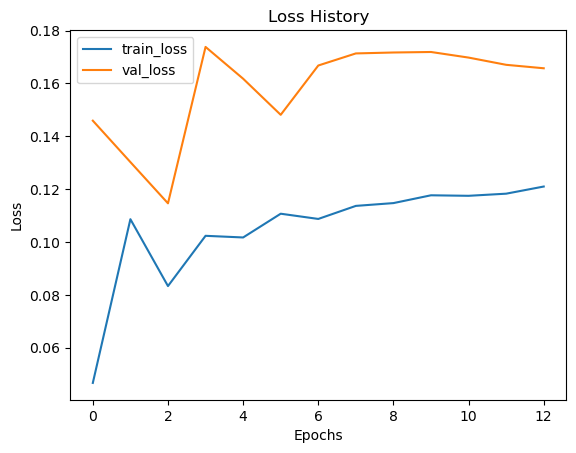

In [42]:
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Loss History')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Loss History.png")
plt.show()

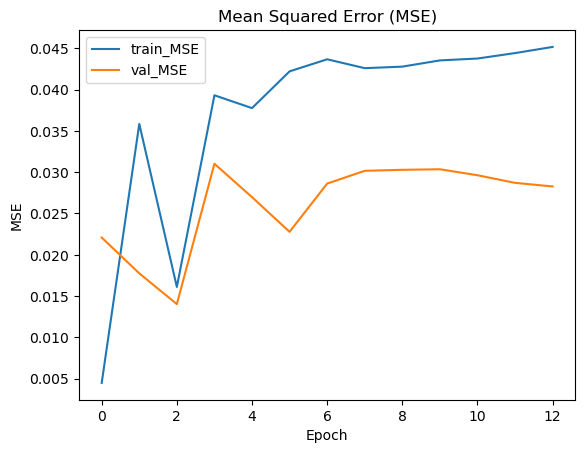

In [43]:
plt.plot(history.history['mean_squared_error'], label='train_MSE')
plt.plot(history.history['val_mean_squared_error'], label='val_MSE')
plt.title('Mean Squared Error (MSE)')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MSE History.png")
plt.show()

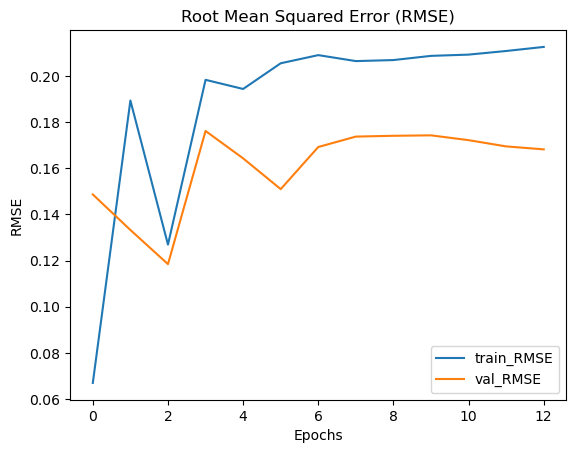

In [44]:
plt.plot(history.history['root_mean_squared_error'], label='train_RMSE')
plt.plot(history.history['val_root_mean_squared_error'], label='val_RMSE')
plt.title('Root Mean Squared Error (RMSE)')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - RMSE History.png")
plt.show()

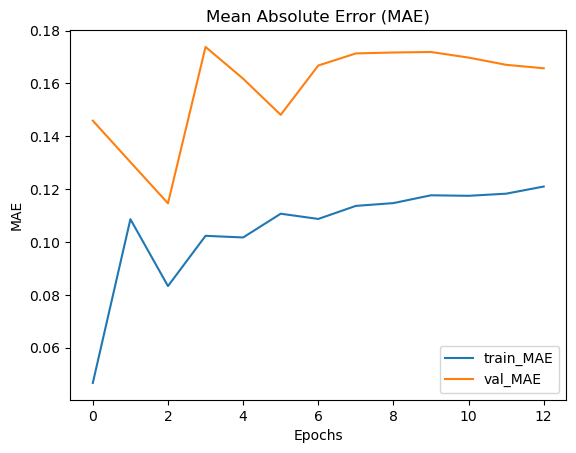

In [45]:
plt.plot(history.history['mean_absolute_error'], label='train_MAE')
plt.plot(history.history['val_mean_absolute_error'], label='val_MAE')
plt.title('Mean Absolute Error (MAE)')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MAE History.png")
plt.show()

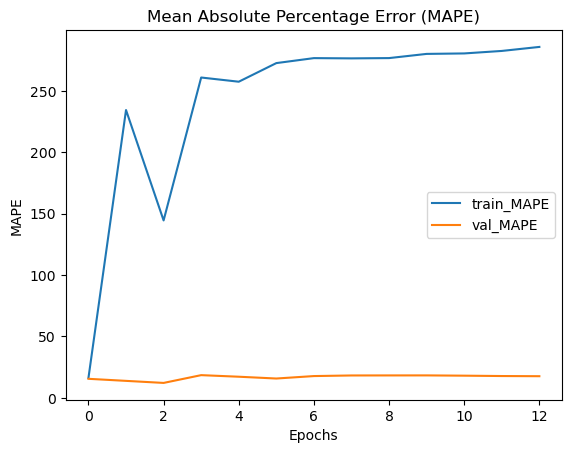

In [46]:
plt.plot(history.history['mean_absolute_percentage_error'], label='train_MAPE')
plt.plot(history.history['val_mean_absolute_percentage_error'], label='val_MAPE')
plt.title('Mean Absolute Percentage Error (MAPE)')
plt.xlabel('Epochs')
plt.ylabel('MAPE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MAPE History.png")
plt.show()

Fazer uma predição

2025-04-14 22:55:33.695799: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Inputs Shape: (7559, 40, 4)
Labels Shape: (7559, 5, 1)
Prediction Shape: (7559, 5, 10)


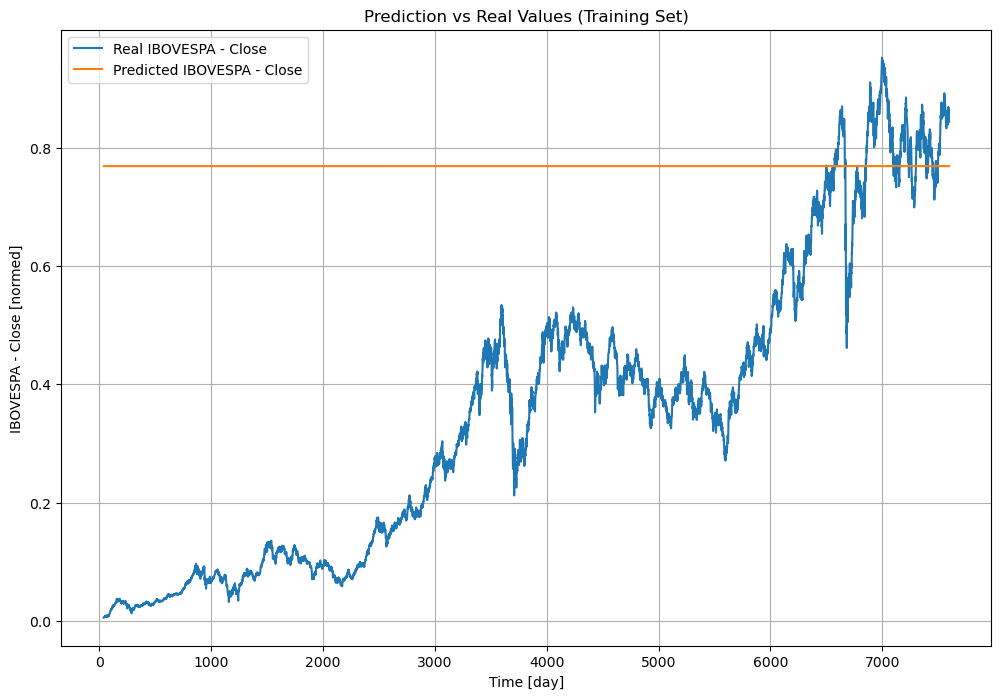

In [47]:
# create inputs and labels
inputs, labels = None, None
for train in iter(multi_window.train):
  if inputs is None:
    inputs = train[0]
    labels = train[1]
  else:
    inputs = np.concatenate((inputs, train[0]), axis=0)
    labels = np.concatenate((labels, train[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# # plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# # plot the labels and predictions
# for i in range(OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)column), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot shifted
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Training Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Training Set).png")
plt.show()

Inputs Shape: (217, 40, 4)
Labels Shape: (217, 5, 1)
Prediction Shape: (217, 5, 10)


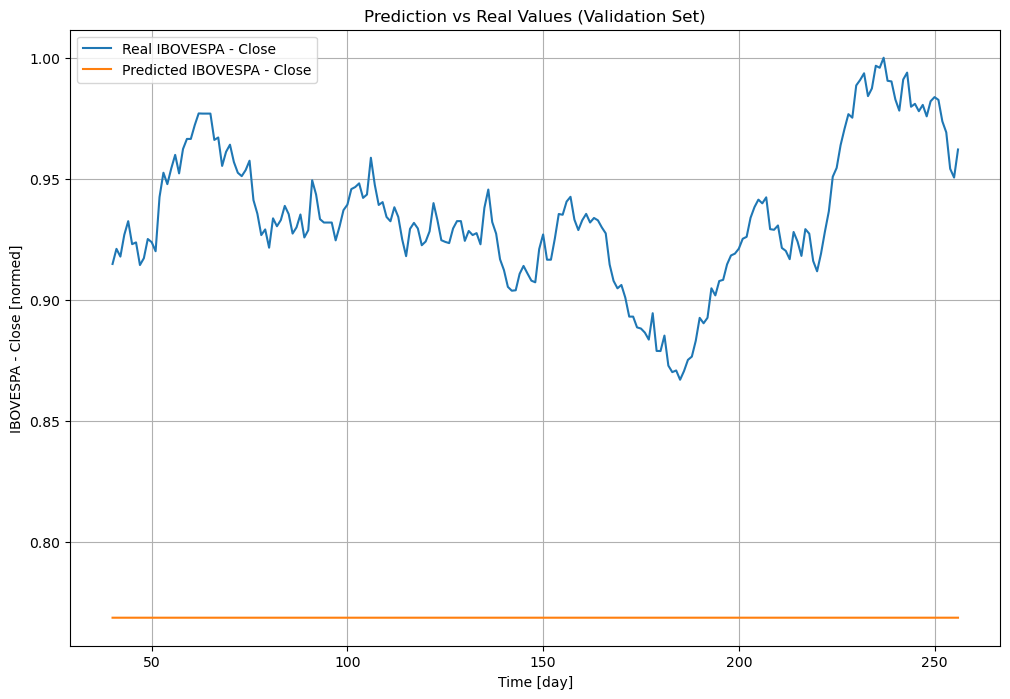

In [48]:
# create inputs and labels
inputs, labels = None, None
for val in iter(multi_window.val):
  if inputs is None:
    inputs = val[0]
    labels = val[1]
  else:
    inputs = np.concatenate((inputs, val[0]), axis=0)
    labels = np.concatenate((labels, val[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# plot the labels and predictions
# for i in range(2):#OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)
#   # add labels, prediction and inputs to the plot shifted
#   if OUTPUT_WINDOW_SIZE == 1:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot, with inputs shifted by the input window size
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Validation Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Validation Set).png")
plt.show()

Inputs Shape: (85, 40, 4)
Labels Shape: (85, 5, 1)
Prediction Shape: (85, 5, 10)


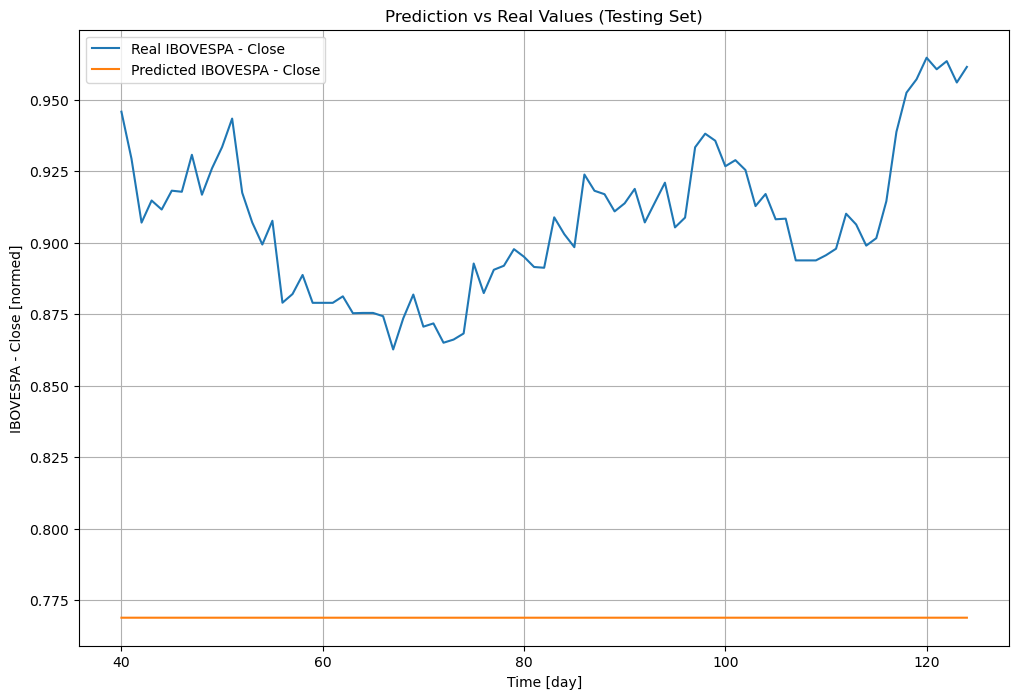

In [49]:
# create inputs and labels
inputs, labels = None, None
for test in iter(multi_window.test):
  if inputs is None:
    inputs = test[0]
    labels = test[1]
  else:
    inputs = np.concatenate((inputs, test[0]), axis=0)
    labels = np.concatenate((labels, test[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# # plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# # plot the labels and predictions
# for i in range(OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)
#   # add labels, prediction and inputs to the plot shifted
#   if OUTPUT_WINDOW_SIZE == 1:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot, with inputs shifted by the input window size
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Testing Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Testing Set).png")
plt.show()

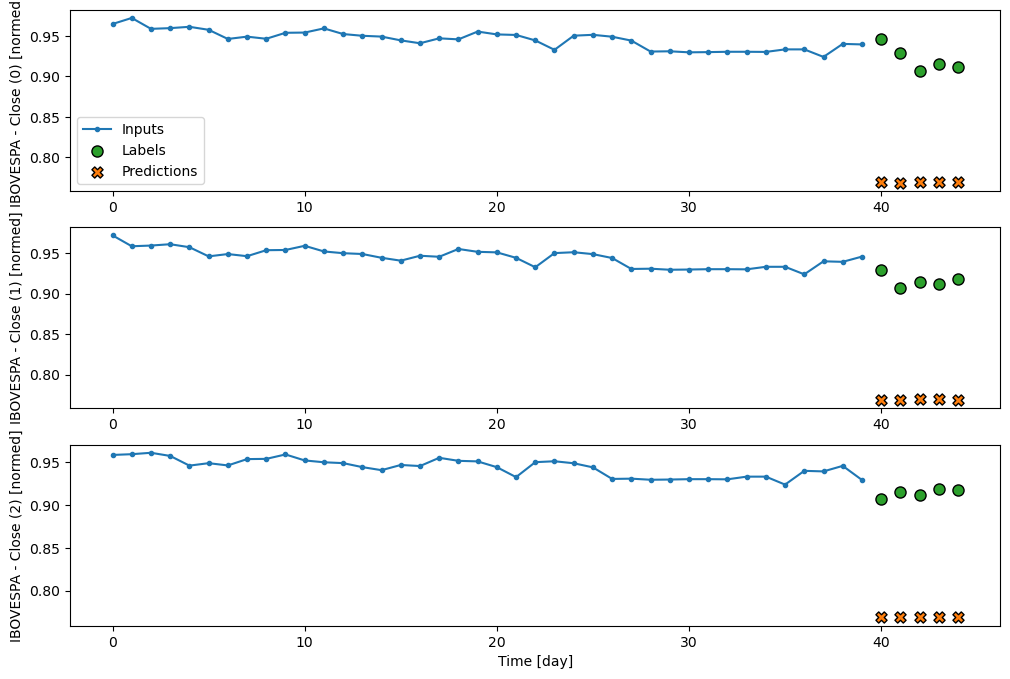

In [50]:
# multi_window.example = next(iter(multi_window.test))
multi_window.plot(model, plot_col=COLUMN_TO_PREDICT)

In [51]:
run_end = time.time()

timeMillisec = (run_end-run_start) * 10**3
# print time in format hh"h":mm"m":ss"s":ms"ms" (like 1h:2m:3s:4ms)
timeStr = str(datetime.timedelta(milliseconds=timeMillisec))
timeStr = timeStr.split(".")[0]
timeStr = timeStr.split(":")
timeStr = f"{int(timeStr[0])}h:{int(timeStr[1])}m:{int(timeStr[2])}s:{int(timeMillisec%1000)}ms"
print(f"Tempo total: {timeStr}")

Tempo total: 0h:1m:51s:399ms


In [52]:
# make a prediction
prediction = model.predict(multi_window.test)
prediction

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 342ms/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 176ms/step


array([[[0.76884073, 0.76884073, 0.76884073, ..., 0.76884073,
         0.76884073, 0.76884073],
        [0.7685514 , 0.7685514 , 0.7685514 , ..., 0.7685514 ,
         0.7685514 , 0.7685514 ],
        [0.76950574, 0.76950574, 0.76950574, ..., 0.76950574,
         0.76950574, 0.76950574],
        [0.76959836, 0.76959836, 0.76959836, ..., 0.76959836,
         0.76959836, 0.76959836],
        [0.76919276, 0.76919276, 0.76919276, ..., 0.76919276,
         0.76919264, 0.76919264]],

       [[0.7688409 , 0.7688409 , 0.7688409 , ..., 0.7688409 ,
         0.7688409 , 0.7688409 ],
        [0.7685518 , 0.7685518 , 0.7685518 , ..., 0.7685518 ,
         0.7685518 , 0.7685518 ],
        [0.769506  , 0.769506  , 0.769506  , ..., 0.769506  ,
         0.769506  , 0.769506  ],
        [0.7695988 , 0.7695988 , 0.7695988 , ..., 0.7695988 ,
         0.7695988 , 0.7695988 ],
        [0.76919305, 0.76919305, 0.76919305, ..., 0.76919305,
         0.769193  , 0.769193  ]],

       [[0.7688408 , 0.7688408 , 0.7

In [53]:
prediction.shape

(85, 5, 10)

Salvar e carregar modelo

In [54]:
# model = ...  # Get model (Sequential, Functional Model, or Model subclass)
# model.save('path/to/location.keras')  # The file needs to end with the .keras extension
# model = keras.models.load_model('path/to/location.keras')